In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scikit-learn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from scikit-learn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from scikit-learn.neighbors import KNeighborsClassifier
from scikit-learn.experimental import enable_hist_gradient_boosting
from scikit-learn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from scikit-learn.tree import DecisionTreeClassifier
from scikit-learn.svm import SVC
from scikit-learn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from scikit-learn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, scikit-learn
from imblearn.over_sampling import SMOTE
from collections import Counter
from scikit-learn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv('cirrhosis.csv')
df.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [3]:
df.drop(['ID'],axis=1,inplace=True)

In [4]:
df.shape

(418, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [6]:
df.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

## Checking for percentage of null data in each column

In [7]:
df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

## Checking for duplicate data

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

## Exploratory Data Analysis

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


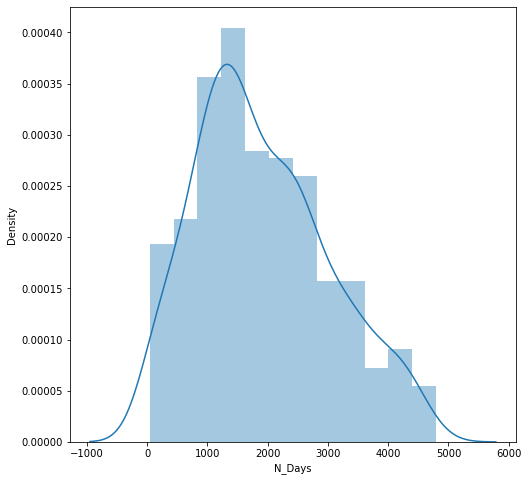

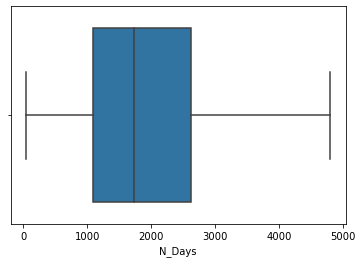

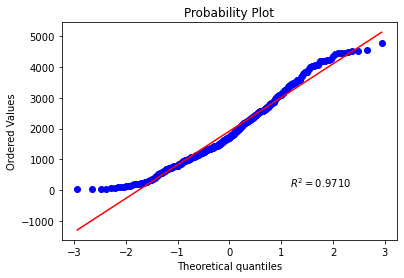

----------------------------
Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


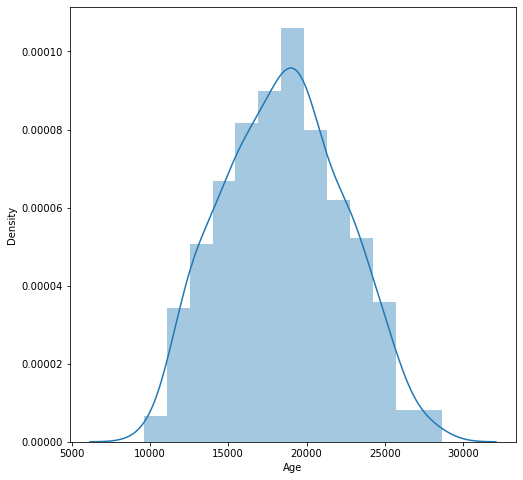

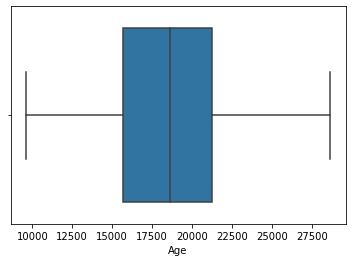

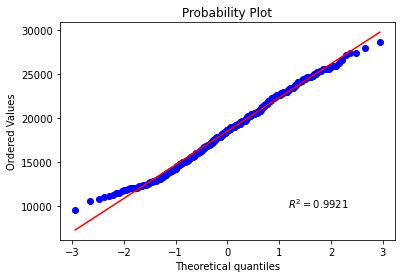

----------------------------
Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


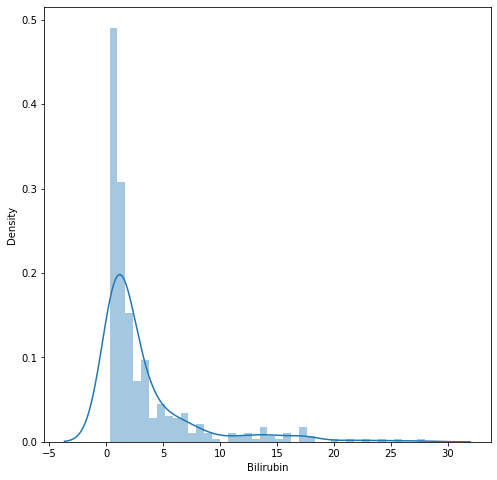

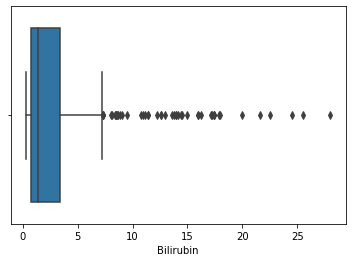

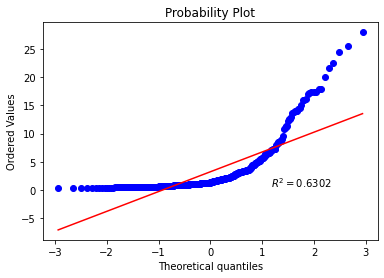

----------------------------
Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


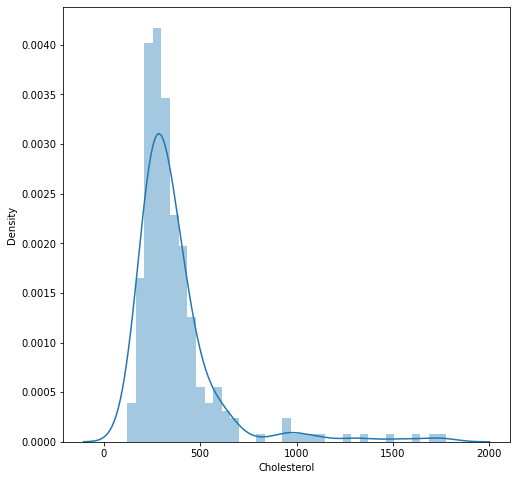

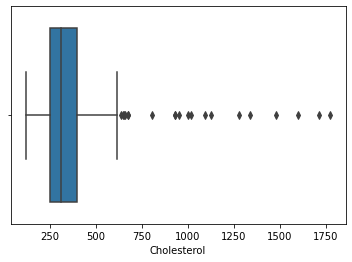

posx and posy should be finite values
posx and posy should be finite values


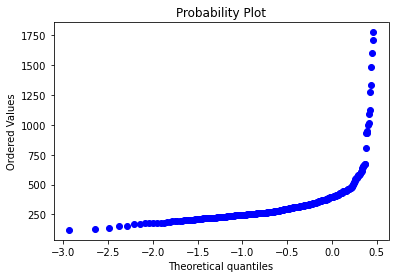

----------------------------
Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


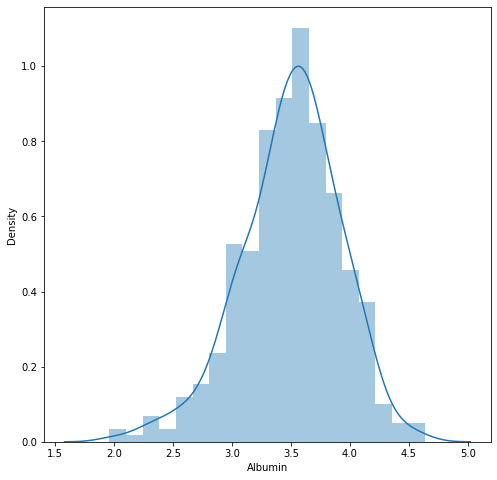

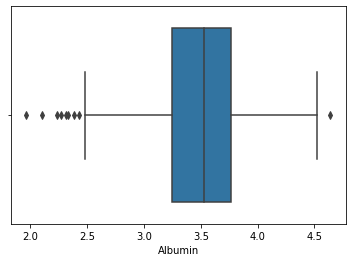

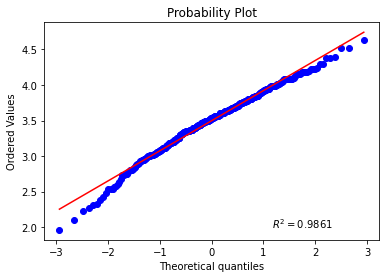

----------------------------
Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


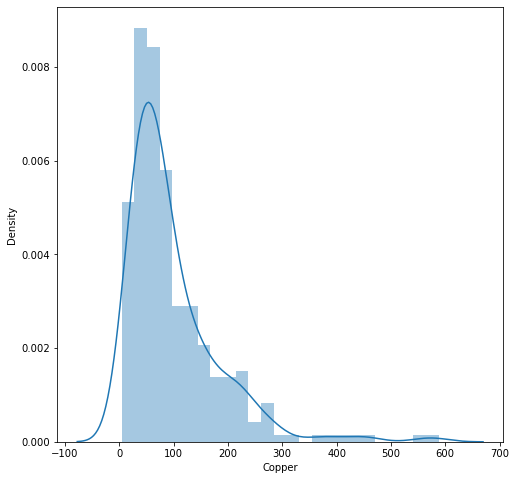

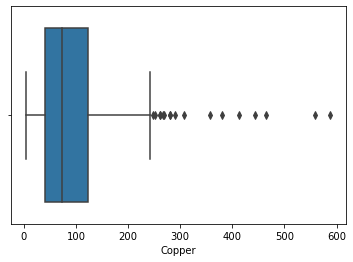

posx and posy should be finite values
posx and posy should be finite values


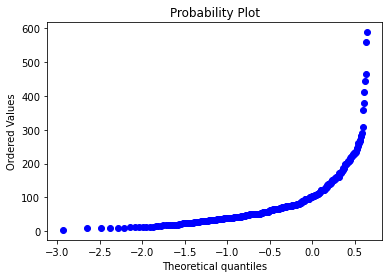

----------------------------
Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


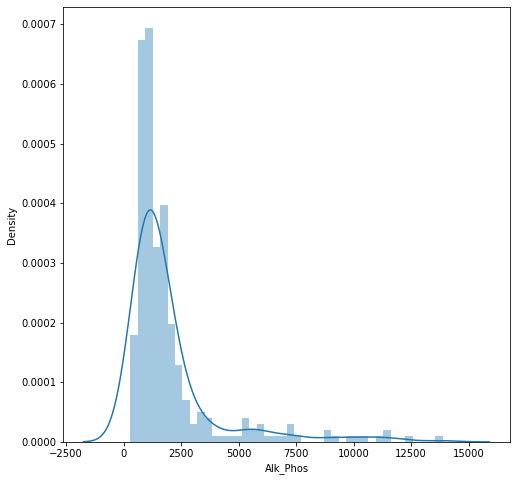

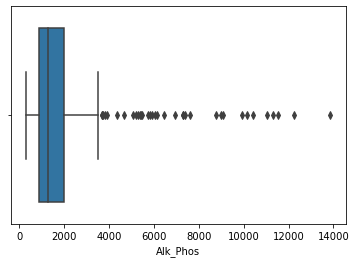

posx and posy should be finite values
posx and posy should be finite values


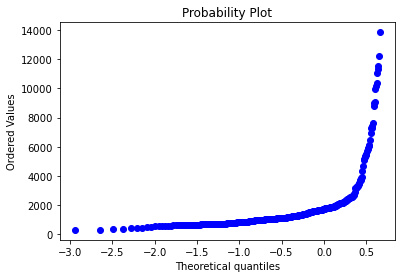

----------------------------
Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


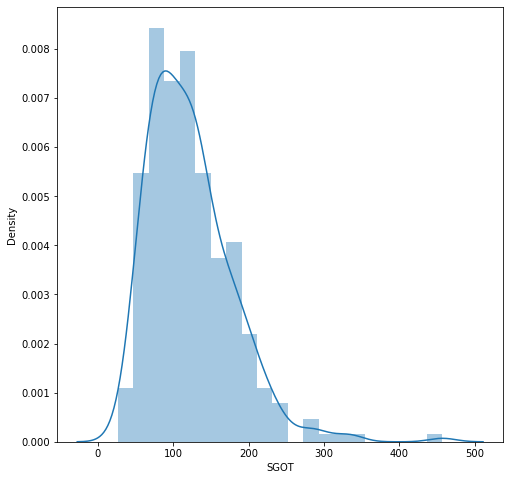

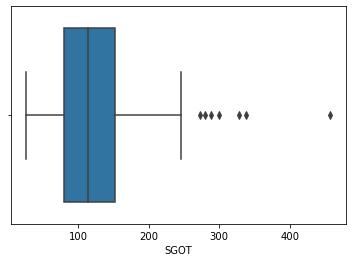

posx and posy should be finite values
posx and posy should be finite values


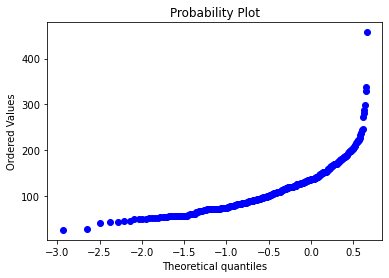

----------------------------
Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


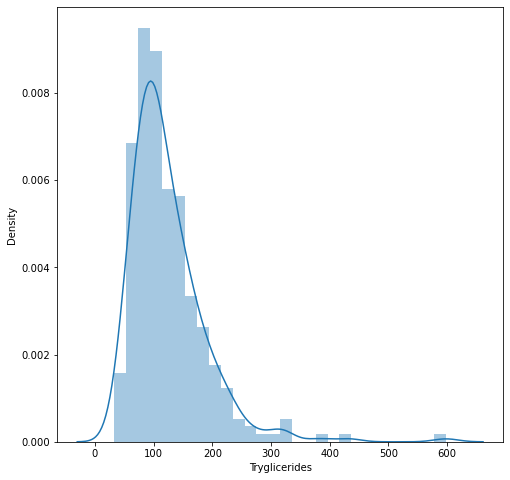

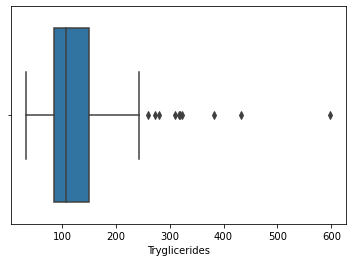

posx and posy should be finite values
posx and posy should be finite values


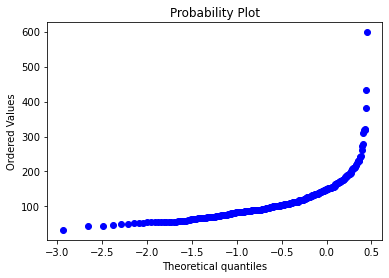

----------------------------
Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


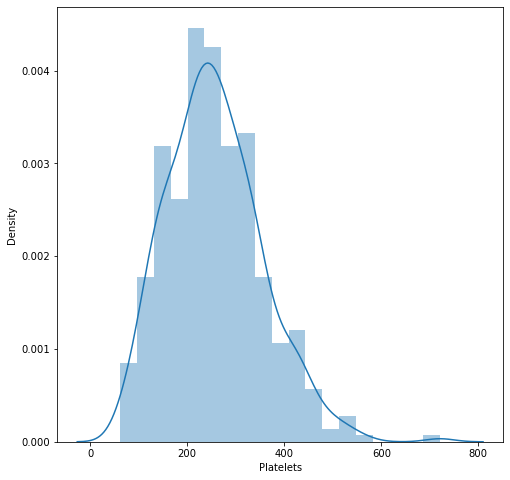

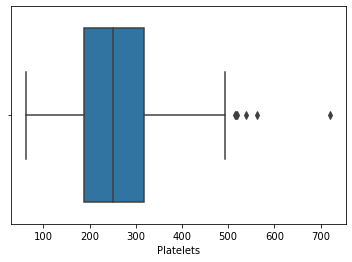

posx and posy should be finite values
posx and posy should be finite values


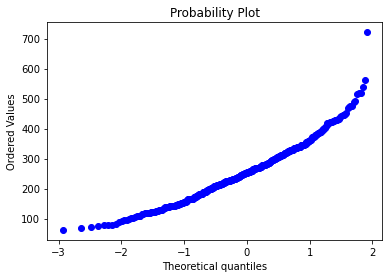

----------------------------
Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


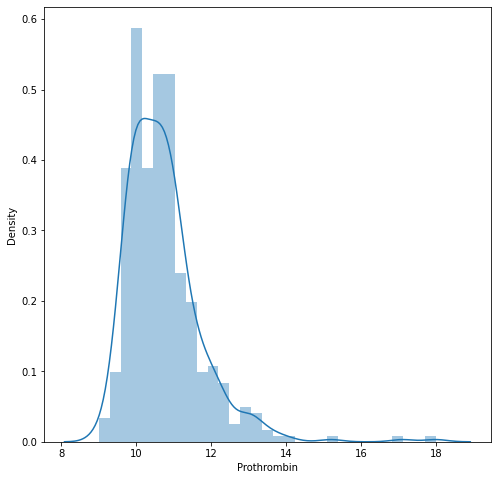

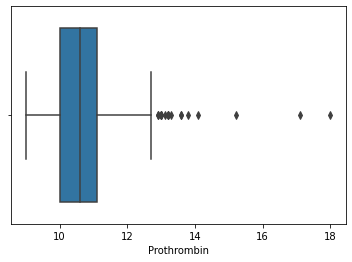

posx and posy should be finite values
posx and posy should be finite values


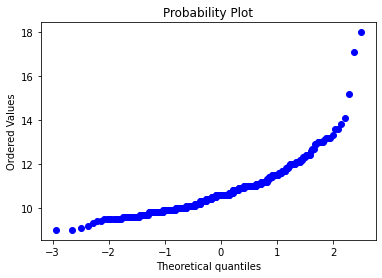

----------------------------


In [9]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()
            print('----------------------------')

The distributions of the features Bilirubin, Cholesterol, Copper, Alkaline Phosphatase, SGOT, Tryglicerides and Prothrombin are highly skewed and their kurtosis values are more significant as well. As a result, they are more prone to having outliers which is clearly indicated by their respective box plots.

In [10]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

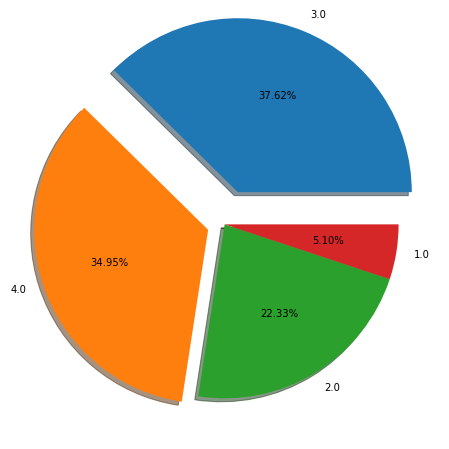

In [11]:
pie_chart(df,'Stage')

Majority of the patients had third histologic stage of Cirrhosis disease accounting for almost 38% of the total share, closely followed by those having 4th stage which comprised a share of about 35%. The proportion of the number of patients having 2nd stage of Cirrhosis disease stood at a little more than one-fifth of the total share. However, a tiny fraction of the total share was occupied by patients having the first histologic stage of the disease.

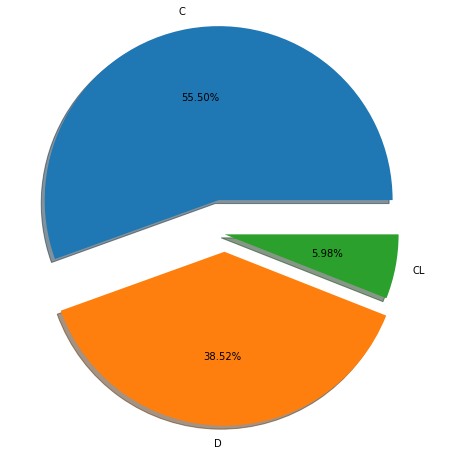

In [12]:
pie_chart(df,'Status')

A significant proportion of the entire population of patients had "Censored" status, contributing to a little more than half of the total share. They are followed by the patients who died during the course of the clinical trials, possessing a share of just less than 40%. Patients, having the status of "Censored due to Liver tx", had a minimal share of just over 5%.

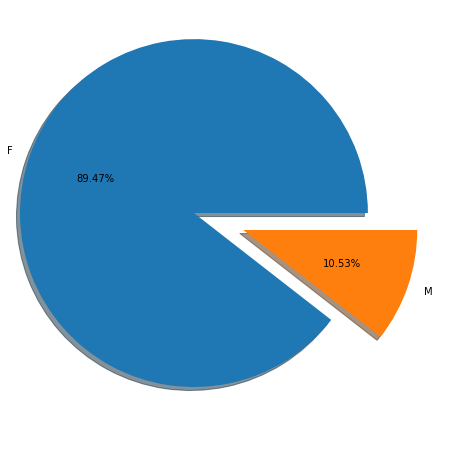

In [13]:
pie_chart(df,'Sex')

A vast majority of the entire population of patients are females, contributing to a substantial share of almost 90%. Males comprised a little more than one-tenth of the total share.

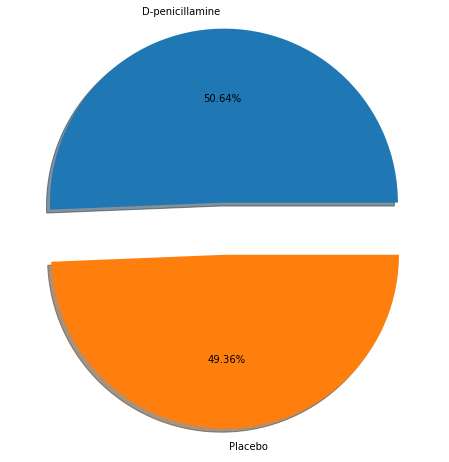

In [14]:
pie_chart(df,'Drug')

Both the drugs, D-penicillamine and Placebo, recorded an equal amount of usage during the clinical trials.

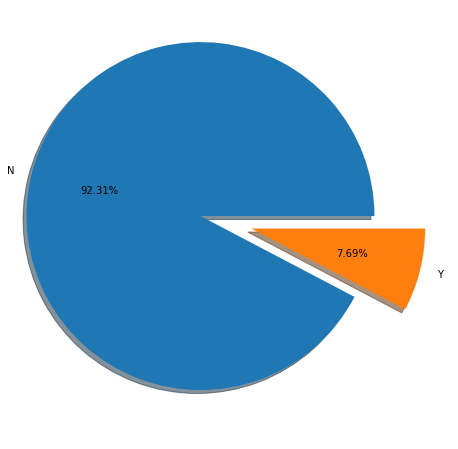

In [15]:
pie_chart(df,'Ascites')

## Only a tiny fraction of the population of patients had Ascites disease.

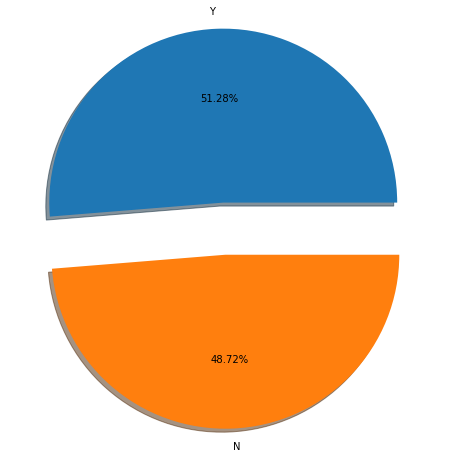

In [16]:
pie_chart(df,'Hepatomegaly')

## The percentage share of patients suffering from the Hepatomegaly disease and those who did not have this disease is almost similar.

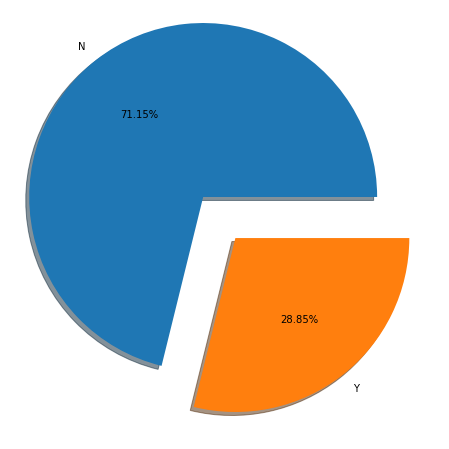

In [17]:
pie_chart(df,'Spiders')

Most of the patients did not have spiders contributing to a little more than 70% of the total share.

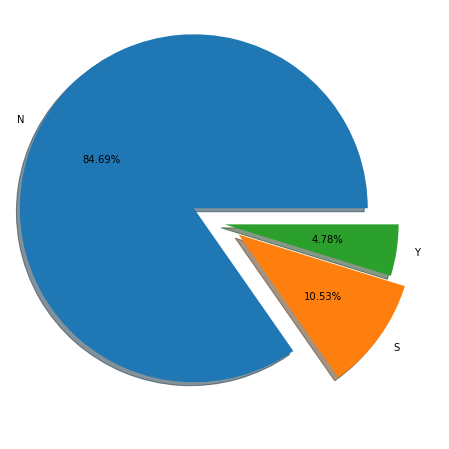

In [18]:
pie_chart(df,'Edema')

A lion's share of the population of patients neither had edema nor diuretic therapy for edema, contributing to almost 85% of the total share. The patients in case of which edema was present without diuretics or edema was resolved by diuretics had a share of 
just over one-tenth whereas those who had edema despite having diuretic therapy had a minimal share of a little less than 5%.

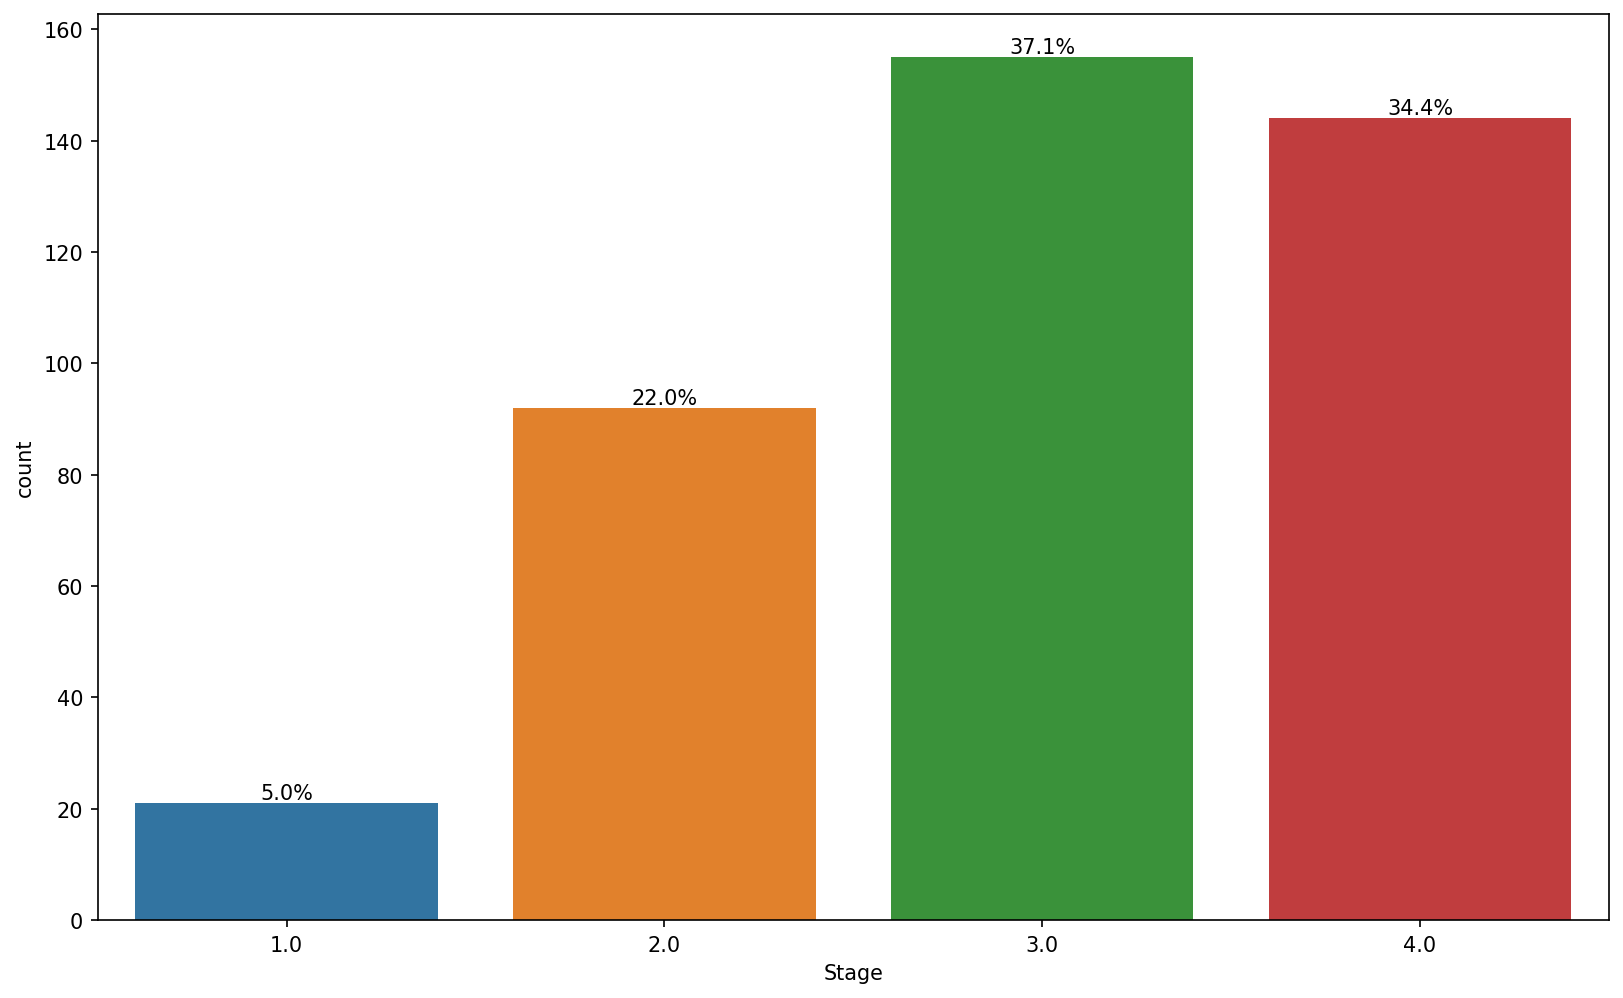

In [19]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')

It is clearly evident that the classes of the target feature "Stage" are highly imbalanced with 3rd stage being the majority class and 1st stage being the minority class. 

## Bivariate Analysis

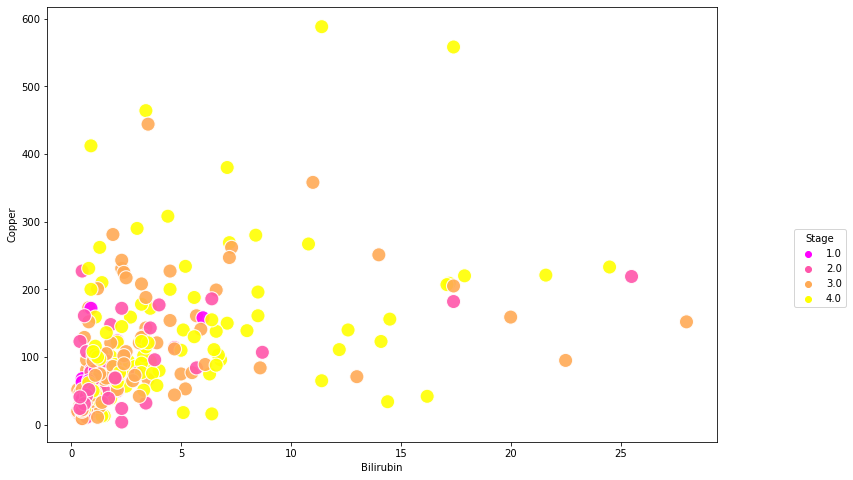

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

There is a mild positive correlation between Bilirubin and Copper.

In [21]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [22]:
males.describe()

N_Days           Age  Bilirubin  Cholesterol    Albumin  \
count    44.000000     44.000000  44.000000    35.000000  44.000000   
mean   1894.022727  20348.340909   2.865909   362.457143   3.535000   
std    1213.034356   4009.641699   2.319477   178.993319   0.456598   
min     140.000000  12227.000000   0.600000   151.000000   2.270000   
25%    1060.750000  17886.000000   1.300000   245.000000   3.327500   
50%    1507.000000  19724.000000   2.050000   317.000000   3.645000   
75%    2715.750000  23588.750000   3.500000   426.500000   3.870000   
max    4459.000000  28650.000000   9.500000  1000.000000   4.300000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count   36.000000     36.000000   36.000000      35.000000   43.000000   
mean   154.277778   2172.950000  121.990556     133.428571  231.139535   
std    100.665389   2418.446239   47.013095      52.168441   85.225634   
min     13.000000    516.000000   46.500000      49.000000   70.000000   
25%     80.750000    852.000000   82.770000      91.000000  165.500000   
50%    134.500000   1116.000000  121.675000     126.000000  217.000000   
75%    211.750000   2313.000000  153.450000     163.000000  298.500000   
max    444.000000  10396.800000  221.880000     242.000000  394.000000   

       Prothrombin      Stage  
count    44.000000  44.000000  
mean     10.940909   3.068182  
std       0.931445   0.925045  
min       9.700000   1.000000  
25%      10.275000   2.750000  
50%      10.900000   3.000000  
75%      11.225000   4.000000  
max      14.100000   4.000000

In [23]:
females.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   374.000000    374.000000  374.000000   249.000000  374.000000   
mean   1920.577540  18319.823529    3.262567   370.502008    3.493021   
std    1092.953174   3740.397415    4.591388   238.726563    0.421527   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1095.500000  15478.750000    0.700000   252.000000    3.240000   
50%    1773.000000  18333.000000    1.300000   309.000000    3.520000   
75%    2606.250000  20819.000000    3.400000   395.000000    3.767500   
max    4795.000000  28018.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  274.000000    276.000000  276.000000     247.000000  364.000000   
mean    90.208029   1957.834783  122.630145     123.465587  260.082418   
std     80.738377   2105.049047   57.916646      66.780963   99.418385   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     40.000000    877.500000   80.600000      84.000000  190.000000   
50%     67.000000   1270.500000  113.335000     106.000000  252.500000   
75%    111.750000   1963.750000  151.900000     146.000000  319.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   372.000000  368.000000  
mean     10.706989    3.019022  
std       1.030534    0.877926  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

Females tend to have more quantities of Bilirubin, Cholesterol, SGOT and Platelets as compared to males whereas males are more likely to have higher quantities of Albumin, Copper, Alkaline Phosphatase and Tryglicerides in comparison to their female counterparts.

In [24]:
round(males.Status.value_counts() / len(males) * 100,2)

D     54.55
C     38.64
CL     6.82
Name: Status, dtype: float64

In [25]:
round(females.Status.value_counts() / len(females) * 100,2)

C     57.49
D     36.63
CL     5.88
Name: Status, dtype: float64

Male patients are more prone to death in comparison to females while female patients are more likely to have "Censored" status.

In [26]:
round(males.Stage.value_counts() / len(males) * 100,2)

4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: Stage, dtype: float64

In [27]:
round(females.Stage.value_counts() / len(females) * 100,2)

3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: Stage, dtype: float64

Male patients are highly vulnerable to the critical stages (i.e. 3rd and 4th) of the Cirrhosis disease as compared to female patients.

In [28]:
round(males.Hepatomegaly.value_counts() / len(males) * 100,2)

Y    47.73
N    34.09
Name: Hepatomegaly, dtype: float64

In [29]:
round(females.Hepatomegaly.value_counts() / len(females) * 100,2)

Y    37.17
N    36.63
Name: Hepatomegaly, dtype: float64

Male patients are more likely to suffer from Hepatomegaly disease in comparison to female patients.

## Multivariate Analysis

<AxesSubplot:>

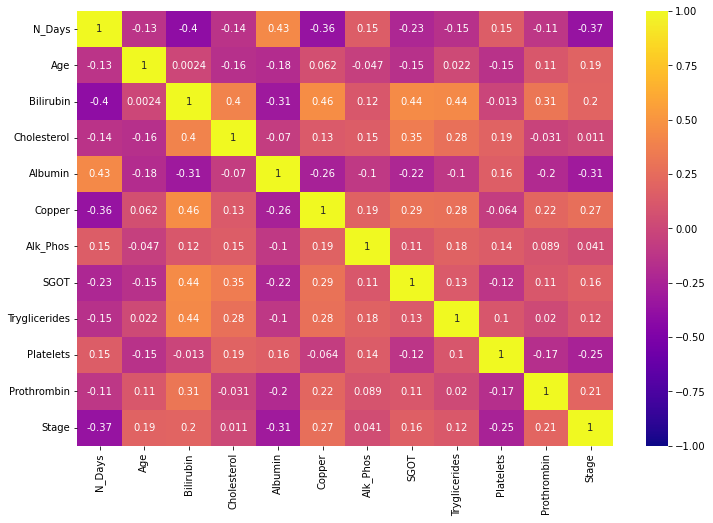

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

There are no major correlations between any pair of features in the dataset.

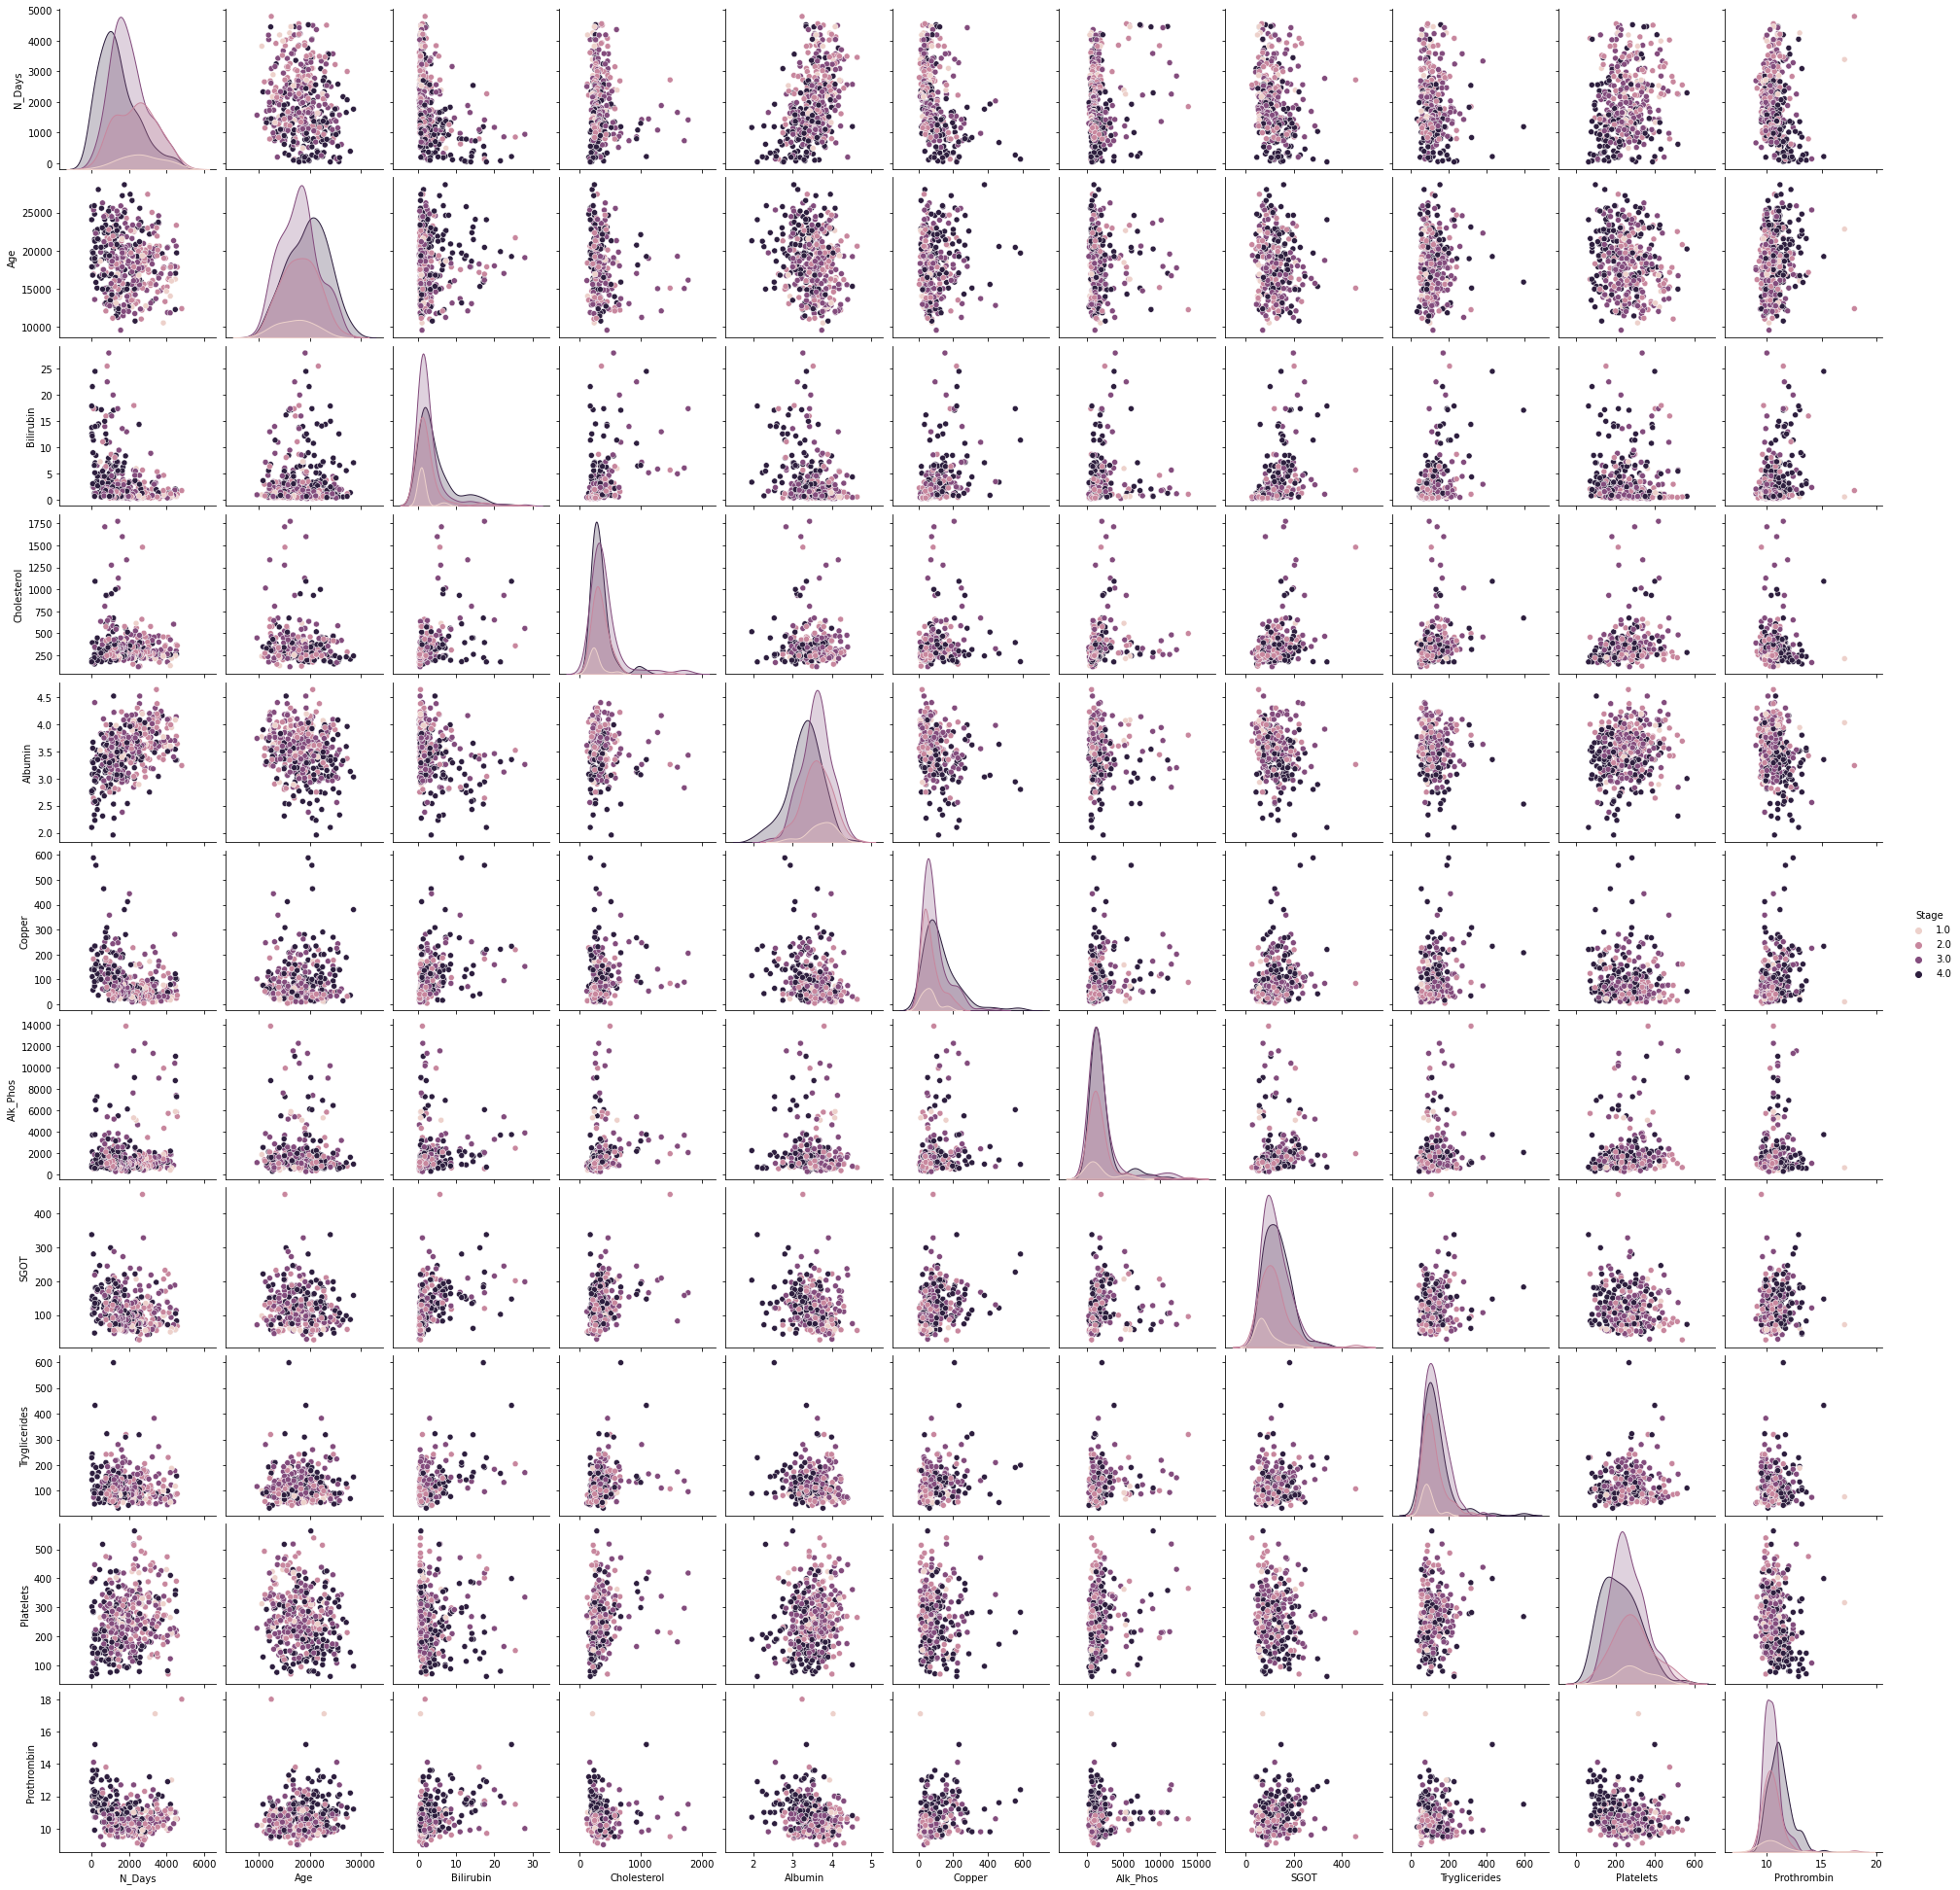

In [31]:
sns.pairplot(df,hue='Stage')

Most of the numerical features such as Bilirubin, Prothrombin, Triglycerides, etc. follow the Gaussian distribution so their missing values can be imputed with their corresponding median values.

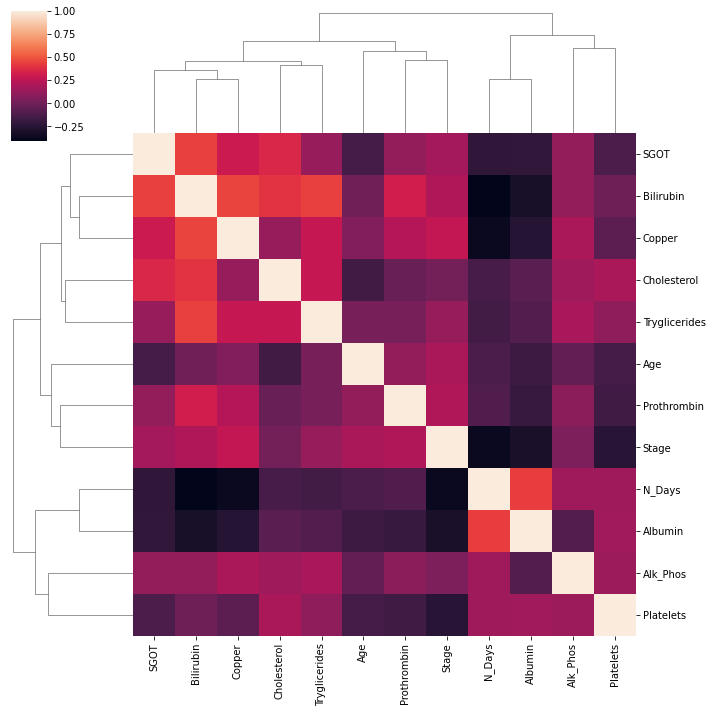

In [32]:
sns.clustermap(df.corr())

## Feature Engineering

In [33]:
df.Age = (df.Age.values/365.0).round()
df.head()

N_Days Status             Drug   Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  59.0   F       Y            Y       Y   
1    4500      C  D-penicillamine  56.0   F       N            Y       Y   
2    1012      D  D-penicillamine  70.0   M       N            N       N   
3    1925      D  D-penicillamine  55.0   F       N            Y       Y   
4    1504     CL          Placebo  38.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

### Imputation of missing values

In [34]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

### Treatment of outliers

In [35]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

### Encoding of categorical features

In [36]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)

## Separating the independent predictor features and the target label

### We will not be using 'Status' and 'N_days' as our features since they will cause data leakage.

In [37]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage

## Balancing the imbalanced target column "Stage" using Synthetic Minority Over-Sampling Technique(SMOTE)

In [38]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

<AxesSubplot:xlabel='Stage', ylabel='count'>

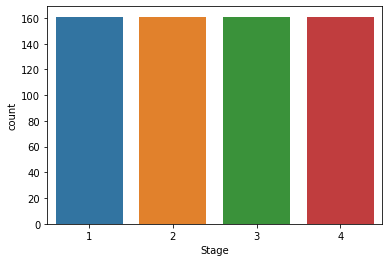

In [39]:
sns.countplot(y)

## Feature Scaling

In [40]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

Drug       Age       Sex   Ascites  Hepatomegaly   Spiders     Edema  \
0 -0.693965  0.913013 -0.360640  4.853434      0.929483  2.274894  3.132532   
1 -0.693965  0.602011 -0.360640 -0.217828      0.929483  2.274894  0.180820   
2 -0.693965  2.053354  3.164616 -0.217828     -1.137389 -0.456717 -2.770891   
3 -0.693965  0.498343 -0.360640 -0.217828      0.929483  2.274894 -2.770891   
4  1.593766 -1.264002 -0.360640 -0.217828      0.929483  2.274894  0.180820   

   Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0   2.351415    -0.684198 -2.452451  1.902577   0.54816  0.687364   
1  -0.520358    -0.106155  1.542838 -0.543083   2.14670  0.054537   
2  -0.381401    -1.882581 -0.169429  2.358141  -1.32277 -0.396705   
3  -0.196126    -0.923875 -2.608112 -0.303313   2.14670 -1.315509   
4   0.544977    -0.430423 -0.039712  1.590875  -1.08151  0.044953   

   Tryglicerides  Platelets  Prothrombin  
0       2.103240  -0.827655     1.985444  
1      -0.678896  -0.476121    -0.048778  
2      -1.771877  -1.269908     1.731166  
3      -0.546413  -0.907034    -0.430195  
4      -1.208826  -1.440006     0.332638

## Model Training & Evaluation

## Dividing the dataset into training and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.54      0.66      0.59        50
           2       0.37      0.27      0.31        52
           3       0.33      0.41      0.36        39
           4       0.76      0.66      0.71        53

    accuracy                           0.51       194
   macro avg       0.50      0.50      0.49       194
weighted avg       0.51      0.51      0.50       194



<scikit-learn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x23eec04cdc0>

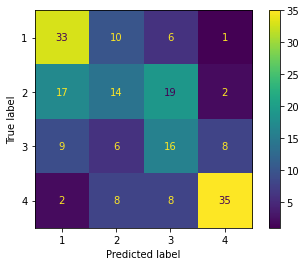

In [44]:
plot_confusion_matrix(logmodel,X_test,y_test)

In [45]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [46]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.66      0.88      0.75        50
           2       0.63      0.52      0.57        52
           3       0.42      0.46      0.44        39
           4       0.71      0.55      0.62        53

    accuracy                           0.61       194
   macro avg       0.60      0.60      0.59       194
weighted avg       0.61      0.61      0.60       194



<scikit-learn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x23eec2c71f0>

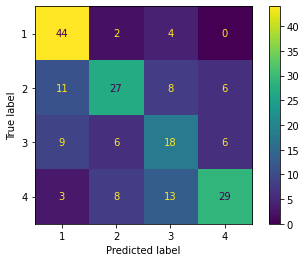

In [47]:
plot_confusion_matrix(svm,X_test,y_test)

In [48]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

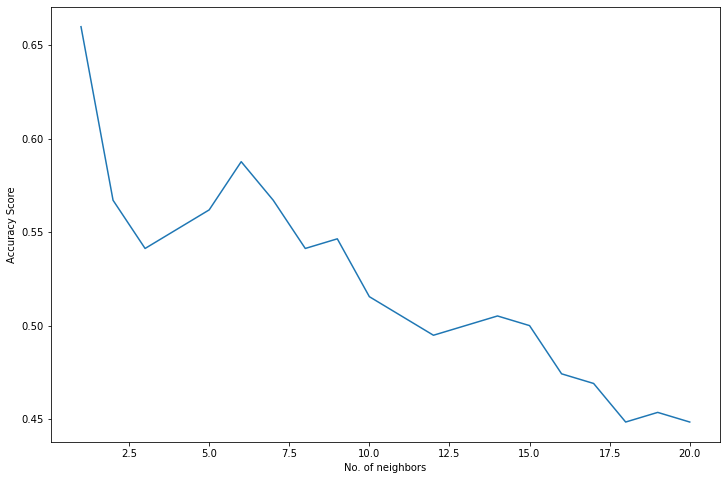

In [49]:
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(1,21),scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

In [50]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [51]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[43  4  3  0]
 [22 12 16  2]
 [13  9 15  2]
 [ 5  9 18 21]]
              precision    recall  f1-score   support

           1       0.52      0.86      0.65        50
           2       0.35      0.23      0.28        52
           3       0.29      0.38      0.33        39
           4       0.84      0.40      0.54        53

    accuracy                           0.47       194
   macro avg       0.50      0.47      0.45       194
weighted avg       0.52      0.47      0.45       194



In [52]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [53]:
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))

[[32  6  8  4]
 [20 10 14  8]
 [ 9 10  8 12]
 [ 0 13  6 34]]
              precision    recall  f1-score   support

           1       0.52      0.64      0.58        50
           2       0.26      0.19      0.22        52
           3       0.22      0.21      0.21        39
           4       0.59      0.64      0.61        53

    accuracy                           0.43       194
   macro avg       0.40      0.42      0.41       194
weighted avg       0.41      0.43      0.42       194



In [54]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [55]:
pac_pred = pac.predict(X_test)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))

[[31  7 10  2]
 [21 17 14  0]
 [14  4 18  3]
 [ 7  8 33  5]]
              precision    recall  f1-score   support

           1       0.42      0.62      0.50        50
           2       0.47      0.33      0.39        52
           3       0.24      0.46      0.32        39
           4       0.50      0.09      0.16        53

    accuracy                           0.37       194
   macro avg       0.41      0.38      0.34       194
weighted avg       0.42      0.37      0.34       194



In [56]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

In [57]:
ridge_pred = ridge.predict(X_test)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))

[[37  7  4  2]
 [23 10 17  2]
 [11  4 16  8]
 [ 6  6  9 32]]
              precision    recall  f1-score   support

           1       0.48      0.74      0.58        50
           2       0.37      0.19      0.25        52
           3       0.35      0.41      0.38        39
           4       0.73      0.60      0.66        53

    accuracy                           0.49       194
   macro avg       0.48      0.49      0.47       194
weighted avg       0.49      0.49      0.47       194



In [58]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[42  5  3  0]
 [ 9 23 12  8]
 [ 4  5 19 11]
 [ 5 13  8 27]]
              precision    recall  f1-score   support

           1       0.70      0.84      0.76        50
           2       0.50      0.44      0.47        52
           3       0.45      0.49      0.47        39
           4       0.59      0.51      0.55        53

    accuracy                           0.57       194
   macro avg       0.56      0.57      0.56       194
weighted avg       0.57      0.57      0.57       194



In [60]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

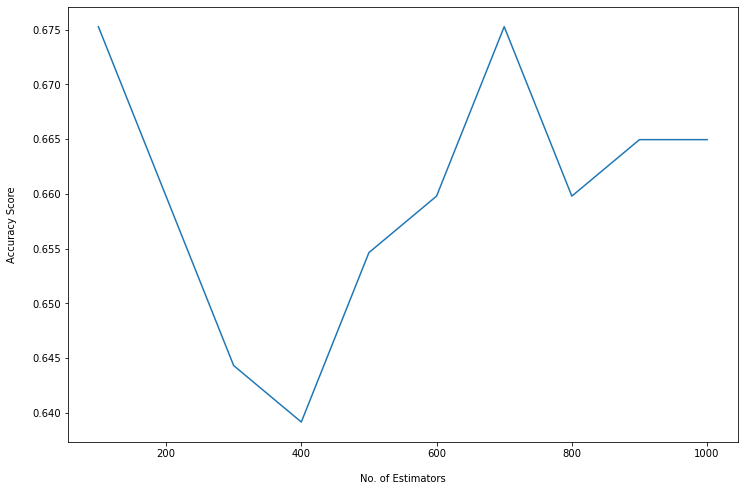

In [61]:
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(100,1001,100),scores)
plt.xlabel('No. of Estimators',labelpad=15)
plt.ylabel('Accuracy Score',labelpad=15)

In [62]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[48  2  0  0]
 [ 8 29 11  4]
 [ 7  5 20  7]
 [ 0  7 15 31]]
              precision    recall  f1-score   support

           1       0.76      0.96      0.85        50
           2       0.67      0.56      0.61        52
           3       0.43      0.51      0.47        39
           4       0.74      0.58      0.65        53

    accuracy                           0.66       194
   macro avg       0.65      0.65      0.65       194
weighted avg       0.67      0.66      0.66       194



<AxesSubplot:xlabel='Importance', ylabel='Feature'>

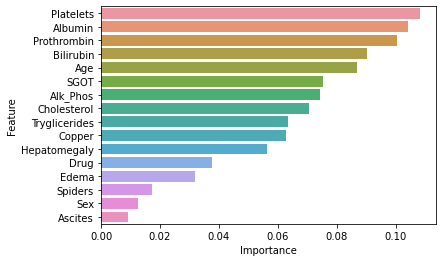

In [64]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')

In [65]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [66]:
et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))

[[49  1  0  0]
 [ 8 29 11  4]
 [ 8  5 20  6]
 [ 2  4 18 29]]
              precision    recall  f1-score   support

           1       0.73      0.98      0.84        50
           2       0.74      0.56      0.64        52
           3       0.41      0.51      0.45        39
           4       0.74      0.55      0.63        53

    accuracy                           0.65       194
   macro avg       0.66      0.65      0.64       194
weighted avg       0.67      0.65      0.65       194



In [67]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [68]:
abc_pred = abc.predict(X_test)
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

[[34 15  0  1]
 [16 18 12  6]
 [ 4 11 11 13]
 [ 2  8 12 31]]
              precision    recall  f1-score   support

           1       0.61      0.68      0.64        50
           2       0.35      0.35      0.35        52
           3       0.31      0.28      0.30        39
           4       0.61      0.58      0.60        53

    accuracy                           0.48       194
   macro avg       0.47      0.47      0.47       194
weighted avg       0.48      0.48      0.48       194



In [69]:
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.075969
0:	learn: 1.3600910	total: 150ms	remaining: 2m 30s
1:	learn: 1.3402235	total: 158ms	remaining: 1m 19s
2:	learn: 1.3239800	total: 166ms	remaining: 55.3s
3:	learn: 1.3063689	total: 174ms	remaining: 43.4s
4:	learn: 1.2830866	total: 182ms	remaining: 36.3s
5:	learn: 1.2630052	total: 191ms	remaining: 31.7s
6:	learn: 1.2442719	total: 199ms	remaining: 28.2s
7:	learn: 1.2227932	total: 207ms	remaining: 25.6s
8:	learn: 1.2026085	total: 215ms	remaining: 23.6s
9:	learn: 1.1842471	total: 223ms	remaining: 22s
10:	learn: 1.1660006	total: 231ms	remaining: 20.8s
11:	learn: 1.1478581	total: 239ms	remaining: 19.7s
12:	learn: 1.1276810	total: 247ms	remaining: 18.8s
13:	learn: 1.1161618	total: 254ms	remaining: 17.9s
14:	learn: 1.1006175	total: 263ms	remaining: 17.2s
15:	learn: 1.0896436	total: 270ms	remaining: 16.6s
16:	learn: 1.0757313	total: 279ms	remaining: 16.1s
17:	learn: 1.0657856	total: 286ms	remaining: 15.6s
18:	learn: 1.0540548	total: 294ms	remaining: 15.2s
19:	learn: 

161:	learn: 0.4047423	total: 1.45s	remaining: 7.49s
162:	learn: 0.4027999	total: 1.46s	remaining: 7.48s
163:	learn: 0.4003148	total: 1.46s	remaining: 7.46s
164:	learn: 0.3982491	total: 1.47s	remaining: 7.45s
165:	learn: 0.3970494	total: 1.48s	remaining: 7.44s
166:	learn: 0.3952608	total: 1.49s	remaining: 7.43s
167:	learn: 0.3935185	total: 1.5s	remaining: 7.42s
168:	learn: 0.3908337	total: 1.5s	remaining: 7.4s
169:	learn: 0.3885135	total: 1.51s	remaining: 7.39s
170:	learn: 0.3877975	total: 1.52s	remaining: 7.38s
171:	learn: 0.3862976	total: 1.53s	remaining: 7.36s
172:	learn: 0.3845100	total: 1.54s	remaining: 7.35s
173:	learn: 0.3826367	total: 1.54s	remaining: 7.33s
174:	learn: 0.3804822	total: 1.55s	remaining: 7.32s
175:	learn: 0.3782001	total: 1.56s	remaining: 7.31s
176:	learn: 0.3754049	total: 1.57s	remaining: 7.29s
177:	learn: 0.3734506	total: 1.58s	remaining: 7.28s
178:	learn: 0.3713315	total: 1.58s	remaining: 7.27s
179:	learn: 0.3698070	total: 1.59s	remaining: 7.25s
180:	learn: 0.3

320:	learn: 0.2092784	total: 2.75s	remaining: 5.81s
321:	learn: 0.2086491	total: 2.75s	remaining: 5.8s
322:	learn: 0.2078960	total: 2.76s	remaining: 5.79s
323:	learn: 0.2073367	total: 2.77s	remaining: 5.78s
324:	learn: 0.2067505	total: 2.78s	remaining: 5.77s
325:	learn: 0.2059021	total: 2.79s	remaining: 5.76s
326:	learn: 0.2051496	total: 2.79s	remaining: 5.75s
327:	learn: 0.2041879	total: 2.8s	remaining: 5.74s
328:	learn: 0.2031024	total: 2.81s	remaining: 5.74s
329:	learn: 0.2024773	total: 2.82s	remaining: 5.72s
330:	learn: 0.2019398	total: 2.83s	remaining: 5.71s
331:	learn: 0.2012537	total: 2.83s	remaining: 5.71s
332:	learn: 0.2004856	total: 2.84s	remaining: 5.7s
333:	learn: 0.1998402	total: 2.85s	remaining: 5.68s
334:	learn: 0.1994277	total: 2.86s	remaining: 5.68s
335:	learn: 0.1985316	total: 2.87s	remaining: 5.67s
336:	learn: 0.1974512	total: 2.88s	remaining: 5.66s
337:	learn: 0.1966144	total: 2.88s	remaining: 5.65s
338:	learn: 0.1960160	total: 2.89s	remaining: 5.64s
339:	learn: 0.1

479:	learn: 0.1296951	total: 4.04s	remaining: 4.38s
480:	learn: 0.1293528	total: 4.05s	remaining: 4.37s
481:	learn: 0.1289638	total: 4.06s	remaining: 4.36s
482:	learn: 0.1284804	total: 4.07s	remaining: 4.35s
483:	learn: 0.1282555	total: 4.07s	remaining: 4.34s
484:	learn: 0.1278881	total: 4.08s	remaining: 4.33s
485:	learn: 0.1274308	total: 4.09s	remaining: 4.33s
486:	learn: 0.1270161	total: 4.1s	remaining: 4.32s
487:	learn: 0.1268621	total: 4.11s	remaining: 4.31s
488:	learn: 0.1264904	total: 4.11s	remaining: 4.3s
489:	learn: 0.1260362	total: 4.12s	remaining: 4.29s
490:	learn: 0.1257211	total: 4.13s	remaining: 4.28s
491:	learn: 0.1252514	total: 4.14s	remaining: 4.27s
492:	learn: 0.1247798	total: 4.15s	remaining: 4.26s
493:	learn: 0.1243883	total: 4.16s	remaining: 4.26s
494:	learn: 0.1240808	total: 4.16s	remaining: 4.25s
495:	learn: 0.1236260	total: 4.17s	remaining: 4.24s
496:	learn: 0.1234715	total: 4.18s	remaining: 4.23s
497:	learn: 0.1233538	total: 4.19s	remaining: 4.22s
498:	learn: 0.

642:	learn: 0.0884674	total: 5.39s	remaining: 2.99s
643:	learn: 0.0883600	total: 5.4s	remaining: 2.98s
644:	learn: 0.0881845	total: 5.41s	remaining: 2.98s
645:	learn: 0.0879250	total: 5.42s	remaining: 2.97s
646:	learn: 0.0878146	total: 5.42s	remaining: 2.96s
647:	learn: 0.0875763	total: 5.43s	remaining: 2.95s
648:	learn: 0.0873356	total: 5.44s	remaining: 2.94s
649:	learn: 0.0871256	total: 5.45s	remaining: 2.93s
650:	learn: 0.0870274	total: 5.46s	remaining: 2.92s
651:	learn: 0.0867347	total: 5.46s	remaining: 2.92s
652:	learn: 0.0865194	total: 5.47s	remaining: 2.91s
653:	learn: 0.0864016	total: 5.48s	remaining: 2.9s
654:	learn: 0.0861333	total: 5.49s	remaining: 2.89s
655:	learn: 0.0859608	total: 5.5s	remaining: 2.88s
656:	learn: 0.0858403	total: 5.51s	remaining: 2.87s
657:	learn: 0.0856239	total: 5.51s	remaining: 2.87s
658:	learn: 0.0854554	total: 5.52s	remaining: 2.86s
659:	learn: 0.0853351	total: 5.53s	remaining: 2.85s
660:	learn: 0.0852008	total: 5.54s	remaining: 2.84s
661:	learn: 0.0

814:	learn: 0.0638570	total: 6.81s	remaining: 1.55s
815:	learn: 0.0637237	total: 6.82s	remaining: 1.54s
816:	learn: 0.0635976	total: 6.83s	remaining: 1.53s
817:	learn: 0.0635471	total: 6.84s	remaining: 1.52s
818:	learn: 0.0634255	total: 6.85s	remaining: 1.51s
819:	learn: 0.0633332	total: 6.86s	remaining: 1.5s
820:	learn: 0.0632203	total: 6.86s	remaining: 1.5s
821:	learn: 0.0631029	total: 6.87s	remaining: 1.49s
822:	learn: 0.0630226	total: 6.88s	remaining: 1.48s
823:	learn: 0.0629248	total: 6.89s	remaining: 1.47s
824:	learn: 0.0628274	total: 6.9s	remaining: 1.46s
825:	learn: 0.0626924	total: 6.91s	remaining: 1.45s
826:	learn: 0.0625542	total: 6.91s	remaining: 1.45s
827:	learn: 0.0625021	total: 6.92s	remaining: 1.44s
828:	learn: 0.0624088	total: 6.93s	remaining: 1.43s
829:	learn: 0.0623162	total: 6.94s	remaining: 1.42s
830:	learn: 0.0622069	total: 6.95s	remaining: 1.41s
831:	learn: 0.0620763	total: 6.96s	remaining: 1.4s
832:	learn: 0.0619490	total: 6.97s	remaining: 1.4s
833:	learn: 0.061

977:	learn: 0.0493469	total: 8.54s	remaining: 192ms
978:	learn: 0.0492761	total: 8.56s	remaining: 184ms
979:	learn: 0.0492437	total: 8.57s	remaining: 175ms
980:	learn: 0.0492010	total: 8.58s	remaining: 166ms
981:	learn: 0.0491213	total: 8.59s	remaining: 157ms
982:	learn: 0.0490559	total: 8.6s	remaining: 149ms
983:	learn: 0.0489960	total: 8.61s	remaining: 140ms
984:	learn: 0.0489343	total: 8.62s	remaining: 131ms
985:	learn: 0.0488782	total: 8.63s	remaining: 123ms
986:	learn: 0.0488104	total: 8.64s	remaining: 114ms
987:	learn: 0.0487291	total: 8.65s	remaining: 105ms
988:	learn: 0.0486807	total: 8.66s	remaining: 96.4ms
989:	learn: 0.0485959	total: 8.68s	remaining: 87.6ms
990:	learn: 0.0485347	total: 8.69s	remaining: 78.9ms
991:	learn: 0.0484682	total: 8.7s	remaining: 70.1ms
992:	learn: 0.0484284	total: 8.71s	remaining: 61.4ms
993:	learn: 0.0483609	total: 8.72s	remaining: 52.6ms
994:	learn: 0.0483072	total: 8.73s	remaining: 43.9ms
995:	learn: 0.0482627	total: 8.74s	remaining: 35.1ms
996:	l

In [70]:
cb_pred = cb.predict(X_test)
print(confusion_matrix(y_test,cb_pred))
print(classification_report(y_test,cb_pred))

[[46  4  0  0]
 [ 6 33 10  3]
 [ 5  2 24  8]
 [ 1  4 14 34]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        50
           2       0.77      0.63      0.69        52
           3       0.50      0.62      0.55        39
           4       0.76      0.64      0.69        53

    accuracy                           0.71       194
   macro avg       0.70      0.70      0.70       194
weighted avg       0.72      0.71      0.71       194



In [71]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [72]:
hgb_pred = hgb.predict(X_test)
print(confusion_matrix(y_test,hgb_pred))
print(classification_report(y_test,hgb_pred))

[[47  2  0  1]
 [ 5 30 12  5]
 [ 4  2 24  9]
 [ 1  7 15 30]]
              precision    recall  f1-score   support

           1       0.82      0.94      0.88        50
           2       0.73      0.58      0.65        52
           3       0.47      0.62      0.53        39
           4       0.67      0.57      0.61        53

    accuracy                           0.68       194
   macro avg       0.67      0.67      0.67       194
weighted avg       0.69      0.68      0.67       194



In [73]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [74]:
bag_pred = bag.predict(X_test)
print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))

[[44  2  4  0]
 [12 24 10  6]
 [ 7  6 16 10]
 [ 4  7 17 25]]
              precision    recall  f1-score   support

           1       0.66      0.88      0.75        50
           2       0.62      0.46      0.53        52
           3       0.34      0.41      0.37        39
           4       0.61      0.47      0.53        53

    accuracy                           0.56       194
   macro avg       0.56      0.56      0.55       194
weighted avg       0.57      0.56      0.56       194



In [75]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [76]:
gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[49  0  1  0]
 [43  1  8  0]
 [26  0 11  2]
 [31  0  3 19]]
              precision    recall  f1-score   support

           1       0.33      0.98      0.49        50
           2       1.00      0.02      0.04        52
           3       0.48      0.28      0.35        39
           4       0.90      0.36      0.51        53

    accuracy                           0.41       194
   macro avg       0.68      0.41      0.35       194
weighted avg       0.70      0.41      0.35       194



In [77]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

[[46  1  1  2]
 [ 8 23 14  7]
 [ 6  3 23  7]
 [ 5  6 10 32]]
              precision    recall  f1-score   support

           1       0.71      0.92      0.80        50
           2       0.70      0.44      0.54        52
           3       0.48      0.59      0.53        39
           4       0.67      0.60      0.63        53

    accuracy                           0.64       194
   macro avg       0.64      0.64      0.63       194
weighted avg       0.65      0.64      0.63       194



In [79]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [80]:
lgbm_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,lgbm_pred))
print(classification_report(y_test,lgbm_pred))

[[47  3  0  0]
 [ 8 26 14  4]
 [ 5  1 25  8]
 [ 2  7 15 29]]
              precision    recall  f1-score   support

           1       0.76      0.94      0.84        50
           2       0.70      0.50      0.58        52
           3       0.46      0.64      0.54        39
           4       0.71      0.55      0.62        53

    accuracy                           0.65       194
   macro avg       0.66      0.66      0.64       194
weighted avg       0.67      0.65      0.65       194



In [81]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [82]:
bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))

[[32  9  4  5]
 [21 13 10  8]
 [10  8 14  7]
 [ 3 13  8 29]]
              precision    recall  f1-score   support

           1       0.48      0.64      0.55        50
           2       0.30      0.25      0.27        52
           3       0.39      0.36      0.37        39
           4       0.59      0.55      0.57        53

    accuracy                           0.45       194
   macro avg       0.44      0.45      0.44       194
weighted avg       0.45      0.45      0.45       194



In [83]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [84]:
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[47  3  0  0]
 [12 26 11  3]
 [ 7  6 19  7]
 [ 2  8 10 33]]
              precision    recall  f1-score   support

           1       0.69      0.94      0.80        50
           2       0.60      0.50      0.55        52
           3       0.47      0.49      0.48        39
           4       0.77      0.62      0.69        53

    accuracy                           0.64       194
   macro avg       0.63      0.64      0.63       194
weighted avg       0.65      0.64      0.64       194



## Model Performance Analysis

In [85]:
print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifer:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light GBM Classifier:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')

Accuracy Score of Logistic Regression: 50.52%
Accuracy Score of Passive Aggressive Classifier: 36.6%
Accuracy Score of SGD Classifer: 43.3%
Accuracy Score of Ridge Classifier: 48.97%
Accuracy Score of Gaussian Naive Bayes: 41.24%
Accuracy Score of Bernoulli Naive Bayes: 45.36%
Accuracy Score of K Neighbors Classifier: 46.91%
Accuracy Score of Support Vector Classifier: 60.82%
Accuracy Score of Decision Tree Classifier: 57.22%
Accuracy Score of Random Forest Classifier: 65.98%
Accuracy Score of XG Boost Classifier: 64.43%
Accuracy Score of Cat Boost Classifier: 70.62%
Accuracy Score of Gradient Boosting Classifier: 63.92%
Accuracy Score of Histogram Gradient Boosting Classifier: 67.53%
Accuracy Score of Bagging Classifier: 56.19%
Accuracy Score of Ada Boost Classifier: 48.45%
Accuracy Score of Extra Trees Classifier: 65.46%
Accuracy Score of Light GBM Classifier: 65.46%


Cat Boost Classifier is the best performing model that boasts a superb prediction accuracy of more than 70%.

## Hyperparameter Tuning using GridSearchCV and other cross validation techniques

In [86]:
param_grid = {'n_estimators': [200,400,600,800,1000], 
              'criterion': ['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'class_weight': ['balanced','balanced_subsample']}
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid,verbose=2,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2))
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.4s
[CV] class_weight=b

[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000, total=   2.1s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000, total=   2.0s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.6s
[CV] class_weigh

[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=200, total=   0.7s
[CV] class

[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   3.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   3.5s
[CV] cla

[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   3.4s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   3.5s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   3.4s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000, total=   4.3s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000, total=   4.3s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=

[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   3.5s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   3.5s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   3.4s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   3.4s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   3.4s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, 

[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   2.5s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   2.6s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   2.6s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, total=   3.6s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, total=   3.6s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, 

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_wei

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_wei

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=400 
[CV]  class_wei

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000, total=   4.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000, total=   4.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000, total=   4.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=800, total=   3.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=800, total=   3.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000, total=   4.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000, total=   4.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000, total=   4.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=aut

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=600, total=   3.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800, total=   4.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800, total=   4.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800, total=   4.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800, total=   4.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_e

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   3.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   3.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   3.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   3.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   3.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_e

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 25.2min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             verbose=2)

In [87]:
grid_rf.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 800}

In [88]:
grid_rf_pred = grid_rf.predict(X_test)
print(classification_report(y_test,grid_rf_pred))

              precision    recall  f1-score   support

           1       0.79      0.96      0.86        50
           2       0.68      0.58      0.62        52
           3       0.43      0.51      0.47        39
           4       0.74      0.58      0.65        53

    accuracy                           0.66       194
   macro avg       0.66      0.66      0.65       194
weighted avg       0.67      0.66      0.66       194



In [89]:
cb_cv = cross_validate(cb,X_test,y_test,cv=8,verbose=2)
cb_cv = pd.DataFrame(cb_cv)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cb_cv.test_score.mean()*100,2)) + '%')

[CV]  ................................................................
Learning rate set to 0.072268
0:	learn: 1.3672274	total: 6.49ms	remaining: 6.48s
1:	learn: 1.3427180	total: 12.3ms	remaining: 6.12s
2:	learn: 1.3314037	total: 17.4ms	remaining: 5.78s
3:	learn: 1.3135457	total: 22.7ms	remaining: 5.66s
4:	learn: 1.2982778	total: 28.1ms	remaining: 5.59s
5:	learn: 1.2895467	total: 33ms	remaining: 5.46s
6:	learn: 1.2742527	total: 38.2ms	remaining: 5.42s
7:	learn: 1.2630095	total: 43.8ms	remaining: 5.43s
8:	learn: 1.2467708	total: 49.1ms	remaining: 5.4s
9:	learn: 1.2312845	total: 53.8ms	remaining: 5.32s
10:	learn: 1.2152515	total: 58.5ms	remaining: 5.26s
11:	learn: 1.2021528	total: 63.4ms	remaining: 5.22s
12:	learn: 1.1895775	total: 68.1ms	remaining: 5.17s
13:	learn: 1.1806721	total: 73.2ms	remaining: 5.15s
14:	learn: 1.1681012	total: 78.8ms	remaining: 5.18s
15:	learn: 1.1604580	total: 83.7ms	remaining: 5.14s
16:	learn: 1.1496374	total: 88.8ms	remaining: 5.14s
17:	learn: 1.1400856	total: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


23:	learn: 1.0716408	total: 123ms	remaining: 4.99s
24:	learn: 1.0606933	total: 128ms	remaining: 4.99s
25:	learn: 1.0483074	total: 133ms	remaining: 4.98s
26:	learn: 1.0403165	total: 139ms	remaining: 5s
27:	learn: 1.0319188	total: 143ms	remaining: 4.97s
28:	learn: 1.0295525	total: 145ms	remaining: 4.85s
29:	learn: 1.0219726	total: 151ms	remaining: 4.89s
30:	learn: 1.0105512	total: 158ms	remaining: 4.94s
31:	learn: 0.9985566	total: 164ms	remaining: 4.96s
32:	learn: 0.9877227	total: 173ms	remaining: 5.06s
33:	learn: 0.9797007	total: 179ms	remaining: 5.09s
34:	learn: 0.9712986	total: 185ms	remaining: 5.09s
35:	learn: 0.9633998	total: 194ms	remaining: 5.19s
36:	learn: 0.9566773	total: 199ms	remaining: 5.17s
37:	learn: 0.9512337	total: 204ms	remaining: 5.17s
38:	learn: 0.9420246	total: 209ms	remaining: 5.16s
39:	learn: 0.9313308	total: 214ms	remaining: 5.14s
40:	learn: 0.9226925	total: 219ms	remaining: 5.12s
41:	learn: 0.9151331	total: 224ms	remaining: 5.1s
42:	learn: 0.9082114	total: 228ms	r

198:	learn: 0.2971361	total: 1.01s	remaining: 4.06s
199:	learn: 0.2950295	total: 1.01s	remaining: 4.06s
200:	learn: 0.2932544	total: 1.02s	remaining: 4.05s
201:	learn: 0.2915335	total: 1.02s	remaining: 4.05s
202:	learn: 0.2909240	total: 1.03s	remaining: 4.04s
203:	learn: 0.2896029	total: 1.04s	remaining: 4.04s
204:	learn: 0.2875336	total: 1.04s	remaining: 4.04s
205:	learn: 0.2865889	total: 1.05s	remaining: 4.05s
206:	learn: 0.2853015	total: 1.06s	remaining: 4.05s
207:	learn: 0.2836530	total: 1.06s	remaining: 4.04s
208:	learn: 0.2818565	total: 1.07s	remaining: 4.04s
209:	learn: 0.2802652	total: 1.07s	remaining: 4.04s
210:	learn: 0.2790253	total: 1.08s	remaining: 4.03s
211:	learn: 0.2779342	total: 1.08s	remaining: 4.03s
212:	learn: 0.2759903	total: 1.09s	remaining: 4.02s
213:	learn: 0.2743095	total: 1.09s	remaining: 4.01s
214:	learn: 0.2728446	total: 1.1s	remaining: 4.01s
215:	learn: 0.2720003	total: 1.1s	remaining: 4s
216:	learn: 0.2709186	total: 1.11s	remaining: 3.99s
217:	learn: 0.270

372:	learn: 0.1382190	total: 1.89s	remaining: 3.17s
373:	learn: 0.1376912	total: 1.89s	remaining: 3.17s
374:	learn: 0.1373051	total: 1.9s	remaining: 3.16s
375:	learn: 0.1368809	total: 1.9s	remaining: 3.16s
376:	learn: 0.1364729	total: 1.91s	remaining: 3.15s
377:	learn: 0.1360535	total: 1.91s	remaining: 3.15s
378:	learn: 0.1355927	total: 1.92s	remaining: 3.15s
379:	learn: 0.1351764	total: 1.93s	remaining: 3.14s
380:	learn: 0.1347288	total: 1.93s	remaining: 3.14s
381:	learn: 0.1342265	total: 1.94s	remaining: 3.13s
382:	learn: 0.1337800	total: 1.94s	remaining: 3.13s
383:	learn: 0.1332555	total: 1.95s	remaining: 3.12s
384:	learn: 0.1330583	total: 1.95s	remaining: 3.12s
385:	learn: 0.1326866	total: 1.96s	remaining: 3.11s
386:	learn: 0.1321731	total: 1.96s	remaining: 3.1s
387:	learn: 0.1317815	total: 1.97s	remaining: 3.1s
388:	learn: 0.1313837	total: 1.97s	remaining: 3.09s
389:	learn: 0.1309801	total: 1.97s	remaining: 3.09s
390:	learn: 0.1307467	total: 1.98s	remaining: 3.08s
391:	learn: 0.13

543:	learn: 0.0848247	total: 2.77s	remaining: 2.33s
544:	learn: 0.0846249	total: 2.78s	remaining: 2.32s
545:	learn: 0.0843738	total: 2.78s	remaining: 2.31s
546:	learn: 0.0841740	total: 2.79s	remaining: 2.31s
547:	learn: 0.0839485	total: 2.79s	remaining: 2.31s
548:	learn: 0.0837147	total: 2.8s	remaining: 2.3s
549:	learn: 0.0835677	total: 2.81s	remaining: 2.3s
550:	learn: 0.0833838	total: 2.81s	remaining: 2.29s
551:	learn: 0.0831567	total: 2.82s	remaining: 2.29s
552:	learn: 0.0829694	total: 2.82s	remaining: 2.28s
553:	learn: 0.0828237	total: 2.83s	remaining: 2.27s
554:	learn: 0.0826601	total: 2.83s	remaining: 2.27s
555:	learn: 0.0825357	total: 2.83s	remaining: 2.26s
556:	learn: 0.0823458	total: 2.84s	remaining: 2.26s
557:	learn: 0.0821109	total: 2.84s	remaining: 2.25s
558:	learn: 0.0819132	total: 2.85s	remaining: 2.25s
559:	learn: 0.0817416	total: 2.85s	remaining: 2.24s
560:	learn: 0.0815577	total: 2.86s	remaining: 2.24s
561:	learn: 0.0813192	total: 2.86s	remaining: 2.23s
562:	learn: 0.0

721:	learn: 0.0587822	total: 3.66s	remaining: 1.41s
722:	learn: 0.0586284	total: 3.66s	remaining: 1.4s
723:	learn: 0.0585251	total: 3.67s	remaining: 1.4s
724:	learn: 0.0584062	total: 3.67s	remaining: 1.39s
725:	learn: 0.0583575	total: 3.68s	remaining: 1.39s
726:	learn: 0.0582851	total: 3.69s	remaining: 1.38s
727:	learn: 0.0581685	total: 3.69s	remaining: 1.38s
728:	learn: 0.0580577	total: 3.7s	remaining: 1.37s
729:	learn: 0.0579259	total: 3.7s	remaining: 1.37s
730:	learn: 0.0578466	total: 3.71s	remaining: 1.36s
731:	learn: 0.0577079	total: 3.71s	remaining: 1.36s
732:	learn: 0.0576001	total: 3.72s	remaining: 1.35s
733:	learn: 0.0575048	total: 3.72s	remaining: 1.35s
734:	learn: 0.0573764	total: 3.73s	remaining: 1.34s
735:	learn: 0.0572864	total: 3.73s	remaining: 1.34s
736:	learn: 0.0572336	total: 3.74s	remaining: 1.33s
737:	learn: 0.0571146	total: 3.74s	remaining: 1.33s
738:	learn: 0.0570199	total: 3.75s	remaining: 1.32s
739:	learn: 0.0569306	total: 3.75s	remaining: 1.32s
740:	learn: 0.05

898:	learn: 0.0446315	total: 4.54s	remaining: 511ms
899:	learn: 0.0445503	total: 4.55s	remaining: 506ms
900:	learn: 0.0445112	total: 4.55s	remaining: 501ms
901:	learn: 0.0444697	total: 4.56s	remaining: 495ms
902:	learn: 0.0443953	total: 4.57s	remaining: 490ms
903:	learn: 0.0443141	total: 4.57s	remaining: 486ms
904:	learn: 0.0442562	total: 4.58s	remaining: 481ms
905:	learn: 0.0441866	total: 4.58s	remaining: 475ms
906:	learn: 0.0441111	total: 4.59s	remaining: 470ms
907:	learn: 0.0440422	total: 4.59s	remaining: 465ms
908:	learn: 0.0439804	total: 4.6s	remaining: 460ms
909:	learn: 0.0439205	total: 4.6s	remaining: 455ms
910:	learn: 0.0438670	total: 4.61s	remaining: 450ms
911:	learn: 0.0438101	total: 4.61s	remaining: 445ms
912:	learn: 0.0437343	total: 4.62s	remaining: 440ms
913:	learn: 0.0436606	total: 4.62s	remaining: 435ms
914:	learn: 0.0436117	total: 4.63s	remaining: 430ms
915:	learn: 0.0435544	total: 4.63s	remaining: 425ms
916:	learn: 0.0435128	total: 4.64s	remaining: 420ms
917:	learn: 0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


12:	learn: 1.1738701	total: 89ms	remaining: 6.75s
13:	learn: 1.1662130	total: 94.5ms	remaining: 6.65s
14:	learn: 1.1522480	total: 102ms	remaining: 6.71s
15:	learn: 1.1430974	total: 107ms	remaining: 6.58s
16:	learn: 1.1314728	total: 113ms	remaining: 6.53s
17:	learn: 1.1204847	total: 120ms	remaining: 6.57s
18:	learn: 1.1122113	total: 126ms	remaining: 6.49s
19:	learn: 1.0985414	total: 133ms	remaining: 6.53s
20:	learn: 1.0903528	total: 139ms	remaining: 6.48s
21:	learn: 1.0807841	total: 145ms	remaining: 6.44s
22:	learn: 1.0688823	total: 152ms	remaining: 6.47s
23:	learn: 1.0598519	total: 159ms	remaining: 6.46s
24:	learn: 1.0510388	total: 168ms	remaining: 6.54s
25:	learn: 1.0372187	total: 173ms	remaining: 6.49s
26:	learn: 1.0308790	total: 182ms	remaining: 6.54s
27:	learn: 1.0253200	total: 186ms	remaining: 6.46s
28:	learn: 1.0178431	total: 191ms	remaining: 6.4s
29:	learn: 1.0079375	total: 197ms	remaining: 6.37s
30:	learn: 1.0001654	total: 202ms	remaining: 6.31s
31:	learn: 0.9929102	total: 207m

173:	learn: 0.3587796	total: 985ms	remaining: 4.67s
174:	learn: 0.3574513	total: 990ms	remaining: 4.66s
175:	learn: 0.3554439	total: 994ms	remaining: 4.66s
176:	learn: 0.3527453	total: 1000ms	remaining: 4.65s
177:	learn: 0.3511917	total: 1s	remaining: 4.64s
178:	learn: 0.3483518	total: 1.01s	remaining: 4.64s
179:	learn: 0.3461092	total: 1.02s	remaining: 4.63s
180:	learn: 0.3438548	total: 1.02s	remaining: 4.62s
181:	learn: 0.3415437	total: 1.03s	remaining: 4.62s
182:	learn: 0.3395555	total: 1.03s	remaining: 4.61s
183:	learn: 0.3375059	total: 1.04s	remaining: 4.6s
184:	learn: 0.3348986	total: 1.04s	remaining: 4.59s
185:	learn: 0.3325386	total: 1.05s	remaining: 4.59s
186:	learn: 0.3305697	total: 1.05s	remaining: 4.58s
187:	learn: 0.3291500	total: 1.06s	remaining: 4.59s
188:	learn: 0.3273808	total: 1.07s	remaining: 4.58s
189:	learn: 0.3256772	total: 1.07s	remaining: 4.58s
190:	learn: 0.3235046	total: 1.08s	remaining: 4.57s
191:	learn: 0.3217754	total: 1.08s	remaining: 4.56s
192:	learn: 0.3

358:	learn: 0.1510095	total: 2.01s	remaining: 3.59s
359:	learn: 0.1504567	total: 2.02s	remaining: 3.59s
360:	learn: 0.1499504	total: 2.02s	remaining: 3.58s
361:	learn: 0.1495173	total: 2.03s	remaining: 3.57s
362:	learn: 0.1489606	total: 2.03s	remaining: 3.57s
363:	learn: 0.1485648	total: 2.04s	remaining: 3.56s
364:	learn: 0.1480763	total: 2.04s	remaining: 3.56s
365:	learn: 0.1474843	total: 2.05s	remaining: 3.55s
366:	learn: 0.1469729	total: 2.06s	remaining: 3.54s
367:	learn: 0.1463436	total: 2.06s	remaining: 3.54s
368:	learn: 0.1457215	total: 2.06s	remaining: 3.53s
369:	learn: 0.1450454	total: 2.07s	remaining: 3.52s
370:	learn: 0.1443556	total: 2.08s	remaining: 3.52s
371:	learn: 0.1436572	total: 2.08s	remaining: 3.51s
372:	learn: 0.1432066	total: 2.08s	remaining: 3.5s
373:	learn: 0.1428398	total: 2.09s	remaining: 3.5s
374:	learn: 0.1423958	total: 2.1s	remaining: 3.49s
375:	learn: 0.1420192	total: 2.1s	remaining: 3.48s
376:	learn: 0.1415677	total: 2.1s	remaining: 3.48s
377:	learn: 0.141

522:	learn: 0.0921126	total: 2.9s	remaining: 2.64s
523:	learn: 0.0918169	total: 2.9s	remaining: 2.64s
524:	learn: 0.0915449	total: 2.91s	remaining: 2.63s
525:	learn: 0.0913654	total: 2.91s	remaining: 2.62s
526:	learn: 0.0911198	total: 2.92s	remaining: 2.62s
527:	learn: 0.0909405	total: 2.92s	remaining: 2.61s
528:	learn: 0.0907210	total: 2.93s	remaining: 2.61s
529:	learn: 0.0905650	total: 2.94s	remaining: 2.6s
530:	learn: 0.0903058	total: 2.94s	remaining: 2.6s
531:	learn: 0.0901203	total: 2.95s	remaining: 2.59s
532:	learn: 0.0899424	total: 2.96s	remaining: 2.59s
533:	learn: 0.0897461	total: 2.96s	remaining: 2.58s
534:	learn: 0.0895669	total: 2.97s	remaining: 2.58s
535:	learn: 0.0893336	total: 2.97s	remaining: 2.57s
536:	learn: 0.0891501	total: 2.98s	remaining: 2.57s
537:	learn: 0.0888501	total: 2.98s	remaining: 2.56s
538:	learn: 0.0885737	total: 2.99s	remaining: 2.55s
539:	learn: 0.0882891	total: 2.99s	remaining: 2.55s
540:	learn: 0.0880653	total: 3s	remaining: 2.54s
541:	learn: 0.08784

691:	learn: 0.0633238	total: 3.78s	remaining: 1.68s
692:	learn: 0.0631371	total: 3.79s	remaining: 1.68s
693:	learn: 0.0630234	total: 3.79s	remaining: 1.67s
694:	learn: 0.0629110	total: 3.8s	remaining: 1.67s
695:	learn: 0.0628227	total: 3.8s	remaining: 1.66s
696:	learn: 0.0626580	total: 3.81s	remaining: 1.66s
697:	learn: 0.0625369	total: 3.81s	remaining: 1.65s
698:	learn: 0.0624190	total: 3.82s	remaining: 1.64s
699:	learn: 0.0623156	total: 3.82s	remaining: 1.64s
700:	learn: 0.0622269	total: 3.83s	remaining: 1.63s
701:	learn: 0.0621255	total: 3.84s	remaining: 1.63s
702:	learn: 0.0620431	total: 3.84s	remaining: 1.62s
703:	learn: 0.0619697	total: 3.85s	remaining: 1.62s
704:	learn: 0.0618567	total: 3.85s	remaining: 1.61s
705:	learn: 0.0617125	total: 3.86s	remaining: 1.61s
706:	learn: 0.0616195	total: 3.86s	remaining: 1.6s
707:	learn: 0.0615584	total: 3.87s	remaining: 1.59s
708:	learn: 0.0614258	total: 3.87s	remaining: 1.59s
709:	learn: 0.0613152	total: 3.88s	remaining: 1.58s
710:	learn: 0.0

863:	learn: 0.0472523	total: 4.67s	remaining: 735ms
864:	learn: 0.0471971	total: 4.67s	remaining: 729ms
865:	learn: 0.0471160	total: 4.68s	remaining: 724ms
866:	learn: 0.0470494	total: 4.68s	remaining: 719ms
867:	learn: 0.0469371	total: 4.69s	remaining: 713ms
868:	learn: 0.0468562	total: 4.7s	remaining: 708ms
869:	learn: 0.0467838	total: 4.7s	remaining: 703ms
870:	learn: 0.0467271	total: 4.71s	remaining: 697ms
871:	learn: 0.0466556	total: 4.71s	remaining: 692ms
872:	learn: 0.0465981	total: 4.72s	remaining: 687ms
873:	learn: 0.0465484	total: 4.72s	remaining: 681ms
874:	learn: 0.0464971	total: 4.73s	remaining: 676ms
875:	learn: 0.0464198	total: 4.74s	remaining: 670ms
876:	learn: 0.0463578	total: 4.74s	remaining: 665ms
877:	learn: 0.0462985	total: 4.75s	remaining: 659ms
878:	learn: 0.0462271	total: 4.75s	remaining: 654ms
879:	learn: 0.0461516	total: 4.75s	remaining: 648ms
880:	learn: 0.0460952	total: 4.76s	remaining: 643ms
881:	learn: 0.0460481	total: 4.77s	remaining: 638ms
882:	learn: 0.

27:	learn: 1.0384734	total: 157ms	remaining: 5.45s
28:	learn: 1.0295959	total: 164ms	remaining: 5.49s
29:	learn: 1.0202161	total: 170ms	remaining: 5.5s
30:	learn: 1.0078086	total: 178ms	remaining: 5.58s
31:	learn: 0.9973178	total: 184ms	remaining: 5.57s
32:	learn: 0.9888294	total: 189ms	remaining: 5.55s
33:	learn: 0.9818602	total: 194ms	remaining: 5.51s
34:	learn: 0.9731717	total: 201ms	remaining: 5.55s
35:	learn: 0.9674146	total: 209ms	remaining: 5.61s
36:	learn: 0.9609410	total: 215ms	remaining: 5.58s
37:	learn: 0.9512930	total: 219ms	remaining: 5.56s
38:	learn: 0.9451693	total: 227ms	remaining: 5.58s
39:	learn: 0.9348115	total: 231ms	remaining: 5.55s
40:	learn: 0.9283715	total: 236ms	remaining: 5.52s
41:	learn: 0.9188483	total: 242ms	remaining: 5.53s
42:	learn: 0.9120434	total: 247ms	remaining: 5.5s
43:	learn: 0.9057728	total: 252ms	remaining: 5.47s
44:	learn: 0.8966788	total: 257ms	remaining: 5.44s
45:	learn: 0.8912377	total: 261ms	remaining: 5.42s
46:	learn: 0.8860228	total: 267ms

198:	learn: 0.3102179	total: 1.04s	remaining: 4.18s
199:	learn: 0.3089358	total: 1.04s	remaining: 4.18s
200:	learn: 0.3071310	total: 1.05s	remaining: 4.17s
201:	learn: 0.3045643	total: 1.05s	remaining: 4.17s
202:	learn: 0.3031939	total: 1.06s	remaining: 4.17s
203:	learn: 0.3020188	total: 1.07s	remaining: 4.16s
204:	learn: 0.3007278	total: 1.07s	remaining: 4.16s
205:	learn: 0.2991879	total: 1.08s	remaining: 4.15s
206:	learn: 0.2968896	total: 1.08s	remaining: 4.14s
207:	learn: 0.2958014	total: 1.09s	remaining: 4.14s
208:	learn: 0.2946384	total: 1.09s	remaining: 4.13s
209:	learn: 0.2928028	total: 1.1s	remaining: 4.12s
210:	learn: 0.2909150	total: 1.1s	remaining: 4.12s
211:	learn: 0.2893404	total: 1.1s	remaining: 4.11s
212:	learn: 0.2875129	total: 1.11s	remaining: 4.1s
213:	learn: 0.2864965	total: 1.11s	remaining: 4.09s
214:	learn: 0.2842907	total: 1.12s	remaining: 4.09s
215:	learn: 0.2827590	total: 1.12s	remaining: 4.08s
216:	learn: 0.2813626	total: 1.13s	remaining: 4.07s
217:	learn: 0.27

358:	learn: 0.1536467	total: 1.92s	remaining: 3.43s
359:	learn: 0.1531926	total: 1.93s	remaining: 3.42s
360:	learn: 0.1526017	total: 1.93s	remaining: 3.42s
361:	learn: 0.1518486	total: 1.94s	remaining: 3.41s
362:	learn: 0.1513312	total: 1.94s	remaining: 3.41s
363:	learn: 0.1507473	total: 1.95s	remaining: 3.4s
364:	learn: 0.1500481	total: 1.95s	remaining: 3.4s
365:	learn: 0.1495669	total: 1.96s	remaining: 3.39s
366:	learn: 0.1488600	total: 1.96s	remaining: 3.38s
367:	learn: 0.1483702	total: 1.97s	remaining: 3.38s
368:	learn: 0.1480142	total: 1.97s	remaining: 3.37s
369:	learn: 0.1471815	total: 1.98s	remaining: 3.37s
370:	learn: 0.1465753	total: 1.98s	remaining: 3.36s
371:	learn: 0.1460921	total: 1.99s	remaining: 3.35s
372:	learn: 0.1455570	total: 1.99s	remaining: 3.35s
373:	learn: 0.1450811	total: 2s	remaining: 3.34s
374:	learn: 0.1446374	total: 2s	remaining: 3.33s
375:	learn: 0.1441300	total: 2s	remaining: 3.33s
376:	learn: 0.1435480	total: 2.01s	remaining: 3.32s
377:	learn: 0.1431983	t

540:	learn: 0.0902771	total: 2.81s	remaining: 2.38s
541:	learn: 0.0900737	total: 2.81s	remaining: 2.38s
542:	learn: 0.0897355	total: 2.82s	remaining: 2.37s
543:	learn: 0.0894826	total: 2.82s	remaining: 2.37s
544:	learn: 0.0892371	total: 2.83s	remaining: 2.36s
545:	learn: 0.0891276	total: 2.83s	remaining: 2.35s
546:	learn: 0.0889332	total: 2.84s	remaining: 2.35s
547:	learn: 0.0887389	total: 2.84s	remaining: 2.34s
548:	learn: 0.0885362	total: 2.85s	remaining: 2.34s
549:	learn: 0.0883592	total: 2.85s	remaining: 2.33s
550:	learn: 0.0879954	total: 2.86s	remaining: 2.33s
551:	learn: 0.0878458	total: 2.86s	remaining: 2.32s
552:	learn: 0.0876404	total: 2.87s	remaining: 2.32s
553:	learn: 0.0873845	total: 2.87s	remaining: 2.31s
554:	learn: 0.0871570	total: 2.88s	remaining: 2.31s
555:	learn: 0.0870172	total: 2.88s	remaining: 2.3s
556:	learn: 0.0868007	total: 2.89s	remaining: 2.29s
557:	learn: 0.0866708	total: 2.89s	remaining: 2.29s
558:	learn: 0.0865049	total: 2.89s	remaining: 2.28s
559:	learn: 0

721:	learn: 0.0624117	total: 3.69s	remaining: 1.42s
722:	learn: 0.0623267	total: 3.69s	remaining: 1.41s
723:	learn: 0.0622165	total: 3.69s	remaining: 1.41s
724:	learn: 0.0620686	total: 3.7s	remaining: 1.4s
725:	learn: 0.0619637	total: 3.71s	remaining: 1.4s
726:	learn: 0.0618410	total: 3.71s	remaining: 1.39s
727:	learn: 0.0617068	total: 3.72s	remaining: 1.39s
728:	learn: 0.0616271	total: 3.72s	remaining: 1.38s
729:	learn: 0.0615181	total: 3.73s	remaining: 1.38s
730:	learn: 0.0614117	total: 3.73s	remaining: 1.37s
731:	learn: 0.0612978	total: 3.74s	remaining: 1.37s
732:	learn: 0.0612086	total: 3.74s	remaining: 1.36s
733:	learn: 0.0610630	total: 3.75s	remaining: 1.36s
734:	learn: 0.0609256	total: 3.75s	remaining: 1.35s
735:	learn: 0.0607956	total: 3.76s	remaining: 1.35s
736:	learn: 0.0606824	total: 3.76s	remaining: 1.34s
737:	learn: 0.0605684	total: 3.77s	remaining: 1.34s
738:	learn: 0.0604654	total: 3.77s	remaining: 1.33s
739:	learn: 0.0603516	total: 3.78s	remaining: 1.33s
740:	learn: 0.0

901:	learn: 0.0463122	total: 4.57s	remaining: 496ms
902:	learn: 0.0462270	total: 4.57s	remaining: 491ms
903:	learn: 0.0461549	total: 4.58s	remaining: 486ms
904:	learn: 0.0460987	total: 4.59s	remaining: 481ms
905:	learn: 0.0460355	total: 4.59s	remaining: 476ms
906:	learn: 0.0459923	total: 4.6s	remaining: 471ms
907:	learn: 0.0459308	total: 4.6s	remaining: 466ms
908:	learn: 0.0458690	total: 4.61s	remaining: 461ms
909:	learn: 0.0458232	total: 4.61s	remaining: 456ms
910:	learn: 0.0457726	total: 4.62s	remaining: 451ms
911:	learn: 0.0456919	total: 4.62s	remaining: 446ms
912:	learn: 0.0456564	total: 4.63s	remaining: 441ms
913:	learn: 0.0455689	total: 4.63s	remaining: 436ms
914:	learn: 0.0455010	total: 4.64s	remaining: 431ms
915:	learn: 0.0454771	total: 4.64s	remaining: 426ms
916:	learn: 0.0454044	total: 4.65s	remaining: 421ms
917:	learn: 0.0453376	total: 4.65s	remaining: 416ms
918:	learn: 0.0453002	total: 4.66s	remaining: 410ms
919:	learn: 0.0452196	total: 4.66s	remaining: 405ms
920:	learn: 0.

69:	learn: 0.7280262	total: 339ms	remaining: 4.5s
70:	learn: 0.7215209	total: 344ms	remaining: 4.49s
71:	learn: 0.7160157	total: 349ms	remaining: 4.49s
72:	learn: 0.7108862	total: 354ms	remaining: 4.49s
73:	learn: 0.7056897	total: 359ms	remaining: 4.5s
74:	learn: 0.7009079	total: 364ms	remaining: 4.49s
75:	learn: 0.6933893	total: 370ms	remaining: 4.5s
76:	learn: 0.6886562	total: 376ms	remaining: 4.5s
77:	learn: 0.6827477	total: 381ms	remaining: 4.5s
78:	learn: 0.6779208	total: 386ms	remaining: 4.49s
79:	learn: 0.6738193	total: 391ms	remaining: 4.49s
80:	learn: 0.6705927	total: 396ms	remaining: 4.49s
81:	learn: 0.6658725	total: 400ms	remaining: 4.48s
82:	learn: 0.6576004	total: 405ms	remaining: 4.47s
83:	learn: 0.6527484	total: 410ms	remaining: 4.46s
84:	learn: 0.6460517	total: 414ms	remaining: 4.46s
85:	learn: 0.6416310	total: 419ms	remaining: 4.45s
86:	learn: 0.6355266	total: 424ms	remaining: 4.45s
87:	learn: 0.6291573	total: 428ms	remaining: 4.44s
88:	learn: 0.6241143	total: 433ms	re

232:	learn: 0.2467016	total: 1.22s	remaining: 4.03s
233:	learn: 0.2455544	total: 1.23s	remaining: 4.03s
234:	learn: 0.2442771	total: 1.24s	remaining: 4.02s
235:	learn: 0.2428894	total: 1.24s	remaining: 4.02s
236:	learn: 0.2418089	total: 1.25s	remaining: 4.02s
237:	learn: 0.2405966	total: 1.25s	remaining: 4.02s
238:	learn: 0.2393065	total: 1.26s	remaining: 4.02s
239:	learn: 0.2379619	total: 1.27s	remaining: 4.01s
240:	learn: 0.2368837	total: 1.27s	remaining: 4s
241:	learn: 0.2360229	total: 1.28s	remaining: 4s
242:	learn: 0.2346795	total: 1.28s	remaining: 3.99s
243:	learn: 0.2332928	total: 1.29s	remaining: 3.98s
244:	learn: 0.2324575	total: 1.29s	remaining: 3.98s
245:	learn: 0.2315918	total: 1.29s	remaining: 3.97s
246:	learn: 0.2302868	total: 1.3s	remaining: 3.96s
247:	learn: 0.2298511	total: 1.3s	remaining: 3.95s
248:	learn: 0.2285184	total: 1.31s	remaining: 3.95s
249:	learn: 0.2276311	total: 1.31s	remaining: 3.94s
250:	learn: 0.2267488	total: 1.32s	remaining: 3.93s
251:	learn: 0.225758

395:	learn: 0.1309834	total: 2.1s	remaining: 3.2s
396:	learn: 0.1306883	total: 2.11s	remaining: 3.2s
397:	learn: 0.1302260	total: 2.11s	remaining: 3.19s
398:	learn: 0.1298403	total: 2.12s	remaining: 3.19s
399:	learn: 0.1295623	total: 2.12s	remaining: 3.19s
400:	learn: 0.1290760	total: 2.13s	remaining: 3.18s
401:	learn: 0.1286608	total: 2.13s	remaining: 3.17s
402:	learn: 0.1281375	total: 2.14s	remaining: 3.17s
403:	learn: 0.1276492	total: 2.14s	remaining: 3.16s
404:	learn: 0.1271618	total: 2.15s	remaining: 3.16s
405:	learn: 0.1267045	total: 2.16s	remaining: 3.15s
406:	learn: 0.1261886	total: 2.16s	remaining: 3.15s
407:	learn: 0.1256787	total: 2.17s	remaining: 3.14s
408:	learn: 0.1255057	total: 2.17s	remaining: 3.14s
409:	learn: 0.1250123	total: 2.17s	remaining: 3.13s
410:	learn: 0.1245385	total: 2.18s	remaining: 3.13s
411:	learn: 0.1241413	total: 2.19s	remaining: 3.12s
412:	learn: 0.1237138	total: 2.19s	remaining: 3.12s
413:	learn: 0.1232336	total: 2.2s	remaining: 3.11s
414:	learn: 0.12

564:	learn: 0.0828910	total: 2.98s	remaining: 2.3s
565:	learn: 0.0826075	total: 2.99s	remaining: 2.29s
566:	learn: 0.0823785	total: 3s	remaining: 2.29s
567:	learn: 0.0822813	total: 3s	remaining: 2.28s
568:	learn: 0.0820669	total: 3.01s	remaining: 2.28s
569:	learn: 0.0819555	total: 3.01s	remaining: 2.27s
570:	learn: 0.0818127	total: 3.02s	remaining: 2.27s
571:	learn: 0.0816532	total: 3.02s	remaining: 2.26s
572:	learn: 0.0814316	total: 3.03s	remaining: 2.26s
573:	learn: 0.0812689	total: 3.03s	remaining: 2.25s
574:	learn: 0.0810814	total: 3.04s	remaining: 2.25s
575:	learn: 0.0808929	total: 3.05s	remaining: 2.24s
576:	learn: 0.0807573	total: 3.05s	remaining: 2.24s
577:	learn: 0.0805784	total: 3.06s	remaining: 2.23s
578:	learn: 0.0804051	total: 3.06s	remaining: 2.23s
579:	learn: 0.0801986	total: 3.06s	remaining: 2.22s
580:	learn: 0.0799834	total: 3.07s	remaining: 2.21s
581:	learn: 0.0798001	total: 3.08s	remaining: 2.21s
582:	learn: 0.0795847	total: 3.08s	remaining: 2.2s
583:	learn: 0.079474

743:	learn: 0.0586453	total: 3.87s	remaining: 1.33s
744:	learn: 0.0585494	total: 3.87s	remaining: 1.32s
745:	learn: 0.0584904	total: 3.88s	remaining: 1.32s
746:	learn: 0.0584236	total: 3.88s	remaining: 1.31s
747:	learn: 0.0583165	total: 3.89s	remaining: 1.31s
748:	learn: 0.0582343	total: 3.89s	remaining: 1.3s
749:	learn: 0.0581193	total: 3.9s	remaining: 1.3s
750:	learn: 0.0580427	total: 3.9s	remaining: 1.29s
751:	learn: 0.0579500	total: 3.91s	remaining: 1.29s
752:	learn: 0.0578647	total: 3.91s	remaining: 1.28s
753:	learn: 0.0577668	total: 3.92s	remaining: 1.28s
754:	learn: 0.0576778	total: 3.92s	remaining: 1.27s
755:	learn: 0.0575908	total: 3.93s	remaining: 1.27s
756:	learn: 0.0574946	total: 3.93s	remaining: 1.26s
757:	learn: 0.0573709	total: 3.94s	remaining: 1.26s
758:	learn: 0.0572579	total: 3.94s	remaining: 1.25s
759:	learn: 0.0571474	total: 3.94s	remaining: 1.25s
760:	learn: 0.0570839	total: 3.95s	remaining: 1.24s
761:	learn: 0.0569900	total: 3.95s	remaining: 1.24s
762:	learn: 0.05

929:	learn: 0.0442232	total: 4.75s	remaining: 357ms
930:	learn: 0.0441636	total: 4.75s	remaining: 352ms
931:	learn: 0.0441014	total: 4.76s	remaining: 347ms
932:	learn: 0.0440523	total: 4.76s	remaining: 342ms
933:	learn: 0.0440022	total: 4.77s	remaining: 337ms
934:	learn: 0.0439319	total: 4.77s	remaining: 332ms
935:	learn: 0.0438774	total: 4.78s	remaining: 327ms
936:	learn: 0.0438516	total: 4.79s	remaining: 322ms
937:	learn: 0.0437744	total: 4.79s	remaining: 317ms
938:	learn: 0.0437063	total: 4.8s	remaining: 312ms
939:	learn: 0.0436393	total: 4.8s	remaining: 307ms
940:	learn: 0.0435886	total: 4.81s	remaining: 301ms
941:	learn: 0.0435143	total: 4.81s	remaining: 296ms
942:	learn: 0.0434721	total: 4.82s	remaining: 291ms
943:	learn: 0.0434162	total: 4.82s	remaining: 286ms
944:	learn: 0.0433648	total: 4.82s	remaining: 281ms
945:	learn: 0.0433212	total: 4.83s	remaining: 276ms
946:	learn: 0.0432190	total: 4.83s	remaining: 271ms
947:	learn: 0.0431934	total: 4.84s	remaining: 265ms
948:	learn: 0.

107:	learn: 0.5323778	total: 507ms	remaining: 4.19s
108:	learn: 0.5285668	total: 512ms	remaining: 4.19s
109:	learn: 0.5248557	total: 517ms	remaining: 4.19s
110:	learn: 0.5217257	total: 523ms	remaining: 4.19s
111:	learn: 0.5172741	total: 528ms	remaining: 4.19s
112:	learn: 0.5147875	total: 533ms	remaining: 4.18s
113:	learn: 0.5113777	total: 538ms	remaining: 4.18s
114:	learn: 0.5077594	total: 543ms	remaining: 4.18s
115:	learn: 0.5045413	total: 548ms	remaining: 4.17s
116:	learn: 0.5009777	total: 553ms	remaining: 4.17s
117:	learn: 0.4969405	total: 557ms	remaining: 4.16s
118:	learn: 0.4932176	total: 561ms	remaining: 4.15s
119:	learn: 0.4899030	total: 566ms	remaining: 4.15s
120:	learn: 0.4865915	total: 571ms	remaining: 4.15s
121:	learn: 0.4836243	total: 576ms	remaining: 4.15s
122:	learn: 0.4803509	total: 582ms	remaining: 4.15s
123:	learn: 0.4761222	total: 586ms	remaining: 4.14s
124:	learn: 0.4737226	total: 592ms	remaining: 4.14s
125:	learn: 0.4711052	total: 597ms	remaining: 4.14s
126:	learn: 

283:	learn: 0.1983929	total: 1.39s	remaining: 3.51s
284:	learn: 0.1974780	total: 1.4s	remaining: 3.5s
285:	learn: 0.1968953	total: 1.4s	remaining: 3.5s
286:	learn: 0.1962316	total: 1.41s	remaining: 3.49s
287:	learn: 0.1955645	total: 1.41s	remaining: 3.49s
288:	learn: 0.1946106	total: 1.42s	remaining: 3.48s
289:	learn: 0.1935654	total: 1.42s	remaining: 3.48s
290:	learn: 0.1931196	total: 1.43s	remaining: 3.47s
291:	learn: 0.1923438	total: 1.43s	remaining: 3.47s
292:	learn: 0.1914385	total: 1.43s	remaining: 3.46s
293:	learn: 0.1905623	total: 1.44s	remaining: 3.46s
294:	learn: 0.1901355	total: 1.44s	remaining: 3.45s
295:	learn: 0.1893720	total: 1.45s	remaining: 3.44s
296:	learn: 0.1883693	total: 1.45s	remaining: 3.44s
297:	learn: 0.1873500	total: 1.46s	remaining: 3.43s
298:	learn: 0.1862854	total: 1.46s	remaining: 3.43s
299:	learn: 0.1855494	total: 1.47s	remaining: 3.42s
300:	learn: 0.1847841	total: 1.47s	remaining: 3.42s
301:	learn: 0.1842053	total: 1.48s	remaining: 3.41s
302:	learn: 0.18

473:	learn: 0.1022722	total: 2.28s	remaining: 2.53s
474:	learn: 0.1020457	total: 2.28s	remaining: 2.52s
475:	learn: 0.1017750	total: 2.29s	remaining: 2.52s
476:	learn: 0.1015770	total: 2.29s	remaining: 2.51s
477:	learn: 0.1012617	total: 2.3s	remaining: 2.51s
478:	learn: 0.1009448	total: 2.3s	remaining: 2.5s
479:	learn: 0.1007264	total: 2.31s	remaining: 2.5s
480:	learn: 0.1003894	total: 2.31s	remaining: 2.49s
481:	learn: 0.1001532	total: 2.31s	remaining: 2.49s
482:	learn: 0.0998890	total: 2.32s	remaining: 2.48s
483:	learn: 0.0996744	total: 2.32s	remaining: 2.48s
484:	learn: 0.0993673	total: 2.33s	remaining: 2.47s
485:	learn: 0.0990388	total: 2.33s	remaining: 2.47s
486:	learn: 0.0987290	total: 2.34s	remaining: 2.46s
487:	learn: 0.0984307	total: 2.34s	remaining: 2.46s
488:	learn: 0.0982564	total: 2.35s	remaining: 2.45s
489:	learn: 0.0980082	total: 2.35s	remaining: 2.45s
490:	learn: 0.0976340	total: 2.36s	remaining: 2.44s
491:	learn: 0.0974047	total: 2.36s	remaining: 2.44s
492:	learn: 0.09

663:	learn: 0.0657361	total: 3.16s	remaining: 1.6s
664:	learn: 0.0655545	total: 3.16s	remaining: 1.59s
665:	learn: 0.0654415	total: 3.17s	remaining: 1.59s
666:	learn: 0.0653254	total: 3.17s	remaining: 1.58s
667:	learn: 0.0652508	total: 3.18s	remaining: 1.58s
668:	learn: 0.0651843	total: 3.18s	remaining: 1.57s
669:	learn: 0.0651222	total: 3.19s	remaining: 1.57s
670:	learn: 0.0649952	total: 3.19s	remaining: 1.56s
671:	learn: 0.0648708	total: 3.2s	remaining: 1.56s
672:	learn: 0.0647452	total: 3.2s	remaining: 1.56s
673:	learn: 0.0646335	total: 3.21s	remaining: 1.55s
674:	learn: 0.0645241	total: 3.21s	remaining: 1.55s
675:	learn: 0.0644217	total: 3.22s	remaining: 1.54s
676:	learn: 0.0643139	total: 3.22s	remaining: 1.54s
677:	learn: 0.0642502	total: 3.23s	remaining: 1.53s
678:	learn: 0.0641648	total: 3.23s	remaining: 1.53s
679:	learn: 0.0640075	total: 3.23s	remaining: 1.52s
680:	learn: 0.0638864	total: 3.24s	remaining: 1.52s
681:	learn: 0.0638095	total: 3.24s	remaining: 1.51s
682:	learn: 0.0

851:	learn: 0.0478703	total: 4.04s	remaining: 702ms
852:	learn: 0.0477619	total: 4.04s	remaining: 697ms
853:	learn: 0.0476906	total: 4.05s	remaining: 692ms
854:	learn: 0.0476340	total: 4.05s	remaining: 688ms
855:	learn: 0.0475772	total: 4.06s	remaining: 683ms
856:	learn: 0.0475238	total: 4.07s	remaining: 678ms
857:	learn: 0.0474621	total: 4.07s	remaining: 674ms
858:	learn: 0.0473860	total: 4.07s	remaining: 669ms
859:	learn: 0.0473096	total: 4.08s	remaining: 664ms
860:	learn: 0.0472333	total: 4.08s	remaining: 659ms
861:	learn: 0.0471713	total: 4.09s	remaining: 654ms
862:	learn: 0.0470772	total: 4.09s	remaining: 650ms
863:	learn: 0.0470303	total: 4.1s	remaining: 645ms
864:	learn: 0.0469687	total: 4.1s	remaining: 640ms
865:	learn: 0.0469385	total: 4.1s	remaining: 635ms
866:	learn: 0.0468904	total: 4.11s	remaining: 630ms
867:	learn: 0.0468126	total: 4.11s	remaining: 626ms
868:	learn: 0.0467602	total: 4.12s	remaining: 621ms
869:	learn: 0.0467066	total: 4.12s	remaining: 616ms
870:	learn: 0.0

33:	learn: 0.9767179	total: 157ms	remaining: 4.47s
34:	learn: 0.9646112	total: 162ms	remaining: 4.48s
35:	learn: 0.9595569	total: 167ms	remaining: 4.48s
36:	learn: 0.9496290	total: 173ms	remaining: 4.49s
37:	learn: 0.9446022	total: 178ms	remaining: 4.5s
38:	learn: 0.9386117	total: 183ms	remaining: 4.51s
39:	learn: 0.9288600	total: 188ms	remaining: 4.5s
40:	learn: 0.9190487	total: 192ms	remaining: 4.49s
41:	learn: 0.9138732	total: 197ms	remaining: 4.49s
42:	learn: 0.9081721	total: 201ms	remaining: 4.47s
43:	learn: 0.8990569	total: 206ms	remaining: 4.48s
44:	learn: 0.8920774	total: 211ms	remaining: 4.48s
45:	learn: 0.8826016	total: 216ms	remaining: 4.47s
46:	learn: 0.8725075	total: 221ms	remaining: 4.47s
47:	learn: 0.8671808	total: 225ms	remaining: 4.47s
48:	learn: 0.8595260	total: 230ms	remaining: 4.46s
49:	learn: 0.8499242	total: 235ms	remaining: 4.46s
50:	learn: 0.8429681	total: 240ms	remaining: 4.46s
51:	learn: 0.8370633	total: 244ms	remaining: 4.46s
52:	learn: 0.8298253	total: 249ms

218:	learn: 0.2696721	total: 1.04s	remaining: 3.71s
219:	learn: 0.2677427	total: 1.05s	remaining: 3.71s
220:	learn: 0.2656343	total: 1.05s	remaining: 3.71s
221:	learn: 0.2647362	total: 1.06s	remaining: 3.7s
222:	learn: 0.2636440	total: 1.06s	remaining: 3.7s
223:	learn: 0.2620440	total: 1.07s	remaining: 3.69s
224:	learn: 0.2606903	total: 1.07s	remaining: 3.69s
225:	learn: 0.2591575	total: 1.08s	remaining: 3.69s
226:	learn: 0.2579087	total: 1.08s	remaining: 3.68s
227:	learn: 0.2565044	total: 1.08s	remaining: 3.67s
228:	learn: 0.2550074	total: 1.09s	remaining: 3.67s
229:	learn: 0.2538014	total: 1.09s	remaining: 3.66s
230:	learn: 0.2522484	total: 1.1s	remaining: 3.66s
231:	learn: 0.2506160	total: 1.1s	remaining: 3.65s
232:	learn: 0.2492929	total: 1.11s	remaining: 3.65s
233:	learn: 0.2477671	total: 1.11s	remaining: 3.64s
234:	learn: 0.2465815	total: 1.12s	remaining: 3.64s
235:	learn: 0.2454293	total: 1.12s	remaining: 3.63s
236:	learn: 0.2442685	total: 1.13s	remaining: 3.63s
237:	learn: 0.24

395:	learn: 0.1310243	total: 1.92s	remaining: 2.93s
396:	learn: 0.1305415	total: 1.93s	remaining: 2.93s
397:	learn: 0.1302232	total: 1.93s	remaining: 2.92s
398:	learn: 0.1297558	total: 1.94s	remaining: 2.92s
399:	learn: 0.1293492	total: 1.94s	remaining: 2.91s
400:	learn: 0.1288935	total: 1.95s	remaining: 2.91s
401:	learn: 0.1286047	total: 1.95s	remaining: 2.9s
402:	learn: 0.1282522	total: 1.96s	remaining: 2.9s
403:	learn: 0.1278092	total: 1.96s	remaining: 2.9s
404:	learn: 0.1274674	total: 1.97s	remaining: 2.89s
405:	learn: 0.1269323	total: 1.97s	remaining: 2.89s
406:	learn: 0.1266082	total: 1.98s	remaining: 2.88s
407:	learn: 0.1262250	total: 1.98s	remaining: 2.88s
408:	learn: 0.1257057	total: 1.99s	remaining: 2.87s
409:	learn: 0.1252970	total: 1.99s	remaining: 2.87s
410:	learn: 0.1249769	total: 2s	remaining: 2.86s
411:	learn: 0.1245250	total: 2s	remaining: 2.86s
412:	learn: 0.1241925	total: 2.01s	remaining: 2.85s
413:	learn: 0.1236684	total: 2.01s	remaining: 2.85s
414:	learn: 0.1231054

571:	learn: 0.0791411	total: 2.81s	remaining: 2.1s
572:	learn: 0.0788515	total: 2.81s	remaining: 2.1s
573:	learn: 0.0786729	total: 2.82s	remaining: 2.09s
574:	learn: 0.0784669	total: 2.82s	remaining: 2.09s
575:	learn: 0.0782645	total: 2.83s	remaining: 2.08s
576:	learn: 0.0780723	total: 2.83s	remaining: 2.08s
577:	learn: 0.0778967	total: 2.84s	remaining: 2.07s
578:	learn: 0.0777240	total: 2.84s	remaining: 2.07s
579:	learn: 0.0776076	total: 2.85s	remaining: 2.06s
580:	learn: 0.0774376	total: 2.85s	remaining: 2.06s
581:	learn: 0.0772511	total: 2.86s	remaining: 2.05s
582:	learn: 0.0771062	total: 2.86s	remaining: 2.05s
583:	learn: 0.0769299	total: 2.87s	remaining: 2.04s
584:	learn: 0.0767980	total: 2.87s	remaining: 2.04s
585:	learn: 0.0765925	total: 2.88s	remaining: 2.03s
586:	learn: 0.0764557	total: 2.88s	remaining: 2.03s
587:	learn: 0.0763043	total: 2.88s	remaining: 2.02s
588:	learn: 0.0761373	total: 2.89s	remaining: 2.02s
589:	learn: 0.0760045	total: 2.89s	remaining: 2.01s
590:	learn: 0.

759:	learn: 0.0542867	total: 3.69s	remaining: 1.17s
760:	learn: 0.0542038	total: 3.69s	remaining: 1.16s
761:	learn: 0.0541365	total: 3.7s	remaining: 1.16s
762:	learn: 0.0540525	total: 3.71s	remaining: 1.15s
763:	learn: 0.0539620	total: 3.71s	remaining: 1.15s
764:	learn: 0.0539097	total: 3.71s	remaining: 1.14s
765:	learn: 0.0538093	total: 3.72s	remaining: 1.14s
766:	learn: 0.0537449	total: 3.73s	remaining: 1.13s
767:	learn: 0.0536330	total: 3.73s	remaining: 1.13s
768:	learn: 0.0535717	total: 3.73s	remaining: 1.12s
769:	learn: 0.0534642	total: 3.74s	remaining: 1.12s
770:	learn: 0.0533644	total: 3.74s	remaining: 1.11s
771:	learn: 0.0532896	total: 3.75s	remaining: 1.11s
772:	learn: 0.0532136	total: 3.75s	remaining: 1.1s
773:	learn: 0.0531174	total: 3.76s	remaining: 1.1s
774:	learn: 0.0530378	total: 3.76s	remaining: 1.09s
775:	learn: 0.0529299	total: 3.77s	remaining: 1.09s
776:	learn: 0.0528353	total: 3.77s	remaining: 1.08s
777:	learn: 0.0527304	total: 3.78s	remaining: 1.08s
778:	learn: 0.0

940:	learn: 0.0412883	total: 4.58s	remaining: 287ms
941:	learn: 0.0412652	total: 4.58s	remaining: 282ms
942:	learn: 0.0412061	total: 4.59s	remaining: 277ms
943:	learn: 0.0411408	total: 4.59s	remaining: 273ms
944:	learn: 0.0410782	total: 4.6s	remaining: 268ms
945:	learn: 0.0410207	total: 4.61s	remaining: 263ms
946:	learn: 0.0409761	total: 4.61s	remaining: 258ms
947:	learn: 0.0409188	total: 4.62s	remaining: 253ms
948:	learn: 0.0408612	total: 4.62s	remaining: 248ms
949:	learn: 0.0408160	total: 4.63s	remaining: 243ms
950:	learn: 0.0407685	total: 4.63s	remaining: 239ms
951:	learn: 0.0407149	total: 4.63s	remaining: 234ms
952:	learn: 0.0406643	total: 4.64s	remaining: 229ms
953:	learn: 0.0406031	total: 4.64s	remaining: 224ms
954:	learn: 0.0405379	total: 4.65s	remaining: 219ms
955:	learn: 0.0404782	total: 4.65s	remaining: 214ms
956:	learn: 0.0404250	total: 4.66s	remaining: 209ms
957:	learn: 0.0403863	total: 4.66s	remaining: 204ms
958:	learn: 0.0403407	total: 4.67s	remaining: 200ms
959:	learn: 0

107:	learn: 0.5340533	total: 541ms	remaining: 4.46s
108:	learn: 0.5303968	total: 546ms	remaining: 4.46s
109:	learn: 0.5266115	total: 551ms	remaining: 4.46s
110:	learn: 0.5221783	total: 557ms	remaining: 4.46s
111:	learn: 0.5194478	total: 563ms	remaining: 4.46s
112:	learn: 0.5164294	total: 569ms	remaining: 4.46s
113:	learn: 0.5133456	total: 574ms	remaining: 4.46s
114:	learn: 0.5097367	total: 580ms	remaining: 4.46s
115:	learn: 0.5063090	total: 585ms	remaining: 4.46s
116:	learn: 0.5028960	total: 591ms	remaining: 4.46s
117:	learn: 0.4991915	total: 596ms	remaining: 4.45s
118:	learn: 0.4958185	total: 601ms	remaining: 4.45s
119:	learn: 0.4929292	total: 607ms	remaining: 4.45s
120:	learn: 0.4896487	total: 613ms	remaining: 4.45s
121:	learn: 0.4863368	total: 618ms	remaining: 4.45s
122:	learn: 0.4825193	total: 624ms	remaining: 4.45s
123:	learn: 0.4782815	total: 629ms	remaining: 4.45s
124:	learn: 0.4739264	total: 635ms	remaining: 4.44s
125:	learn: 0.4701988	total: 640ms	remaining: 4.44s
126:	learn: 

281:	learn: 0.1946447	total: 1.43s	remaining: 3.64s
282:	learn: 0.1937799	total: 1.43s	remaining: 3.63s
283:	learn: 0.1925858	total: 1.44s	remaining: 3.63s
284:	learn: 0.1919724	total: 1.44s	remaining: 3.62s
285:	learn: 0.1910099	total: 1.45s	remaining: 3.62s
286:	learn: 0.1900991	total: 1.46s	remaining: 3.62s
287:	learn: 0.1892606	total: 1.46s	remaining: 3.62s
288:	learn: 0.1882869	total: 1.47s	remaining: 3.61s
289:	learn: 0.1875425	total: 1.47s	remaining: 3.6s
290:	learn: 0.1871483	total: 1.48s	remaining: 3.6s
291:	learn: 0.1864436	total: 1.48s	remaining: 3.6s
292:	learn: 0.1857077	total: 1.49s	remaining: 3.59s
293:	learn: 0.1850481	total: 1.49s	remaining: 3.58s
294:	learn: 0.1841004	total: 1.5s	remaining: 3.58s
295:	learn: 0.1834810	total: 1.5s	remaining: 3.58s
296:	learn: 0.1827977	total: 1.51s	remaining: 3.57s
297:	learn: 0.1821523	total: 1.51s	remaining: 3.56s
298:	learn: 0.1813155	total: 1.52s	remaining: 3.56s
299:	learn: 0.1808264	total: 1.52s	remaining: 3.56s
300:	learn: 0.180

452:	learn: 0.1073333	total: 2.31s	remaining: 2.79s
453:	learn: 0.1069373	total: 2.32s	remaining: 2.79s
454:	learn: 0.1067953	total: 2.32s	remaining: 2.78s
455:	learn: 0.1065274	total: 2.33s	remaining: 2.78s
456:	learn: 0.1063298	total: 2.33s	remaining: 2.77s
457:	learn: 0.1061148	total: 2.34s	remaining: 2.77s
458:	learn: 0.1059374	total: 2.34s	remaining: 2.76s
459:	learn: 0.1057001	total: 2.35s	remaining: 2.76s
460:	learn: 0.1054504	total: 2.35s	remaining: 2.75s
461:	learn: 0.1051355	total: 2.36s	remaining: 2.75s
462:	learn: 0.1048942	total: 2.36s	remaining: 2.74s
463:	learn: 0.1046968	total: 2.37s	remaining: 2.74s
464:	learn: 0.1044813	total: 2.37s	remaining: 2.73s
465:	learn: 0.1042685	total: 2.38s	remaining: 2.73s
466:	learn: 0.1040552	total: 2.38s	remaining: 2.72s
467:	learn: 0.1037350	total: 2.39s	remaining: 2.72s
468:	learn: 0.1033892	total: 2.39s	remaining: 2.71s
469:	learn: 0.1031279	total: 2.4s	remaining: 2.71s
470:	learn: 0.1029255	total: 2.4s	remaining: 2.7s
471:	learn: 0.1

626:	learn: 0.0711801	total: 3.2s	remaining: 1.9s
627:	learn: 0.0710104	total: 3.2s	remaining: 1.9s
628:	learn: 0.0708580	total: 3.21s	remaining: 1.89s
629:	learn: 0.0707440	total: 3.21s	remaining: 1.89s
630:	learn: 0.0706289	total: 3.22s	remaining: 1.88s
631:	learn: 0.0705316	total: 3.23s	remaining: 1.88s
632:	learn: 0.0703970	total: 3.23s	remaining: 1.87s
633:	learn: 0.0702912	total: 3.23s	remaining: 1.87s
634:	learn: 0.0701538	total: 3.24s	remaining: 1.86s
635:	learn: 0.0700823	total: 3.25s	remaining: 1.86s
636:	learn: 0.0699662	total: 3.25s	remaining: 1.85s
637:	learn: 0.0697557	total: 3.25s	remaining: 1.85s
638:	learn: 0.0696148	total: 3.26s	remaining: 1.84s
639:	learn: 0.0694745	total: 3.27s	remaining: 1.84s
640:	learn: 0.0693810	total: 3.27s	remaining: 1.83s
641:	learn: 0.0691660	total: 3.27s	remaining: 1.83s
642:	learn: 0.0690369	total: 3.28s	remaining: 1.82s
643:	learn: 0.0688791	total: 3.28s	remaining: 1.81s
644:	learn: 0.0687873	total: 3.29s	remaining: 1.81s
645:	learn: 0.06

802:	learn: 0.0519570	total: 4.08s	remaining: 1s
803:	learn: 0.0518699	total: 4.08s	remaining: 995ms
804:	learn: 0.0518060	total: 4.09s	remaining: 990ms
805:	learn: 0.0517402	total: 4.09s	remaining: 985ms
806:	learn: 0.0516493	total: 4.1s	remaining: 980ms
807:	learn: 0.0515567	total: 4.1s	remaining: 975ms
808:	learn: 0.0514731	total: 4.11s	remaining: 970ms
809:	learn: 0.0513824	total: 4.11s	remaining: 965ms
810:	learn: 0.0512621	total: 4.12s	remaining: 960ms
811:	learn: 0.0511717	total: 4.12s	remaining: 955ms
812:	learn: 0.0510900	total: 4.13s	remaining: 950ms
813:	learn: 0.0510132	total: 4.13s	remaining: 944ms
814:	learn: 0.0509361	total: 4.14s	remaining: 939ms
815:	learn: 0.0508465	total: 4.15s	remaining: 936ms
816:	learn: 0.0507540	total: 4.16s	remaining: 931ms
817:	learn: 0.0506628	total: 4.16s	remaining: 926ms
818:	learn: 0.0506071	total: 4.16s	remaining: 920ms
819:	learn: 0.0505460	total: 4.17s	remaining: 915ms
820:	learn: 0.0504590	total: 4.17s	remaining: 910ms
821:	learn: 0.050

975:	learn: 0.0403933	total: 4.96s	remaining: 122ms
976:	learn: 0.0403628	total: 4.97s	remaining: 117ms
977:	learn: 0.0402993	total: 4.97s	remaining: 112ms
978:	learn: 0.0402441	total: 4.98s	remaining: 107ms
979:	learn: 0.0402029	total: 4.98s	remaining: 102ms
980:	learn: 0.0401506	total: 4.99s	remaining: 96.6ms
981:	learn: 0.0401072	total: 4.99s	remaining: 91.5ms
982:	learn: 0.0400504	total: 5s	remaining: 86.4ms
983:	learn: 0.0400045	total: 5s	remaining: 81.4ms
984:	learn: 0.0399532	total: 5.01s	remaining: 76.3ms
985:	learn: 0.0398961	total: 5.01s	remaining: 71.2ms
986:	learn: 0.0398471	total: 5.02s	remaining: 66.1ms
987:	learn: 0.0398065	total: 5.02s	remaining: 61ms
988:	learn: 0.0397458	total: 5.03s	remaining: 55.9ms
989:	learn: 0.0396950	total: 5.03s	remaining: 50.8ms
990:	learn: 0.0396415	total: 5.04s	remaining: 45.7ms
991:	learn: 0.0396028	total: 5.04s	remaining: 40.7ms
992:	learn: 0.0395683	total: 5.05s	remaining: 35.6ms
993:	learn: 0.0395266	total: 5.05s	remaining: 30.5ms
994:	l

162:	learn: 0.3730236	total: 872ms	remaining: 4.48s
163:	learn: 0.3708769	total: 877ms	remaining: 4.47s
164:	learn: 0.3684640	total: 883ms	remaining: 4.47s
165:	learn: 0.3660708	total: 889ms	remaining: 4.47s
166:	learn: 0.3631095	total: 895ms	remaining: 4.46s
167:	learn: 0.3603784	total: 901ms	remaining: 4.46s
168:	learn: 0.3571646	total: 906ms	remaining: 4.45s
169:	learn: 0.3551656	total: 911ms	remaining: 4.45s
170:	learn: 0.3534359	total: 916ms	remaining: 4.44s
171:	learn: 0.3508499	total: 921ms	remaining: 4.43s
172:	learn: 0.3489421	total: 926ms	remaining: 4.42s
173:	learn: 0.3469473	total: 931ms	remaining: 4.42s
174:	learn: 0.3448531	total: 936ms	remaining: 4.41s
175:	learn: 0.3430393	total: 941ms	remaining: 4.41s
176:	learn: 0.3408995	total: 946ms	remaining: 4.4s
177:	learn: 0.3388619	total: 951ms	remaining: 4.39s
178:	learn: 0.3370456	total: 956ms	remaining: 4.38s
179:	learn: 0.3351717	total: 961ms	remaining: 4.38s
180:	learn: 0.3332650	total: 966ms	remaining: 4.37s
181:	learn: 0

350:	learn: 0.1517241	total: 1.76s	remaining: 3.25s
351:	learn: 0.1511954	total: 1.76s	remaining: 3.25s
352:	learn: 0.1506408	total: 1.77s	remaining: 3.24s
353:	learn: 0.1500490	total: 1.77s	remaining: 3.24s
354:	learn: 0.1496139	total: 1.78s	remaining: 3.23s
355:	learn: 0.1491280	total: 1.78s	remaining: 3.23s
356:	learn: 0.1486244	total: 1.79s	remaining: 3.22s
357:	learn: 0.1481767	total: 1.79s	remaining: 3.21s
358:	learn: 0.1476501	total: 1.8s	remaining: 3.21s
359:	learn: 0.1471575	total: 1.8s	remaining: 3.2s
360:	learn: 0.1466719	total: 1.81s	remaining: 3.2s
361:	learn: 0.1462261	total: 1.81s	remaining: 3.19s
362:	learn: 0.1456693	total: 1.81s	remaining: 3.19s
363:	learn: 0.1453235	total: 1.82s	remaining: 3.18s
364:	learn: 0.1447373	total: 1.82s	remaining: 3.17s
365:	learn: 0.1442008	total: 1.83s	remaining: 3.17s
366:	learn: 0.1438540	total: 1.83s	remaining: 3.16s
367:	learn: 0.1432967	total: 1.84s	remaining: 3.16s
368:	learn: 0.1427820	total: 1.84s	remaining: 3.15s
369:	learn: 0.14

521:	learn: 0.0890943	total: 2.64s	remaining: 2.42s
522:	learn: 0.0889323	total: 2.64s	remaining: 2.41s
523:	learn: 0.0886716	total: 2.65s	remaining: 2.41s
524:	learn: 0.0884329	total: 2.65s	remaining: 2.4s
525:	learn: 0.0882510	total: 2.66s	remaining: 2.4s
526:	learn: 0.0880156	total: 2.66s	remaining: 2.39s
527:	learn: 0.0878351	total: 2.67s	remaining: 2.38s
528:	learn: 0.0875916	total: 2.67s	remaining: 2.38s
529:	learn: 0.0874199	total: 2.68s	remaining: 2.37s
530:	learn: 0.0871627	total: 2.68s	remaining: 2.37s
531:	learn: 0.0869202	total: 2.69s	remaining: 2.36s
532:	learn: 0.0866471	total: 2.69s	remaining: 2.36s
533:	learn: 0.0865155	total: 2.69s	remaining: 2.35s
534:	learn: 0.0863162	total: 2.7s	remaining: 2.35s
535:	learn: 0.0860138	total: 2.71s	remaining: 2.34s
536:	learn: 0.0858094	total: 2.71s	remaining: 2.34s
537:	learn: 0.0855577	total: 2.71s	remaining: 2.33s
538:	learn: 0.0854162	total: 2.72s	remaining: 2.33s
539:	learn: 0.0852985	total: 2.72s	remaining: 2.32s
540:	learn: 0.0

712:	learn: 0.0580153	total: 3.52s	remaining: 1.42s
713:	learn: 0.0579549	total: 3.53s	remaining: 1.41s
714:	learn: 0.0578379	total: 3.53s	remaining: 1.41s
715:	learn: 0.0577643	total: 3.54s	remaining: 1.4s
716:	learn: 0.0576684	total: 3.54s	remaining: 1.4s
717:	learn: 0.0575711	total: 3.55s	remaining: 1.39s
718:	learn: 0.0574817	total: 3.55s	remaining: 1.39s
719:	learn: 0.0573464	total: 3.56s	remaining: 1.38s
720:	learn: 0.0572463	total: 3.56s	remaining: 1.38s
721:	learn: 0.0571295	total: 3.56s	remaining: 1.37s
722:	learn: 0.0570161	total: 3.57s	remaining: 1.37s
723:	learn: 0.0569106	total: 3.57s	remaining: 1.36s
724:	learn: 0.0568545	total: 3.58s	remaining: 1.36s
725:	learn: 0.0567613	total: 3.58s	remaining: 1.35s
726:	learn: 0.0566583	total: 3.59s	remaining: 1.35s
727:	learn: 0.0565406	total: 3.59s	remaining: 1.34s
728:	learn: 0.0564603	total: 3.6s	remaining: 1.34s
729:	learn: 0.0563919	total: 3.6s	remaining: 1.33s
730:	learn: 0.0562835	total: 3.61s	remaining: 1.33s
731:	learn: 0.05

901:	learn: 0.0432132	total: 4.41s	remaining: 479ms
902:	learn: 0.0431438	total: 4.41s	remaining: 474ms
903:	learn: 0.0431189	total: 4.42s	remaining: 469ms
904:	learn: 0.0430333	total: 4.42s	remaining: 464ms
905:	learn: 0.0429751	total: 4.43s	remaining: 460ms
906:	learn: 0.0428994	total: 4.43s	remaining: 455ms
907:	learn: 0.0428197	total: 4.44s	remaining: 450ms
908:	learn: 0.0427574	total: 4.44s	remaining: 445ms
909:	learn: 0.0426871	total: 4.45s	remaining: 440ms
910:	learn: 0.0426240	total: 4.45s	remaining: 435ms
911:	learn: 0.0425686	total: 4.46s	remaining: 430ms
912:	learn: 0.0425170	total: 4.46s	remaining: 425ms
913:	learn: 0.0424611	total: 4.47s	remaining: 420ms
914:	learn: 0.0424082	total: 4.47s	remaining: 415ms
915:	learn: 0.0423691	total: 4.48s	remaining: 411ms
916:	learn: 0.0423076	total: 4.48s	remaining: 406ms
917:	learn: 0.0422379	total: 4.49s	remaining: 401ms
918:	learn: 0.0421768	total: 4.49s	remaining: 396ms
919:	learn: 0.0421255	total: 4.5s	remaining: 391ms
920:	learn: 0

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   43.2s finished


In [90]:
cv_cb = cross_validate(cb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_cb = pd.DataFrame(cv_cb)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cv_cb.test_accuracy.mean()*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
Learning rate set to 0.07195
0:	learn: 1.3695194	total: 5.77ms	remaining: 5.76s
1:	learn: 1.3473324	total: 10.1ms	remaining: 5.02s
2:	learn: 1.3353989	total: 14.7ms	remaining: 4.88s
3:	learn: 1.3155441	total: 20.1ms	remaining: 5s
4:	learn: 1.3011693	total: 25.6ms	remaining: 5.09s
5:	learn: 1.2898447	total: 29.9ms	remaining: 4.95s
6:	learn: 1.2735246	total: 34.7ms	remaining: 4.92s
7:	learn: 1.2617016	total: 39ms	remaining: 4.84s
8:	learn: 1.2462530	total: 43.1ms	remaining: 4.74s
9:	learn: 1.2300500	total: 48.2ms	remaining: 4.77s
10:	learn: 1.2179803	total: 52.5ms	remaining: 4.72s
11:	learn: 1.2047771	total: 56.9ms	remaining: 4.68s
12:	learn: 1.1930120	total: 60.9ms	remaining: 4.62s
13:	learn: 1.1849132	total: 65ms	remaining: 4.58s
14:	learn: 1.1703301	total: 69.3ms	remaining: 4.55s
15:	learn: 1.1562663	total: 73.5ms	remaining: 4.52s
16:	learn: 1.1443144	total: 78ms	remaining: 4.51s
17:	learn: 1.1309794	total: 82.3ms	

182:	learn: 0.3220278	total: 847ms	remaining: 3.78s
183:	learn: 0.3198873	total: 852ms	remaining: 3.78s
184:	learn: 0.3183869	total: 856ms	remaining: 3.77s
185:	learn: 0.3160239	total: 863ms	remaining: 3.78s
186:	learn: 0.3136783	total: 868ms	remaining: 3.77s
187:	learn: 0.3119735	total: 873ms	remaining: 3.77s
188:	learn: 0.3102154	total: 879ms	remaining: 3.77s
189:	learn: 0.3080641	total: 884ms	remaining: 3.77s
190:	learn: 0.3063024	total: 889ms	remaining: 3.77s
191:	learn: 0.3049247	total: 894ms	remaining: 3.76s
192:	learn: 0.3026192	total: 899ms	remaining: 3.76s
193:	learn: 0.3005087	total: 904ms	remaining: 3.75s
194:	learn: 0.2984944	total: 909ms	remaining: 3.75s
195:	learn: 0.2967860	total: 914ms	remaining: 3.75s
196:	learn: 0.2956248	total: 918ms	remaining: 3.74s
197:	learn: 0.2935463	total: 923ms	remaining: 3.74s
198:	learn: 0.2923243	total: 928ms	remaining: 3.73s
199:	learn: 0.2905119	total: 933ms	remaining: 3.73s
200:	learn: 0.2885774	total: 937ms	remaining: 3.73s
201:	learn: 

341:	learn: 0.1503432	total: 1.57s	remaining: 3.02s
342:	learn: 0.1500653	total: 1.57s	remaining: 3.01s
343:	learn: 0.1492570	total: 1.58s	remaining: 3.01s
344:	learn: 0.1486439	total: 1.58s	remaining: 3s
345:	learn: 0.1480238	total: 1.59s	remaining: 3s
346:	learn: 0.1474779	total: 1.59s	remaining: 2.99s
347:	learn: 0.1469692	total: 1.59s	remaining: 2.99s
348:	learn: 0.1464746	total: 1.6s	remaining: 2.99s
349:	learn: 0.1459765	total: 1.6s	remaining: 2.98s
350:	learn: 0.1451599	total: 1.61s	remaining: 2.98s
351:	learn: 0.1446190	total: 1.61s	remaining: 2.97s
352:	learn: 0.1442925	total: 1.62s	remaining: 2.97s
353:	learn: 0.1439195	total: 1.62s	remaining: 2.96s
354:	learn: 0.1434395	total: 1.63s	remaining: 2.96s
355:	learn: 0.1429143	total: 1.63s	remaining: 2.95s
356:	learn: 0.1423033	total: 1.64s	remaining: 2.95s
357:	learn: 0.1418440	total: 1.64s	remaining: 2.94s
358:	learn: 0.1414495	total: 1.64s	remaining: 2.94s
359:	learn: 0.1409018	total: 1.65s	remaining: 2.93s
360:	learn: 0.140614

501:	learn: 0.0937880	total: 2.28s	remaining: 2.26s
502:	learn: 0.0935151	total: 2.28s	remaining: 2.25s
503:	learn: 0.0932740	total: 2.29s	remaining: 2.25s
504:	learn: 0.0930721	total: 2.29s	remaining: 2.25s
505:	learn: 0.0929225	total: 2.3s	remaining: 2.24s
506:	learn: 0.0927802	total: 2.3s	remaining: 2.24s
507:	learn: 0.0926379	total: 2.31s	remaining: 2.23s
508:	learn: 0.0923568	total: 2.31s	remaining: 2.23s
509:	learn: 0.0921014	total: 2.31s	remaining: 2.22s
510:	learn: 0.0919303	total: 2.32s	remaining: 2.22s
511:	learn: 0.0916906	total: 2.32s	remaining: 2.21s
512:	learn: 0.0915073	total: 2.33s	remaining: 2.21s
513:	learn: 0.0912824	total: 2.33s	remaining: 2.21s
514:	learn: 0.0911083	total: 2.34s	remaining: 2.2s
515:	learn: 0.0908221	total: 2.34s	remaining: 2.2s
516:	learn: 0.0906417	total: 2.35s	remaining: 2.19s
517:	learn: 0.0904314	total: 2.35s	remaining: 2.19s
518:	learn: 0.0902828	total: 2.35s	remaining: 2.18s
519:	learn: 0.0900707	total: 2.36s	remaining: 2.18s
520:	learn: 0.08

681:	learn: 0.0629084	total: 3.14s	remaining: 1.47s
682:	learn: 0.0628277	total: 3.15s	remaining: 1.46s
683:	learn: 0.0626380	total: 3.15s	remaining: 1.46s
684:	learn: 0.0625466	total: 3.16s	remaining: 1.45s
685:	learn: 0.0624688	total: 3.16s	remaining: 1.45s
686:	learn: 0.0622920	total: 3.17s	remaining: 1.44s
687:	learn: 0.0621623	total: 3.17s	remaining: 1.44s
688:	learn: 0.0620460	total: 3.18s	remaining: 1.43s
689:	learn: 0.0619084	total: 3.18s	remaining: 1.43s
690:	learn: 0.0617729	total: 3.19s	remaining: 1.43s
691:	learn: 0.0616725	total: 3.19s	remaining: 1.42s
692:	learn: 0.0615413	total: 3.2s	remaining: 1.42s
693:	learn: 0.0613959	total: 3.2s	remaining: 1.41s
694:	learn: 0.0612646	total: 3.21s	remaining: 1.41s
695:	learn: 0.0611462	total: 3.21s	remaining: 1.4s
696:	learn: 0.0609932	total: 3.22s	remaining: 1.4s
697:	learn: 0.0609039	total: 3.22s	remaining: 1.39s
698:	learn: 0.0607804	total: 3.23s	remaining: 1.39s
699:	learn: 0.0607026	total: 3.23s	remaining: 1.39s
700:	learn: 0.06

840:	learn: 0.0478432	total: 3.86s	remaining: 730ms
841:	learn: 0.0477726	total: 3.87s	remaining: 726ms
842:	learn: 0.0476834	total: 3.87s	remaining: 721ms
843:	learn: 0.0476342	total: 3.88s	remaining: 716ms
844:	learn: 0.0475741	total: 3.88s	remaining: 712ms
845:	learn: 0.0475059	total: 3.88s	remaining: 707ms
846:	learn: 0.0474436	total: 3.89s	remaining: 703ms
847:	learn: 0.0473449	total: 3.9s	remaining: 698ms
848:	learn: 0.0472636	total: 3.9s	remaining: 694ms
849:	learn: 0.0471911	total: 3.9s	remaining: 689ms
850:	learn: 0.0471199	total: 3.91s	remaining: 684ms
851:	learn: 0.0470457	total: 3.91s	remaining: 680ms
852:	learn: 0.0469577	total: 3.92s	remaining: 675ms
853:	learn: 0.0468896	total: 3.92s	remaining: 670ms
854:	learn: 0.0468283	total: 3.92s	remaining: 666ms
855:	learn: 0.0467810	total: 3.93s	remaining: 661ms
856:	learn: 0.0467130	total: 3.93s	remaining: 656ms
857:	learn: 0.0466545	total: 3.94s	remaining: 652ms
858:	learn: 0.0466135	total: 3.94s	remaining: 647ms
859:	learn: 0.0

998:	learn: 0.0385611	total: 4.57s	remaining: 4.57ms
999:	learn: 0.0385046	total: 4.57s	remaining: 0us
[CV] ................................................. , total=   5.0s
[CV]  ................................................................
Learning rate set to 0.07195
0:	learn: 1.3669816	total: 5.47ms	remaining: 5.47s
1:	learn: 1.3565298	total: 10ms	remaining: 5.01s
2:	learn: 1.3410348	total: 14.6ms	remaining: 4.85s
3:	learn: 1.3232387	total: 19ms	remaining: 4.74s
4:	learn: 1.3059261	total: 23.9ms	remaining: 4.75s
5:	learn: 1.2876943	total: 28.6ms	remaining: 4.74s
6:	learn: 1.2705819	total: 33.4ms	remaining: 4.74s
7:	learn: 1.2519633	total: 37.9ms	remaining: 4.7s
8:	learn: 1.2364069	total: 42.5ms	remaining: 4.68s
9:	learn: 1.2211576	total: 46.9ms	remaining: 4.65s
10:	learn: 1.2119958	total: 51.5ms	remaining: 4.63s
11:	learn: 1.1994769	total: 56ms	remaining: 4.61s
12:	learn: 1.1870008	total: 60.5ms	remaining: 4.59s
13:	learn: 1.1808551	total: 65.1ms	remaining: 4.58s
14:	learn: 1.16

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


17:	learn: 1.1319472	total: 87.3ms	remaining: 4.76s
18:	learn: 1.1166041	total: 92ms	remaining: 4.75s
19:	learn: 1.0996812	total: 98.4ms	remaining: 4.82s
20:	learn: 1.0902567	total: 103ms	remaining: 4.82s
21:	learn: 1.0793741	total: 109ms	remaining: 4.83s
22:	learn: 1.0634580	total: 113ms	remaining: 4.8s
23:	learn: 1.0534037	total: 117ms	remaining: 4.78s
24:	learn: 1.0435900	total: 122ms	remaining: 4.75s
25:	learn: 1.0340664	total: 127ms	remaining: 4.77s
26:	learn: 1.0267717	total: 132ms	remaining: 4.76s
27:	learn: 1.0189273	total: 136ms	remaining: 4.73s
28:	learn: 1.0114199	total: 141ms	remaining: 4.71s
29:	learn: 0.9986095	total: 145ms	remaining: 4.69s
30:	learn: 0.9870084	total: 150ms	remaining: 4.68s
31:	learn: 0.9774996	total: 154ms	remaining: 4.67s
32:	learn: 0.9705556	total: 160ms	remaining: 4.69s
33:	learn: 0.9626452	total: 165ms	remaining: 4.69s
34:	learn: 0.9542677	total: 170ms	remaining: 4.69s
35:	learn: 0.9447390	total: 175ms	remaining: 4.69s
36:	learn: 0.9355716	total: 180

206:	learn: 0.2683958	total: 958ms	remaining: 3.67s
207:	learn: 0.2666334	total: 963ms	remaining: 3.67s
208:	learn: 0.2648516	total: 968ms	remaining: 3.67s
209:	learn: 0.2632957	total: 976ms	remaining: 3.67s
210:	learn: 0.2621718	total: 981ms	remaining: 3.67s
211:	learn: 0.2607704	total: 987ms	remaining: 3.67s
212:	learn: 0.2592081	total: 992ms	remaining: 3.66s
213:	learn: 0.2582630	total: 997ms	remaining: 3.66s
214:	learn: 0.2569953	total: 1s	remaining: 3.66s
215:	learn: 0.2557453	total: 1.01s	remaining: 3.65s
216:	learn: 0.2543698	total: 1.01s	remaining: 3.65s
217:	learn: 0.2534284	total: 1.01s	remaining: 3.64s
218:	learn: 0.2521410	total: 1.02s	remaining: 3.64s
219:	learn: 0.2514783	total: 1.02s	remaining: 3.63s
220:	learn: 0.2505754	total: 1.03s	remaining: 3.62s
221:	learn: 0.2491464	total: 1.03s	remaining: 3.62s
222:	learn: 0.2479576	total: 1.04s	remaining: 3.61s
223:	learn: 0.2469915	total: 1.04s	remaining: 3.61s
224:	learn: 0.2455475	total: 1.04s	remaining: 3.6s
225:	learn: 0.24

395:	learn: 0.1225021	total: 1.84s	remaining: 2.81s
396:	learn: 0.1220225	total: 1.85s	remaining: 2.81s
397:	learn: 0.1216385	total: 1.85s	remaining: 2.8s
398:	learn: 0.1213926	total: 1.86s	remaining: 2.8s
399:	learn: 0.1210104	total: 1.86s	remaining: 2.79s
400:	learn: 0.1207282	total: 1.87s	remaining: 2.79s
401:	learn: 0.1203151	total: 1.87s	remaining: 2.79s
402:	learn: 0.1198347	total: 1.88s	remaining: 2.78s
403:	learn: 0.1193029	total: 1.88s	remaining: 2.78s
404:	learn: 0.1189849	total: 1.89s	remaining: 2.77s
405:	learn: 0.1185564	total: 1.89s	remaining: 2.77s
406:	learn: 0.1180312	total: 1.9s	remaining: 2.77s
407:	learn: 0.1177133	total: 1.9s	remaining: 2.76s
408:	learn: 0.1174821	total: 1.91s	remaining: 2.76s
409:	learn: 0.1171396	total: 1.91s	remaining: 2.75s
410:	learn: 0.1168982	total: 1.92s	remaining: 2.75s
411:	learn: 0.1164935	total: 1.92s	remaining: 2.74s
412:	learn: 0.1159303	total: 1.93s	remaining: 2.74s
413:	learn: 0.1155181	total: 1.93s	remaining: 2.73s
414:	learn: 0.11

591:	learn: 0.0730965	total: 2.74s	remaining: 1.89s
592:	learn: 0.0729442	total: 2.74s	remaining: 1.88s
593:	learn: 0.0727185	total: 2.75s	remaining: 1.88s
594:	learn: 0.0724981	total: 2.75s	remaining: 1.87s
595:	learn: 0.0723644	total: 2.76s	remaining: 1.87s
596:	learn: 0.0722311	total: 2.76s	remaining: 1.86s
597:	learn: 0.0720082	total: 2.77s	remaining: 1.86s
598:	learn: 0.0718851	total: 2.77s	remaining: 1.85s
599:	learn: 0.0716520	total: 2.78s	remaining: 1.85s
600:	learn: 0.0714897	total: 2.78s	remaining: 1.85s
601:	learn: 0.0713585	total: 2.79s	remaining: 1.84s
602:	learn: 0.0712285	total: 2.79s	remaining: 1.84s
603:	learn: 0.0711239	total: 2.79s	remaining: 1.83s
604:	learn: 0.0709919	total: 2.8s	remaining: 1.83s
605:	learn: 0.0709095	total: 2.8s	remaining: 1.82s
606:	learn: 0.0707635	total: 2.81s	remaining: 1.82s
607:	learn: 0.0705653	total: 2.81s	remaining: 1.81s
608:	learn: 0.0704032	total: 2.82s	remaining: 1.81s
609:	learn: 0.0702342	total: 2.82s	remaining: 1.8s
610:	learn: 0.0

787:	learn: 0.0503291	total: 3.62s	remaining: 975ms
788:	learn: 0.0502520	total: 3.63s	remaining: 970ms
789:	learn: 0.0501904	total: 3.63s	remaining: 966ms
790:	learn: 0.0501219	total: 3.64s	remaining: 961ms
791:	learn: 0.0500176	total: 3.64s	remaining: 957ms
792:	learn: 0.0499405	total: 3.65s	remaining: 952ms
793:	learn: 0.0498494	total: 3.65s	remaining: 948ms
794:	learn: 0.0497551	total: 3.66s	remaining: 943ms
795:	learn: 0.0496596	total: 3.66s	remaining: 938ms
796:	learn: 0.0496233	total: 3.67s	remaining: 934ms
797:	learn: 0.0495286	total: 3.67s	remaining: 929ms
798:	learn: 0.0494658	total: 3.67s	remaining: 925ms
799:	learn: 0.0494080	total: 3.68s	remaining: 920ms
800:	learn: 0.0492785	total: 3.68s	remaining: 915ms
801:	learn: 0.0491834	total: 3.69s	remaining: 911ms
802:	learn: 0.0491222	total: 3.69s	remaining: 906ms
803:	learn: 0.0490321	total: 3.7s	remaining: 901ms
804:	learn: 0.0489512	total: 3.7s	remaining: 897ms
805:	learn: 0.0488560	total: 3.71s	remaining: 892ms
806:	learn: 0.

984:	learn: 0.0379519	total: 4.51s	remaining: 68.6ms
985:	learn: 0.0379012	total: 4.51s	remaining: 64.1ms
986:	learn: 0.0378445	total: 4.52s	remaining: 59.5ms
987:	learn: 0.0378183	total: 4.52s	remaining: 54.9ms
988:	learn: 0.0377826	total: 4.53s	remaining: 50.4ms
989:	learn: 0.0377120	total: 4.53s	remaining: 45.8ms
990:	learn: 0.0376467	total: 4.54s	remaining: 41.2ms
991:	learn: 0.0375893	total: 4.54s	remaining: 36.6ms
992:	learn: 0.0375384	total: 4.54s	remaining: 32ms
993:	learn: 0.0374942	total: 4.55s	remaining: 27.5ms
994:	learn: 0.0374379	total: 4.55s	remaining: 22.9ms
995:	learn: 0.0373886	total: 4.56s	remaining: 18.3ms
996:	learn: 0.0373302	total: 4.56s	remaining: 13.7ms
997:	learn: 0.0372813	total: 4.57s	remaining: 9.15ms
998:	learn: 0.0372345	total: 4.57s	remaining: 4.58ms
999:	learn: 0.0371779	total: 4.58s	remaining: 0us
[CV] ................................................. , total=   4.9s
[CV]  ................................................................
Learning rate s

166:	learn: 0.3558044	total: 733ms	remaining: 3.66s
167:	learn: 0.3533043	total: 738ms	remaining: 3.65s
168:	learn: 0.3507058	total: 743ms	remaining: 3.65s
169:	learn: 0.3481703	total: 747ms	remaining: 3.65s
170:	learn: 0.3461592	total: 752ms	remaining: 3.65s
171:	learn: 0.3443991	total: 757ms	remaining: 3.65s
172:	learn: 0.3423538	total: 762ms	remaining: 3.64s
173:	learn: 0.3400024	total: 768ms	remaining: 3.65s
174:	learn: 0.3372946	total: 773ms	remaining: 3.64s
175:	learn: 0.3351663	total: 778ms	remaining: 3.64s
176:	learn: 0.3329749	total: 783ms	remaining: 3.64s
177:	learn: 0.3309055	total: 788ms	remaining: 3.64s
178:	learn: 0.3289092	total: 793ms	remaining: 3.63s
179:	learn: 0.3262802	total: 802ms	remaining: 3.65s
180:	learn: 0.3244759	total: 808ms	remaining: 3.66s
181:	learn: 0.3226793	total: 818ms	remaining: 3.68s
182:	learn: 0.3207828	total: 825ms	remaining: 3.68s
183:	learn: 0.3186235	total: 830ms	remaining: 3.68s
184:	learn: 0.3170014	total: 834ms	remaining: 3.67s
185:	learn: 

352:	learn: 0.1463634	total: 1.62s	remaining: 2.96s
353:	learn: 0.1458461	total: 1.62s	remaining: 2.96s
354:	learn: 0.1454653	total: 1.63s	remaining: 2.95s
355:	learn: 0.1448515	total: 1.63s	remaining: 2.95s
356:	learn: 0.1444312	total: 1.64s	remaining: 2.94s
357:	learn: 0.1441468	total: 1.64s	remaining: 2.94s
358:	learn: 0.1436533	total: 1.64s	remaining: 2.94s
359:	learn: 0.1431249	total: 1.65s	remaining: 2.93s
360:	learn: 0.1427354	total: 1.65s	remaining: 2.93s
361:	learn: 0.1424119	total: 1.66s	remaining: 2.92s
362:	learn: 0.1419139	total: 1.66s	remaining: 2.92s
363:	learn: 0.1414229	total: 1.67s	remaining: 2.91s
364:	learn: 0.1411380	total: 1.67s	remaining: 2.91s
365:	learn: 0.1407303	total: 1.68s	remaining: 2.9s
366:	learn: 0.1400814	total: 1.68s	remaining: 2.9s
367:	learn: 0.1395503	total: 1.69s	remaining: 2.89s
368:	learn: 0.1389401	total: 1.69s	remaining: 2.89s
369:	learn: 0.1385635	total: 1.69s	remaining: 2.88s
370:	learn: 0.1381773	total: 1.7s	remaining: 2.88s
371:	learn: 0.1

545:	learn: 0.0830482	total: 2.5s	remaining: 2.07s
546:	learn: 0.0828102	total: 2.5s	remaining: 2.07s
547:	learn: 0.0825702	total: 2.5s	remaining: 2.06s
548:	learn: 0.0824002	total: 2.51s	remaining: 2.06s
549:	learn: 0.0822688	total: 2.51s	remaining: 2.06s
550:	learn: 0.0821057	total: 2.52s	remaining: 2.05s
551:	learn: 0.0818933	total: 2.52s	remaining: 2.05s
552:	learn: 0.0816834	total: 2.53s	remaining: 2.04s
553:	learn: 0.0815306	total: 2.53s	remaining: 2.04s
554:	learn: 0.0814230	total: 2.54s	remaining: 2.03s
555:	learn: 0.0812103	total: 2.54s	remaining: 2.03s
556:	learn: 0.0809991	total: 2.54s	remaining: 2.02s
557:	learn: 0.0808965	total: 2.55s	remaining: 2.02s
558:	learn: 0.0807554	total: 2.55s	remaining: 2.02s
559:	learn: 0.0805730	total: 2.56s	remaining: 2.01s
560:	learn: 0.0803696	total: 2.56s	remaining: 2s
561:	learn: 0.0802255	total: 2.57s	remaining: 2s
562:	learn: 0.0800918	total: 2.57s	remaining: 2s
563:	learn: 0.0798870	total: 2.58s	remaining: 1.99s
564:	learn: 0.0797134	to

706:	learn: 0.0596508	total: 3.2s	remaining: 1.33s
707:	learn: 0.0595449	total: 3.21s	remaining: 1.32s
708:	learn: 0.0594672	total: 3.21s	remaining: 1.32s
709:	learn: 0.0593687	total: 3.22s	remaining: 1.31s
710:	learn: 0.0592450	total: 3.22s	remaining: 1.31s
711:	learn: 0.0591187	total: 3.23s	remaining: 1.3s
712:	learn: 0.0590081	total: 3.23s	remaining: 1.3s
713:	learn: 0.0588979	total: 3.23s	remaining: 1.3s
714:	learn: 0.0587932	total: 3.24s	remaining: 1.29s
715:	learn: 0.0586733	total: 3.24s	remaining: 1.29s
716:	learn: 0.0585654	total: 3.25s	remaining: 1.28s
717:	learn: 0.0584310	total: 3.25s	remaining: 1.28s
718:	learn: 0.0583282	total: 3.26s	remaining: 1.27s
719:	learn: 0.0582223	total: 3.26s	remaining: 1.27s
720:	learn: 0.0581241	total: 3.27s	remaining: 1.26s
721:	learn: 0.0580151	total: 3.27s	remaining: 1.26s
722:	learn: 0.0579280	total: 3.27s	remaining: 1.25s
723:	learn: 0.0578230	total: 3.28s	remaining: 1.25s
724:	learn: 0.0577392	total: 3.28s	remaining: 1.25s
725:	learn: 0.05

901:	learn: 0.0438332	total: 4.08s	remaining: 444ms
902:	learn: 0.0437619	total: 4.09s	remaining: 439ms
903:	learn: 0.0437016	total: 4.09s	remaining: 435ms
904:	learn: 0.0436333	total: 4.1s	remaining: 430ms
905:	learn: 0.0435886	total: 4.1s	remaining: 426ms
906:	learn: 0.0435507	total: 4.11s	remaining: 421ms
907:	learn: 0.0434938	total: 4.11s	remaining: 417ms
908:	learn: 0.0434344	total: 4.12s	remaining: 412ms
909:	learn: 0.0433871	total: 4.12s	remaining: 407ms
910:	learn: 0.0432922	total: 4.12s	remaining: 403ms
911:	learn: 0.0432329	total: 4.13s	remaining: 398ms
912:	learn: 0.0431982	total: 4.13s	remaining: 394ms
913:	learn: 0.0431503	total: 4.14s	remaining: 389ms
914:	learn: 0.0430707	total: 4.14s	remaining: 385ms
915:	learn: 0.0430126	total: 4.14s	remaining: 380ms
916:	learn: 0.0429434	total: 4.15s	remaining: 376ms
917:	learn: 0.0428587	total: 4.15s	remaining: 371ms
918:	learn: 0.0427998	total: 4.16s	remaining: 366ms
919:	learn: 0.0427152	total: 4.16s	remaining: 362ms
920:	learn: 0.

82:	learn: 0.6446745	total: 373ms	remaining: 4.12s
83:	learn: 0.6407090	total: 378ms	remaining: 4.12s
84:	learn: 0.6368450	total: 382ms	remaining: 4.11s
85:	learn: 0.6317385	total: 387ms	remaining: 4.11s
86:	learn: 0.6268450	total: 392ms	remaining: 4.11s
87:	learn: 0.6222189	total: 396ms	remaining: 4.11s
88:	learn: 0.6166177	total: 400ms	remaining: 4.1s
89:	learn: 0.6115343	total: 405ms	remaining: 4.1s
90:	learn: 0.6074810	total: 410ms	remaining: 4.09s
91:	learn: 0.6033476	total: 414ms	remaining: 4.08s
92:	learn: 0.5994324	total: 418ms	remaining: 4.08s
93:	learn: 0.5941072	total: 423ms	remaining: 4.07s
94:	learn: 0.5892676	total: 427ms	remaining: 4.07s
95:	learn: 0.5865455	total: 431ms	remaining: 4.06s
96:	learn: 0.5798789	total: 436ms	remaining: 4.06s
97:	learn: 0.5766374	total: 440ms	remaining: 4.05s
98:	learn: 0.5728508	total: 445ms	remaining: 4.05s
99:	learn: 0.5681201	total: 449ms	remaining: 4.04s
100:	learn: 0.5637393	total: 454ms	remaining: 4.04s
101:	learn: 0.5595616	total: 458

278:	learn: 0.1904921	total: 1.27s	remaining: 3.29s
279:	learn: 0.1899587	total: 1.28s	remaining: 3.28s
280:	learn: 0.1890019	total: 1.28s	remaining: 3.28s
281:	learn: 0.1882272	total: 1.29s	remaining: 3.27s
282:	learn: 0.1872688	total: 1.29s	remaining: 3.27s
283:	learn: 0.1867062	total: 1.3s	remaining: 3.27s
284:	learn: 0.1854309	total: 1.3s	remaining: 3.26s
285:	learn: 0.1846512	total: 1.3s	remaining: 3.26s
286:	learn: 0.1836518	total: 1.31s	remaining: 3.25s
287:	learn: 0.1828070	total: 1.31s	remaining: 3.25s
288:	learn: 0.1817413	total: 1.32s	remaining: 3.24s
289:	learn: 0.1811016	total: 1.32s	remaining: 3.24s
290:	learn: 0.1805209	total: 1.33s	remaining: 3.23s
291:	learn: 0.1798217	total: 1.33s	remaining: 3.23s
292:	learn: 0.1790313	total: 1.33s	remaining: 3.22s
293:	learn: 0.1783020	total: 1.34s	remaining: 3.22s
294:	learn: 0.1771681	total: 1.34s	remaining: 3.21s
295:	learn: 0.1765605	total: 1.35s	remaining: 3.21s
296:	learn: 0.1757356	total: 1.35s	remaining: 3.2s
297:	learn: 0.17

474:	learn: 0.0926757	total: 2.15s	remaining: 2.38s
475:	learn: 0.0924715	total: 2.16s	remaining: 2.38s
476:	learn: 0.0922694	total: 2.16s	remaining: 2.37s
477:	learn: 0.0919729	total: 2.17s	remaining: 2.37s
478:	learn: 0.0916959	total: 2.17s	remaining: 2.36s
479:	learn: 0.0914410	total: 2.18s	remaining: 2.36s
480:	learn: 0.0912190	total: 2.18s	remaining: 2.35s
481:	learn: 0.0909443	total: 2.19s	remaining: 2.35s
482:	learn: 0.0907185	total: 2.19s	remaining: 2.35s
483:	learn: 0.0905308	total: 2.19s	remaining: 2.34s
484:	learn: 0.0902950	total: 2.2s	remaining: 2.34s
485:	learn: 0.0900916	total: 2.2s	remaining: 2.33s
486:	learn: 0.0899128	total: 2.21s	remaining: 2.33s
487:	learn: 0.0896165	total: 2.21s	remaining: 2.32s
488:	learn: 0.0893610	total: 2.22s	remaining: 2.32s
489:	learn: 0.0891265	total: 2.22s	remaining: 2.31s
490:	learn: 0.0888452	total: 2.23s	remaining: 2.31s
491:	learn: 0.0885684	total: 2.23s	remaining: 2.3s
492:	learn: 0.0883695	total: 2.23s	remaining: 2.3s
493:	learn: 0.08

670:	learn: 0.0584243	total: 3.04s	remaining: 1.49s
671:	learn: 0.0582739	total: 3.04s	remaining: 1.48s
672:	learn: 0.0581591	total: 3.04s	remaining: 1.48s
673:	learn: 0.0580699	total: 3.05s	remaining: 1.48s
674:	learn: 0.0579277	total: 3.06s	remaining: 1.47s
675:	learn: 0.0578482	total: 3.06s	remaining: 1.47s
676:	learn: 0.0577725	total: 3.06s	remaining: 1.46s
677:	learn: 0.0576825	total: 3.07s	remaining: 1.46s
678:	learn: 0.0575429	total: 3.07s	remaining: 1.45s
679:	learn: 0.0574566	total: 3.08s	remaining: 1.45s
680:	learn: 0.0573561	total: 3.08s	remaining: 1.44s
681:	learn: 0.0572274	total: 3.09s	remaining: 1.44s
682:	learn: 0.0571097	total: 3.09s	remaining: 1.44s
683:	learn: 0.0569887	total: 3.1s	remaining: 1.43s
684:	learn: 0.0569095	total: 3.1s	remaining: 1.43s
685:	learn: 0.0568032	total: 3.1s	remaining: 1.42s
686:	learn: 0.0566732	total: 3.11s	remaining: 1.42s
687:	learn: 0.0565820	total: 3.11s	remaining: 1.41s
688:	learn: 0.0564506	total: 3.12s	remaining: 1.41s
689:	learn: 0.0

867:	learn: 0.0417636	total: 3.92s	remaining: 596ms
868:	learn: 0.0416952	total: 3.93s	remaining: 592ms
869:	learn: 0.0416191	total: 3.93s	remaining: 587ms
870:	learn: 0.0415498	total: 3.94s	remaining: 583ms
871:	learn: 0.0414734	total: 3.94s	remaining: 579ms
872:	learn: 0.0414074	total: 3.95s	remaining: 574ms
873:	learn: 0.0413573	total: 3.95s	remaining: 570ms
874:	learn: 0.0412862	total: 3.96s	remaining: 565ms
875:	learn: 0.0412181	total: 3.96s	remaining: 561ms
876:	learn: 0.0411862	total: 3.96s	remaining: 556ms
877:	learn: 0.0411317	total: 3.97s	remaining: 551ms
878:	learn: 0.0410630	total: 3.97s	remaining: 547ms
879:	learn: 0.0409900	total: 3.98s	remaining: 542ms
880:	learn: 0.0409055	total: 3.98s	remaining: 538ms
881:	learn: 0.0408302	total: 3.98s	remaining: 533ms
882:	learn: 0.0407847	total: 3.99s	remaining: 529ms
883:	learn: 0.0407298	total: 3.99s	remaining: 524ms
884:	learn: 0.0406796	total: 4s	remaining: 520ms
885:	learn: 0.0406370	total: 4s	remaining: 515ms
886:	learn: 0.0405

46:	learn: 0.8475914	total: 206ms	remaining: 4.19s
47:	learn: 0.8388511	total: 211ms	remaining: 4.18s
48:	learn: 0.8304578	total: 216ms	remaining: 4.19s
49:	learn: 0.8232896	total: 220ms	remaining: 4.18s
50:	learn: 0.8168047	total: 225ms	remaining: 4.19s
51:	learn: 0.8116341	total: 230ms	remaining: 4.19s
52:	learn: 0.8042838	total: 234ms	remaining: 4.18s
53:	learn: 0.7968216	total: 239ms	remaining: 4.18s
54:	learn: 0.7910300	total: 243ms	remaining: 4.18s
55:	learn: 0.7848271	total: 247ms	remaining: 4.17s
56:	learn: 0.7831095	total: 248ms	remaining: 4.11s
57:	learn: 0.7787065	total: 253ms	remaining: 4.11s
58:	learn: 0.7740956	total: 257ms	remaining: 4.1s
59:	learn: 0.7691360	total: 262ms	remaining: 4.1s
60:	learn: 0.7624280	total: 266ms	remaining: 4.09s
61:	learn: 0.7560128	total: 270ms	remaining: 4.09s
62:	learn: 0.7512737	total: 275ms	remaining: 4.08s
63:	learn: 0.7445579	total: 279ms	remaining: 4.08s
64:	learn: 0.7394728	total: 283ms	remaining: 4.07s
65:	learn: 0.7353383	total: 287ms

208:	learn: 0.2773863	total: 911ms	remaining: 3.45s
209:	learn: 0.2757059	total: 916ms	remaining: 3.45s
210:	learn: 0.2742410	total: 921ms	remaining: 3.44s
211:	learn: 0.2730993	total: 927ms	remaining: 3.44s
212:	learn: 0.2716566	total: 933ms	remaining: 3.44s
213:	learn: 0.2700293	total: 937ms	remaining: 3.44s
214:	learn: 0.2684236	total: 942ms	remaining: 3.44s
215:	learn: 0.2674916	total: 947ms	remaining: 3.44s
216:	learn: 0.2662274	total: 952ms	remaining: 3.43s
217:	learn: 0.2644058	total: 957ms	remaining: 3.43s
218:	learn: 0.2635328	total: 961ms	remaining: 3.43s
219:	learn: 0.2627556	total: 966ms	remaining: 3.42s
220:	learn: 0.2618235	total: 970ms	remaining: 3.42s
221:	learn: 0.2602592	total: 976ms	remaining: 3.42s
222:	learn: 0.2593905	total: 980ms	remaining: 3.41s
223:	learn: 0.2585646	total: 985ms	remaining: 3.41s
224:	learn: 0.2574249	total: 989ms	remaining: 3.41s
225:	learn: 0.2565357	total: 993ms	remaining: 3.4s
226:	learn: 0.2554577	total: 998ms	remaining: 3.4s
227:	learn: 0.

367:	learn: 0.1395814	total: 1.61s	remaining: 2.77s
368:	learn: 0.1389838	total: 1.62s	remaining: 2.77s
369:	learn: 0.1384630	total: 1.62s	remaining: 2.77s
370:	learn: 0.1381884	total: 1.63s	remaining: 2.76s
371:	learn: 0.1375927	total: 1.63s	remaining: 2.76s
372:	learn: 0.1371773	total: 1.64s	remaining: 2.75s
373:	learn: 0.1367456	total: 1.64s	remaining: 2.75s
374:	learn: 0.1361575	total: 1.65s	remaining: 2.75s
375:	learn: 0.1357054	total: 1.65s	remaining: 2.74s
376:	learn: 0.1352978	total: 1.66s	remaining: 2.74s
377:	learn: 0.1349908	total: 1.66s	remaining: 2.73s
378:	learn: 0.1343947	total: 1.66s	remaining: 2.73s
379:	learn: 0.1338010	total: 1.67s	remaining: 2.72s
380:	learn: 0.1334353	total: 1.67s	remaining: 2.72s
381:	learn: 0.1330670	total: 1.68s	remaining: 2.71s
382:	learn: 0.1326591	total: 1.68s	remaining: 2.71s
383:	learn: 0.1322861	total: 1.69s	remaining: 2.7s
384:	learn: 0.1318519	total: 1.69s	remaining: 2.7s
385:	learn: 0.1313558	total: 1.69s	remaining: 2.69s
386:	learn: 0.

530:	learn: 0.0868022	total: 2.32s	remaining: 2.05s
531:	learn: 0.0865562	total: 2.33s	remaining: 2.05s
532:	learn: 0.0863291	total: 2.33s	remaining: 2.04s
533:	learn: 0.0860681	total: 2.33s	remaining: 2.04s
534:	learn: 0.0858855	total: 2.34s	remaining: 2.03s
535:	learn: 0.0856557	total: 2.34s	remaining: 2.03s
536:	learn: 0.0854002	total: 2.35s	remaining: 2.02s
537:	learn: 0.0852004	total: 2.35s	remaining: 2.02s
538:	learn: 0.0849978	total: 2.36s	remaining: 2.02s
539:	learn: 0.0847795	total: 2.36s	remaining: 2.01s
540:	learn: 0.0845705	total: 2.37s	remaining: 2.01s
541:	learn: 0.0843825	total: 2.37s	remaining: 2s
542:	learn: 0.0841790	total: 2.38s	remaining: 2s
543:	learn: 0.0839751	total: 2.38s	remaining: 2s
544:	learn: 0.0838048	total: 2.38s	remaining: 1.99s
545:	learn: 0.0835822	total: 2.39s	remaining: 1.99s
546:	learn: 0.0833963	total: 2.39s	remaining: 1.98s
547:	learn: 0.0831898	total: 2.4s	remaining: 1.98s
548:	learn: 0.0829892	total: 2.4s	remaining: 1.97s
549:	learn: 0.0827836	t

694:	learn: 0.0606758	total: 3.03s	remaining: 1.33s
695:	learn: 0.0605926	total: 3.03s	remaining: 1.32s
696:	learn: 0.0604841	total: 3.04s	remaining: 1.32s
697:	learn: 0.0604005	total: 3.04s	remaining: 1.32s
698:	learn: 0.0602908	total: 3.05s	remaining: 1.31s
699:	learn: 0.0601691	total: 3.05s	remaining: 1.31s
700:	learn: 0.0600807	total: 3.06s	remaining: 1.3s
701:	learn: 0.0599344	total: 3.06s	remaining: 1.3s
702:	learn: 0.0598218	total: 3.07s	remaining: 1.29s
703:	learn: 0.0596985	total: 3.07s	remaining: 1.29s
704:	learn: 0.0595505	total: 3.08s	remaining: 1.29s
705:	learn: 0.0594364	total: 3.08s	remaining: 1.28s
706:	learn: 0.0593964	total: 3.09s	remaining: 1.28s
707:	learn: 0.0593333	total: 3.09s	remaining: 1.27s
708:	learn: 0.0592523	total: 3.1s	remaining: 1.27s
709:	learn: 0.0591588	total: 3.1s	remaining: 1.27s
710:	learn: 0.0590341	total: 3.1s	remaining: 1.26s
711:	learn: 0.0589223	total: 3.11s	remaining: 1.26s
712:	learn: 0.0588308	total: 3.11s	remaining: 1.25s
713:	learn: 0.058

853:	learn: 0.0467843	total: 3.73s	remaining: 639ms
854:	learn: 0.0467293	total: 3.74s	remaining: 634ms
855:	learn: 0.0466485	total: 3.75s	remaining: 630ms
856:	learn: 0.0465924	total: 3.75s	remaining: 626ms
857:	learn: 0.0465313	total: 3.75s	remaining: 621ms
858:	learn: 0.0464578	total: 3.76s	remaining: 617ms
859:	learn: 0.0464102	total: 3.76s	remaining: 613ms
860:	learn: 0.0463084	total: 3.77s	remaining: 608ms
861:	learn: 0.0462231	total: 3.77s	remaining: 604ms
862:	learn: 0.0461071	total: 3.78s	remaining: 600ms
863:	learn: 0.0460265	total: 3.78s	remaining: 595ms
864:	learn: 0.0459729	total: 3.79s	remaining: 591ms
865:	learn: 0.0459126	total: 3.79s	remaining: 586ms
866:	learn: 0.0458187	total: 3.79s	remaining: 582ms
867:	learn: 0.0457379	total: 3.8s	remaining: 578ms
868:	learn: 0.0456743	total: 3.8s	remaining: 573ms
869:	learn: 0.0456252	total: 3.81s	remaining: 569ms
870:	learn: 0.0455539	total: 3.81s	remaining: 564ms
871:	learn: 0.0455374	total: 3.82s	remaining: 560ms
872:	learn: 0.

38:	learn: 0.9185021	total: 177ms	remaining: 4.35s
39:	learn: 0.9064110	total: 182ms	remaining: 4.37s
40:	learn: 0.8973872	total: 187ms	remaining: 4.36s
41:	learn: 0.8902816	total: 192ms	remaining: 4.38s
42:	learn: 0.8816316	total: 197ms	remaining: 4.38s
43:	learn: 0.8712294	total: 202ms	remaining: 4.38s
44:	learn: 0.8628570	total: 206ms	remaining: 4.38s
45:	learn: 0.8547015	total: 211ms	remaining: 4.37s
46:	learn: 0.8480255	total: 215ms	remaining: 4.36s
47:	learn: 0.8401613	total: 220ms	remaining: 4.35s
48:	learn: 0.8343130	total: 224ms	remaining: 4.35s
49:	learn: 0.8236469	total: 229ms	remaining: 4.34s
50:	learn: 0.8159717	total: 233ms	remaining: 4.33s
51:	learn: 0.8053254	total: 237ms	remaining: 4.33s
52:	learn: 0.7988800	total: 242ms	remaining: 4.32s
53:	learn: 0.7905547	total: 246ms	remaining: 4.32s
54:	learn: 0.7844067	total: 251ms	remaining: 4.31s
55:	learn: 0.7775067	total: 256ms	remaining: 4.31s
56:	learn: 0.7708214	total: 260ms	remaining: 4.3s
57:	learn: 0.7656125	total: 264m

230:	learn: 0.2265585	total: 1.06s	remaining: 3.54s
231:	learn: 0.2252712	total: 1.07s	remaining: 3.53s
232:	learn: 0.2242440	total: 1.07s	remaining: 3.53s
233:	learn: 0.2227786	total: 1.08s	remaining: 3.53s
234:	learn: 0.2216470	total: 1.08s	remaining: 3.53s
235:	learn: 0.2205917	total: 1.09s	remaining: 3.52s
236:	learn: 0.2196152	total: 1.09s	remaining: 3.52s
237:	learn: 0.2184907	total: 1.1s	remaining: 3.51s
238:	learn: 0.2173274	total: 1.1s	remaining: 3.51s
239:	learn: 0.2161001	total: 1.1s	remaining: 3.5s
240:	learn: 0.2149708	total: 1.11s	remaining: 3.5s
241:	learn: 0.2135003	total: 1.11s	remaining: 3.49s
242:	learn: 0.2123093	total: 1.12s	remaining: 3.49s
243:	learn: 0.2111352	total: 1.12s	remaining: 3.48s
244:	learn: 0.2101675	total: 1.13s	remaining: 3.48s
245:	learn: 0.2091084	total: 1.13s	remaining: 3.47s
246:	learn: 0.2081976	total: 1.14s	remaining: 3.46s
247:	learn: 0.2073149	total: 1.14s	remaining: 3.46s
248:	learn: 0.2062502	total: 1.15s	remaining: 3.45s
249:	learn: 0.205

418:	learn: 0.1060713	total: 1.95s	remaining: 2.7s
419:	learn: 0.1058151	total: 1.95s	remaining: 2.7s
420:	learn: 0.1054950	total: 1.96s	remaining: 2.69s
421:	learn: 0.1052453	total: 1.96s	remaining: 2.69s
422:	learn: 0.1049456	total: 1.97s	remaining: 2.69s
423:	learn: 0.1046800	total: 1.97s	remaining: 2.68s
424:	learn: 0.1044545	total: 1.98s	remaining: 2.68s
425:	learn: 0.1042397	total: 1.98s	remaining: 2.67s
426:	learn: 0.1039323	total: 1.99s	remaining: 2.67s
427:	learn: 0.1036326	total: 1.99s	remaining: 2.66s
428:	learn: 0.1033629	total: 2s	remaining: 2.66s
429:	learn: 0.1030978	total: 2s	remaining: 2.65s
430:	learn: 0.1028475	total: 2.01s	remaining: 2.65s
431:	learn: 0.1025187	total: 2.01s	remaining: 2.64s
432:	learn: 0.1022092	total: 2.02s	remaining: 2.64s
433:	learn: 0.1018311	total: 2.02s	remaining: 2.63s
434:	learn: 0.1014414	total: 2.02s	remaining: 2.63s
435:	learn: 0.1011846	total: 2.03s	remaining: 2.63s
436:	learn: 0.1008485	total: 2.03s	remaining: 2.62s
437:	learn: 0.100509

609:	learn: 0.0658317	total: 2.83s	remaining: 1.81s
610:	learn: 0.0656630	total: 2.83s	remaining: 1.8s
611:	learn: 0.0655075	total: 2.84s	remaining: 1.8s
612:	learn: 0.0654049	total: 2.84s	remaining: 1.79s
613:	learn: 0.0653306	total: 2.85s	remaining: 1.79s
614:	learn: 0.0652119	total: 2.85s	remaining: 1.78s
615:	learn: 0.0650895	total: 2.86s	remaining: 1.78s
616:	learn: 0.0649334	total: 2.86s	remaining: 1.78s
617:	learn: 0.0648464	total: 2.87s	remaining: 1.77s
618:	learn: 0.0646792	total: 2.87s	remaining: 1.77s
619:	learn: 0.0645024	total: 2.87s	remaining: 1.76s
620:	learn: 0.0643381	total: 2.88s	remaining: 1.76s
621:	learn: 0.0642489	total: 2.88s	remaining: 1.75s
622:	learn: 0.0640849	total: 2.89s	remaining: 1.75s
623:	learn: 0.0639359	total: 2.89s	remaining: 1.74s
624:	learn: 0.0638018	total: 2.9s	remaining: 1.74s
625:	learn: 0.0637033	total: 2.9s	remaining: 1.73s
626:	learn: 0.0635949	total: 2.9s	remaining: 1.73s
627:	learn: 0.0634642	total: 2.91s	remaining: 1.72s
628:	learn: 0.063

806:	learn: 0.0460461	total: 3.71s	remaining: 887ms
807:	learn: 0.0459798	total: 3.71s	remaining: 883ms
808:	learn: 0.0459278	total: 3.72s	remaining: 878ms
809:	learn: 0.0458114	total: 3.72s	remaining: 874ms
810:	learn: 0.0457468	total: 3.73s	remaining: 869ms
811:	learn: 0.0456829	total: 3.73s	remaining: 865ms
812:	learn: 0.0456219	total: 3.74s	remaining: 860ms
813:	learn: 0.0455329	total: 3.74s	remaining: 855ms
814:	learn: 0.0454399	total: 3.75s	remaining: 851ms
815:	learn: 0.0453846	total: 3.75s	remaining: 846ms
816:	learn: 0.0453081	total: 3.76s	remaining: 841ms
817:	learn: 0.0452472	total: 3.76s	remaining: 837ms
818:	learn: 0.0451916	total: 3.77s	remaining: 832ms
819:	learn: 0.0450969	total: 3.77s	remaining: 827ms
820:	learn: 0.0450333	total: 3.77s	remaining: 823ms
821:	learn: 0.0449478	total: 3.78s	remaining: 818ms
822:	learn: 0.0448901	total: 3.78s	remaining: 813ms
823:	learn: 0.0448056	total: 3.79s	remaining: 809ms
824:	learn: 0.0447316	total: 3.79s	remaining: 804ms
825:	learn: 

[CV] ................................................. , total=   4.9s
[CV]  ................................................................
Learning rate set to 0.07195
0:	learn: 1.3652195	total: 5.14ms	remaining: 5.13s
1:	learn: 1.3401768	total: 9.37ms	remaining: 4.68s
2:	learn: 1.3210853	total: 13.6ms	remaining: 4.51s
3:	learn: 1.2978637	total: 18ms	remaining: 4.47s
4:	learn: 1.2804908	total: 22.5ms	remaining: 4.47s
5:	learn: 1.2601858	total: 26.9ms	remaining: 4.45s
6:	learn: 1.2449081	total: 31.3ms	remaining: 4.44s
7:	learn: 1.2279531	total: 35.7ms	remaining: 4.43s
8:	learn: 1.2122462	total: 40ms	remaining: 4.4s
9:	learn: 1.2000680	total: 44.2ms	remaining: 4.38s
10:	learn: 1.1865297	total: 48.7ms	remaining: 4.38s
11:	learn: 1.1714115	total: 53.5ms	remaining: 4.4s
12:	learn: 1.1593373	total: 57.6ms	remaining: 4.38s
13:	learn: 1.1496112	total: 62.3ms	remaining: 4.38s
14:	learn: 1.1323980	total: 66.6ms	remaining: 4.37s
15:	learn: 1.1214398	total: 70.9ms	remaining: 4.36s
16:	learn: 1.

193:	learn: 0.2892982	total: 858ms	remaining: 3.56s
194:	learn: 0.2870824	total: 863ms	remaining: 3.56s
195:	learn: 0.2857820	total: 868ms	remaining: 3.56s
196:	learn: 0.2838473	total: 873ms	remaining: 3.56s
197:	learn: 0.2826155	total: 879ms	remaining: 3.56s
198:	learn: 0.2811061	total: 884ms	remaining: 3.56s
199:	learn: 0.2797502	total: 889ms	remaining: 3.56s
200:	learn: 0.2785686	total: 894ms	remaining: 3.55s
201:	learn: 0.2774194	total: 899ms	remaining: 3.55s
202:	learn: 0.2758318	total: 903ms	remaining: 3.55s
203:	learn: 0.2742559	total: 908ms	remaining: 3.54s
204:	learn: 0.2732092	total: 913ms	remaining: 3.54s
205:	learn: 0.2716464	total: 918ms	remaining: 3.54s
206:	learn: 0.2703509	total: 923ms	remaining: 3.53s
207:	learn: 0.2686798	total: 927ms	remaining: 3.53s
208:	learn: 0.2668218	total: 932ms	remaining: 3.53s
209:	learn: 0.2653164	total: 937ms	remaining: 3.52s
210:	learn: 0.2639904	total: 942ms	remaining: 3.52s
211:	learn: 0.2625326	total: 947ms	remaining: 3.52s
212:	learn: 

384:	learn: 0.1274244	total: 1.74s	remaining: 2.78s
385:	learn: 0.1270016	total: 1.75s	remaining: 2.78s
386:	learn: 0.1265430	total: 1.75s	remaining: 2.77s
387:	learn: 0.1263724	total: 1.75s	remaining: 2.77s
388:	learn: 0.1259569	total: 1.76s	remaining: 2.76s
389:	learn: 0.1254490	total: 1.76s	remaining: 2.76s
390:	learn: 0.1251167	total: 1.77s	remaining: 2.76s
391:	learn: 0.1247289	total: 1.77s	remaining: 2.75s
392:	learn: 0.1241778	total: 1.78s	remaining: 2.75s
393:	learn: 0.1236808	total: 1.78s	remaining: 2.74s
394:	learn: 0.1232316	total: 1.79s	remaining: 2.74s
395:	learn: 0.1230243	total: 1.79s	remaining: 2.73s
396:	learn: 0.1225123	total: 1.79s	remaining: 2.73s
397:	learn: 0.1221328	total: 1.8s	remaining: 2.72s
398:	learn: 0.1216012	total: 1.8s	remaining: 2.72s
399:	learn: 0.1209710	total: 1.81s	remaining: 2.71s
400:	learn: 0.1204998	total: 1.81s	remaining: 2.71s
401:	learn: 0.1200848	total: 1.82s	remaining: 2.7s
402:	learn: 0.1196661	total: 1.82s	remaining: 2.7s
403:	learn: 0.11

544:	learn: 0.0801638	total: 2.44s	remaining: 2.04s
545:	learn: 0.0799232	total: 2.45s	remaining: 2.04s
546:	learn: 0.0797616	total: 2.45s	remaining: 2.03s
547:	learn: 0.0796165	total: 2.46s	remaining: 2.03s
548:	learn: 0.0794483	total: 2.46s	remaining: 2.02s
549:	learn: 0.0792374	total: 2.47s	remaining: 2.02s
550:	learn: 0.0790504	total: 2.47s	remaining: 2.02s
551:	learn: 0.0787809	total: 2.48s	remaining: 2.01s
552:	learn: 0.0786476	total: 2.48s	remaining: 2.01s
553:	learn: 0.0784660	total: 2.49s	remaining: 2s
554:	learn: 0.0783490	total: 2.49s	remaining: 2s
555:	learn: 0.0781581	total: 2.49s	remaining: 1.99s
556:	learn: 0.0780144	total: 2.5s	remaining: 1.99s
557:	learn: 0.0777876	total: 2.5s	remaining: 1.98s
558:	learn: 0.0775908	total: 2.51s	remaining: 1.98s
559:	learn: 0.0773885	total: 2.51s	remaining: 1.97s
560:	learn: 0.0772570	total: 2.52s	remaining: 1.97s
561:	learn: 0.0770729	total: 2.52s	remaining: 1.97s
562:	learn: 0.0769518	total: 2.52s	remaining: 1.96s
563:	learn: 0.076771

742:	learn: 0.0534489	total: 3.33s	remaining: 1.15s
743:	learn: 0.0533301	total: 3.33s	remaining: 1.15s
744:	learn: 0.0532287	total: 3.33s	remaining: 1.14s
745:	learn: 0.0531417	total: 3.34s	remaining: 1.14s
746:	learn: 0.0530698	total: 3.35s	remaining: 1.13s
747:	learn: 0.0529438	total: 3.35s	remaining: 1.13s
748:	learn: 0.0528584	total: 3.35s	remaining: 1.12s
749:	learn: 0.0527320	total: 3.36s	remaining: 1.12s
750:	learn: 0.0526514	total: 3.36s	remaining: 1.11s
751:	learn: 0.0525548	total: 3.37s	remaining: 1.11s
752:	learn: 0.0524686	total: 3.37s	remaining: 1.11s
753:	learn: 0.0523920	total: 3.38s	remaining: 1.1s
754:	learn: 0.0523066	total: 3.38s	remaining: 1.1s
755:	learn: 0.0522263	total: 3.39s	remaining: 1.09s
756:	learn: 0.0521369	total: 3.39s	remaining: 1.09s
757:	learn: 0.0520342	total: 3.4s	remaining: 1.08s
758:	learn: 0.0519362	total: 3.4s	remaining: 1.08s
759:	learn: 0.0518537	total: 3.4s	remaining: 1.07s
760:	learn: 0.0517792	total: 3.41s	remaining: 1.07s
761:	learn: 0.051

941:	learn: 0.0393345	total: 4.21s	remaining: 259ms
942:	learn: 0.0392839	total: 4.21s	remaining: 255ms
943:	learn: 0.0392118	total: 4.22s	remaining: 250ms
944:	learn: 0.0391652	total: 4.22s	remaining: 246ms
945:	learn: 0.0391353	total: 4.23s	remaining: 241ms
946:	learn: 0.0390794	total: 4.23s	remaining: 237ms
947:	learn: 0.0390404	total: 4.24s	remaining: 232ms
948:	learn: 0.0389871	total: 4.24s	remaining: 228ms
949:	learn: 0.0389498	total: 4.25s	remaining: 223ms
950:	learn: 0.0388922	total: 4.25s	remaining: 219ms
951:	learn: 0.0388491	total: 4.25s	remaining: 215ms
952:	learn: 0.0387921	total: 4.26s	remaining: 210ms
953:	learn: 0.0387338	total: 4.26s	remaining: 206ms
954:	learn: 0.0386860	total: 4.27s	remaining: 201ms
955:	learn: 0.0386417	total: 4.27s	remaining: 197ms
956:	learn: 0.0385963	total: 4.28s	remaining: 192ms
957:	learn: 0.0385445	total: 4.28s	remaining: 188ms
958:	learn: 0.0384991	total: 4.29s	remaining: 183ms
959:	learn: 0.0384608	total: 4.29s	remaining: 179ms
960:	learn: 

123:	learn: 0.4819057	total: 547ms	remaining: 3.86s
124:	learn: 0.4781885	total: 552ms	remaining: 3.86s
125:	learn: 0.4744248	total: 556ms	remaining: 3.86s
126:	learn: 0.4719862	total: 561ms	remaining: 3.86s
127:	learn: 0.4684337	total: 566ms	remaining: 3.85s
128:	learn: 0.4650042	total: 571ms	remaining: 3.85s
129:	learn: 0.4618784	total: 575ms	remaining: 3.85s
130:	learn: 0.4572572	total: 579ms	remaining: 3.84s
131:	learn: 0.4541666	total: 583ms	remaining: 3.83s
132:	learn: 0.4505012	total: 587ms	remaining: 3.83s
133:	learn: 0.4477609	total: 592ms	remaining: 3.82s
134:	learn: 0.4453755	total: 596ms	remaining: 3.82s
135:	learn: 0.4428245	total: 600ms	remaining: 3.81s
136:	learn: 0.4388967	total: 605ms	remaining: 3.81s
137:	learn: 0.4361834	total: 609ms	remaining: 3.8s
138:	learn: 0.4326510	total: 613ms	remaining: 3.8s
139:	learn: 0.4303405	total: 618ms	remaining: 3.79s
140:	learn: 0.4270140	total: 622ms	remaining: 3.79s
141:	learn: 0.4245497	total: 627ms	remaining: 3.79s
142:	learn: 0.

317:	learn: 0.1699739	total: 1.43s	remaining: 3.06s
318:	learn: 0.1691105	total: 1.43s	remaining: 3.06s
319:	learn: 0.1683673	total: 1.44s	remaining: 3.05s
320:	learn: 0.1679704	total: 1.44s	remaining: 3.05s
321:	learn: 0.1670507	total: 1.45s	remaining: 3.04s
322:	learn: 0.1664900	total: 1.45s	remaining: 3.04s
323:	learn: 0.1657428	total: 1.46s	remaining: 3.04s
324:	learn: 0.1653291	total: 1.46s	remaining: 3.03s
325:	learn: 0.1646470	total: 1.46s	remaining: 3.03s
326:	learn: 0.1636311	total: 1.47s	remaining: 3.02s
327:	learn: 0.1627404	total: 1.47s	remaining: 3.02s
328:	learn: 0.1623030	total: 1.48s	remaining: 3.01s
329:	learn: 0.1616187	total: 1.48s	remaining: 3.01s
330:	learn: 0.1611052	total: 1.49s	remaining: 3s
331:	learn: 0.1603885	total: 1.49s	remaining: 3s
332:	learn: 0.1598770	total: 1.49s	remaining: 2.99s
333:	learn: 0.1594611	total: 1.5s	remaining: 2.99s
334:	learn: 0.1588033	total: 1.5s	remaining: 2.98s
335:	learn: 0.1582228	total: 1.51s	remaining: 2.98s
336:	learn: 0.157711

478:	learn: 0.1004168	total: 2.13s	remaining: 2.32s
479:	learn: 0.1002334	total: 2.14s	remaining: 2.31s
480:	learn: 0.0999138	total: 2.14s	remaining: 2.31s
481:	learn: 0.0996859	total: 2.15s	remaining: 2.31s
482:	learn: 0.0994746	total: 2.15s	remaining: 2.3s
483:	learn: 0.0993054	total: 2.16s	remaining: 2.3s
484:	learn: 0.0990905	total: 2.16s	remaining: 2.29s
485:	learn: 0.0988206	total: 2.17s	remaining: 2.29s
486:	learn: 0.0985312	total: 2.17s	remaining: 2.29s
487:	learn: 0.0982264	total: 2.17s	remaining: 2.28s
488:	learn: 0.0980118	total: 2.18s	remaining: 2.28s
489:	learn: 0.0977363	total: 2.18s	remaining: 2.27s
490:	learn: 0.0974854	total: 2.19s	remaining: 2.27s
491:	learn: 0.0971571	total: 2.19s	remaining: 2.26s
492:	learn: 0.0968978	total: 2.19s	remaining: 2.26s
493:	learn: 0.0966529	total: 2.2s	remaining: 2.25s
494:	learn: 0.0963574	total: 2.2s	remaining: 2.25s
495:	learn: 0.0960263	total: 2.21s	remaining: 2.24s
496:	learn: 0.0957363	total: 2.21s	remaining: 2.24s
497:	learn: 0.09

637:	learn: 0.0696604	total: 2.84s	remaining: 1.61s
638:	learn: 0.0695445	total: 2.84s	remaining: 1.61s
639:	learn: 0.0694568	total: 2.85s	remaining: 1.6s
640:	learn: 0.0693177	total: 2.85s	remaining: 1.6s
641:	learn: 0.0691827	total: 2.86s	remaining: 1.59s
642:	learn: 0.0690449	total: 2.86s	remaining: 1.59s
643:	learn: 0.0688874	total: 2.87s	remaining: 1.58s
644:	learn: 0.0687259	total: 2.87s	remaining: 1.58s
645:	learn: 0.0685823	total: 2.88s	remaining: 1.58s
646:	learn: 0.0684481	total: 2.88s	remaining: 1.57s
647:	learn: 0.0682626	total: 2.88s	remaining: 1.57s
648:	learn: 0.0681414	total: 2.89s	remaining: 1.56s
649:	learn: 0.0680112	total: 2.89s	remaining: 1.56s
650:	learn: 0.0678797	total: 2.9s	remaining: 1.55s
651:	learn: 0.0677690	total: 2.9s	remaining: 1.55s
652:	learn: 0.0676727	total: 2.91s	remaining: 1.54s
653:	learn: 0.0675625	total: 2.91s	remaining: 1.54s
654:	learn: 0.0673991	total: 2.92s	remaining: 1.53s
655:	learn: 0.0672563	total: 2.92s	remaining: 1.53s
656:	learn: 0.06

798:	learn: 0.0518961	total: 3.54s	remaining: 892ms
799:	learn: 0.0517882	total: 3.55s	remaining: 887ms
800:	learn: 0.0517413	total: 3.55s	remaining: 883ms
801:	learn: 0.0516551	total: 3.56s	remaining: 879ms
802:	learn: 0.0515590	total: 3.56s	remaining: 874ms
803:	learn: 0.0514894	total: 3.57s	remaining: 870ms
804:	learn: 0.0514124	total: 3.57s	remaining: 866ms
805:	learn: 0.0513345	total: 3.58s	remaining: 861ms
806:	learn: 0.0512480	total: 3.58s	remaining: 857ms
807:	learn: 0.0511696	total: 3.58s	remaining: 852ms
808:	learn: 0.0510890	total: 3.59s	remaining: 848ms
809:	learn: 0.0510060	total: 3.59s	remaining: 843ms
810:	learn: 0.0509119	total: 3.6s	remaining: 839ms
811:	learn: 0.0508215	total: 3.6s	remaining: 835ms
812:	learn: 0.0507381	total: 3.61s	remaining: 830ms
813:	learn: 0.0506176	total: 3.61s	remaining: 826ms
814:	learn: 0.0505393	total: 3.62s	remaining: 821ms
815:	learn: 0.0504885	total: 3.62s	remaining: 817ms
816:	learn: 0.0504213	total: 3.63s	remaining: 812ms
817:	learn: 0.

959:	learn: 0.0409091	total: 4.25s	remaining: 177ms
960:	learn: 0.0408723	total: 4.25s	remaining: 173ms
961:	learn: 0.0408099	total: 4.26s	remaining: 168ms
962:	learn: 0.0407644	total: 4.26s	remaining: 164ms
963:	learn: 0.0407064	total: 4.27s	remaining: 159ms
964:	learn: 0.0406436	total: 4.27s	remaining: 155ms
965:	learn: 0.0406019	total: 4.28s	remaining: 150ms
966:	learn: 0.0405518	total: 4.28s	remaining: 146ms
967:	learn: 0.0405097	total: 4.28s	remaining: 142ms
968:	learn: 0.0404712	total: 4.29s	remaining: 137ms
969:	learn: 0.0403998	total: 4.29s	remaining: 133ms
970:	learn: 0.0403363	total: 4.3s	remaining: 128ms
971:	learn: 0.0402862	total: 4.3s	remaining: 124ms
972:	learn: 0.0402429	total: 4.31s	remaining: 119ms
973:	learn: 0.0401749	total: 4.31s	remaining: 115ms
974:	learn: 0.0401209	total: 4.31s	remaining: 111ms
975:	learn: 0.0400795	total: 4.32s	remaining: 106ms
976:	learn: 0.0400412	total: 4.32s	remaining: 102ms
977:	learn: 0.0400110	total: 4.33s	remaining: 97.3ms
978:	learn: 0

119:	learn: 0.4958547	total: 513ms	remaining: 3.77s
120:	learn: 0.4923790	total: 518ms	remaining: 3.76s
121:	learn: 0.4883260	total: 523ms	remaining: 3.76s
122:	learn: 0.4853845	total: 528ms	remaining: 3.77s
123:	learn: 0.4817861	total: 533ms	remaining: 3.77s
124:	learn: 0.4784566	total: 538ms	remaining: 3.77s
125:	learn: 0.4750066	total: 542ms	remaining: 3.76s
126:	learn: 0.4724840	total: 547ms	remaining: 3.76s
127:	learn: 0.4700467	total: 551ms	remaining: 3.75s
128:	learn: 0.4676263	total: 555ms	remaining: 3.75s
129:	learn: 0.4650727	total: 560ms	remaining: 3.74s
130:	learn: 0.4614676	total: 564ms	remaining: 3.74s
131:	learn: 0.4577828	total: 568ms	remaining: 3.73s
132:	learn: 0.4544899	total: 572ms	remaining: 3.73s
133:	learn: 0.4515386	total: 576ms	remaining: 3.72s
134:	learn: 0.4474207	total: 581ms	remaining: 3.72s
135:	learn: 0.4439706	total: 585ms	remaining: 3.71s
136:	learn: 0.4404631	total: 589ms	remaining: 3.71s
137:	learn: 0.4379234	total: 593ms	remaining: 3.7s
138:	learn: 0

281:	learn: 0.1962922	total: 1.22s	remaining: 3.11s
282:	learn: 0.1954738	total: 1.23s	remaining: 3.11s
283:	learn: 0.1947258	total: 1.23s	remaining: 3.11s
284:	learn: 0.1937981	total: 1.24s	remaining: 3.1s
285:	learn: 0.1927785	total: 1.24s	remaining: 3.1s
286:	learn: 0.1921426	total: 1.25s	remaining: 3.1s
287:	learn: 0.1913728	total: 1.25s	remaining: 3.09s
288:	learn: 0.1904862	total: 1.25s	remaining: 3.09s
289:	learn: 0.1895172	total: 1.26s	remaining: 3.08s
290:	learn: 0.1891263	total: 1.26s	remaining: 3.08s
291:	learn: 0.1883588	total: 1.27s	remaining: 3.08s
292:	learn: 0.1876050	total: 1.27s	remaining: 3.07s
293:	learn: 0.1869148	total: 1.28s	remaining: 3.06s
294:	learn: 0.1859509	total: 1.28s	remaining: 3.06s
295:	learn: 0.1851332	total: 1.28s	remaining: 3.06s
296:	learn: 0.1845453	total: 1.29s	remaining: 3.05s
297:	learn: 0.1836968	total: 1.29s	remaining: 3.05s
298:	learn: 0.1826487	total: 1.3s	remaining: 3.04s
299:	learn: 0.1820811	total: 1.3s	remaining: 3.04s
300:	learn: 0.181

444:	learn: 0.1085234	total: 1.92s	remaining: 2.4s
445:	learn: 0.1082073	total: 1.93s	remaining: 2.4s
446:	learn: 0.1079440	total: 1.93s	remaining: 2.39s
447:	learn: 0.1076785	total: 1.94s	remaining: 2.39s
448:	learn: 0.1073698	total: 1.94s	remaining: 2.38s
449:	learn: 0.1071080	total: 1.95s	remaining: 2.38s
450:	learn: 0.1067308	total: 1.95s	remaining: 2.38s
451:	learn: 0.1064461	total: 1.96s	remaining: 2.37s
452:	learn: 0.1062332	total: 1.96s	remaining: 2.37s
453:	learn: 0.1059081	total: 1.97s	remaining: 2.36s
454:	learn: 0.1055778	total: 1.97s	remaining: 2.36s
455:	learn: 0.1053732	total: 1.97s	remaining: 2.35s
456:	learn: 0.1049291	total: 1.98s	remaining: 2.35s
457:	learn: 0.1046625	total: 1.98s	remaining: 2.35s
458:	learn: 0.1043255	total: 1.99s	remaining: 2.34s
459:	learn: 0.1040232	total: 1.99s	remaining: 2.34s
460:	learn: 0.1037529	total: 2s	remaining: 2.33s
461:	learn: 0.1034385	total: 2s	remaining: 2.33s
462:	learn: 0.1031081	total: 2s	remaining: 2.32s
463:	learn: 0.1028468	t

607:	learn: 0.0717217	total: 2.63s	remaining: 1.7s
608:	learn: 0.0715389	total: 2.64s	remaining: 1.69s
609:	learn: 0.0713826	total: 2.64s	remaining: 1.69s
610:	learn: 0.0712237	total: 2.65s	remaining: 1.69s
611:	learn: 0.0710388	total: 2.65s	remaining: 1.68s
612:	learn: 0.0709149	total: 2.66s	remaining: 1.68s
613:	learn: 0.0707890	total: 2.66s	remaining: 1.67s
614:	learn: 0.0706341	total: 2.67s	remaining: 1.67s
615:	learn: 0.0704671	total: 2.67s	remaining: 1.66s
616:	learn: 0.0703361	total: 2.67s	remaining: 1.66s
617:	learn: 0.0702262	total: 2.68s	remaining: 1.66s
618:	learn: 0.0700807	total: 2.68s	remaining: 1.65s
619:	learn: 0.0699869	total: 2.69s	remaining: 1.65s
620:	learn: 0.0698534	total: 2.69s	remaining: 1.64s
621:	learn: 0.0696941	total: 2.69s	remaining: 1.64s
622:	learn: 0.0694960	total: 2.7s	remaining: 1.63s
623:	learn: 0.0693784	total: 2.7s	remaining: 1.63s
624:	learn: 0.0692049	total: 2.71s	remaining: 1.62s
625:	learn: 0.0690579	total: 2.71s	remaining: 1.62s
626:	learn: 0.0

771:	learn: 0.0526503	total: 3.34s	remaining: 987ms
772:	learn: 0.0525965	total: 3.35s	remaining: 985ms
773:	learn: 0.0525098	total: 3.36s	remaining: 981ms
774:	learn: 0.0524457	total: 3.36s	remaining: 976ms
775:	learn: 0.0523645	total: 3.37s	remaining: 972ms
776:	learn: 0.0522733	total: 3.37s	remaining: 968ms
777:	learn: 0.0521872	total: 3.38s	remaining: 964ms
778:	learn: 0.0520965	total: 3.38s	remaining: 959ms
779:	learn: 0.0520142	total: 3.38s	remaining: 955ms
780:	learn: 0.0519306	total: 3.39s	remaining: 950ms
781:	learn: 0.0518498	total: 3.39s	remaining: 946ms
782:	learn: 0.0517600	total: 3.4s	remaining: 942ms
783:	learn: 0.0516953	total: 3.4s	remaining: 937ms
784:	learn: 0.0516406	total: 3.41s	remaining: 933ms
785:	learn: 0.0515190	total: 3.41s	remaining: 929ms
786:	learn: 0.0514559	total: 3.42s	remaining: 924ms
787:	learn: 0.0513722	total: 3.42s	remaining: 920ms
788:	learn: 0.0512677	total: 3.42s	remaining: 916ms
789:	learn: 0.0511560	total: 3.43s	remaining: 911ms
790:	learn: 0.

932:	learn: 0.0412735	total: 4.04s	remaining: 290ms
933:	learn: 0.0412132	total: 4.05s	remaining: 286ms
934:	learn: 0.0411536	total: 4.05s	remaining: 282ms
935:	learn: 0.0410824	total: 4.06s	remaining: 277ms
936:	learn: 0.0410167	total: 4.06s	remaining: 273ms
937:	learn: 0.0409443	total: 4.07s	remaining: 269ms
938:	learn: 0.0409075	total: 4.07s	remaining: 264ms
939:	learn: 0.0408586	total: 4.08s	remaining: 260ms
940:	learn: 0.0408205	total: 4.08s	remaining: 256ms
941:	learn: 0.0407667	total: 4.08s	remaining: 251ms
942:	learn: 0.0407088	total: 4.09s	remaining: 247ms
943:	learn: 0.0406366	total: 4.09s	remaining: 243ms
944:	learn: 0.0405783	total: 4.09s	remaining: 238ms
945:	learn: 0.0405017	total: 4.1s	remaining: 234ms
946:	learn: 0.0404424	total: 4.1s	remaining: 230ms
947:	learn: 0.0403941	total: 4.11s	remaining: 225ms
948:	learn: 0.0403380	total: 4.11s	remaining: 221ms
949:	learn: 0.0402876	total: 4.12s	remaining: 217ms
950:	learn: 0.0402304	total: 4.12s	remaining: 212ms
951:	learn: 0.

112:	learn: 0.5230663	total: 512ms	remaining: 4.02s
113:	learn: 0.5185422	total: 516ms	remaining: 4.01s
114:	learn: 0.5165159	total: 521ms	remaining: 4.01s
115:	learn: 0.5119522	total: 526ms	remaining: 4s
116:	learn: 0.5070324	total: 531ms	remaining: 4s
117:	learn: 0.5036403	total: 535ms	remaining: 4s
118:	learn: 0.4998404	total: 540ms	remaining: 4s
119:	learn: 0.4962104	total: 545ms	remaining: 3.99s
120:	learn: 0.4926076	total: 549ms	remaining: 3.99s
121:	learn: 0.4902673	total: 553ms	remaining: 3.98s
122:	learn: 0.4862099	total: 557ms	remaining: 3.97s
123:	learn: 0.4818562	total: 562ms	remaining: 3.97s
124:	learn: 0.4780156	total: 567ms	remaining: 3.97s
125:	learn: 0.4737454	total: 571ms	remaining: 3.96s
126:	learn: 0.4697973	total: 576ms	remaining: 3.96s
127:	learn: 0.4666500	total: 581ms	remaining: 3.96s
128:	learn: 0.4641412	total: 585ms	remaining: 3.95s
129:	learn: 0.4609049	total: 590ms	remaining: 3.94s
130:	learn: 0.4572646	total: 594ms	remaining: 3.94s
131:	learn: 0.4541712	to

303:	learn: 0.1761524	total: 1.4s	remaining: 3.21s
304:	learn: 0.1754779	total: 1.4s	remaining: 3.2s
305:	learn: 0.1748330	total: 1.41s	remaining: 3.2s
306:	learn: 0.1739333	total: 1.42s	remaining: 3.21s
307:	learn: 0.1731704	total: 1.43s	remaining: 3.22s
308:	learn: 0.1727306	total: 1.44s	remaining: 3.22s
309:	learn: 0.1721431	total: 1.45s	remaining: 3.22s
310:	learn: 0.1713615	total: 1.45s	remaining: 3.22s
311:	learn: 0.1708271	total: 1.46s	remaining: 3.21s
312:	learn: 0.1700294	total: 1.46s	remaining: 3.21s
313:	learn: 0.1693367	total: 1.47s	remaining: 3.2s
314:	learn: 0.1688417	total: 1.47s	remaining: 3.2s
315:	learn: 0.1682364	total: 1.48s	remaining: 3.19s
316:	learn: 0.1674282	total: 1.48s	remaining: 3.19s
317:	learn: 0.1667242	total: 1.49s	remaining: 3.19s
318:	learn: 0.1660465	total: 1.49s	remaining: 3.18s
319:	learn: 0.1655236	total: 1.5s	remaining: 3.18s
320:	learn: 0.1650458	total: 1.5s	remaining: 3.17s
321:	learn: 0.1646115	total: 1.5s	remaining: 3.17s
322:	learn: 0.1639420

490:	learn: 0.0956841	total: 2.28s	remaining: 2.37s
491:	learn: 0.0955068	total: 2.29s	remaining: 2.36s
492:	learn: 0.0952958	total: 2.29s	remaining: 2.36s
493:	learn: 0.0950534	total: 2.3s	remaining: 2.35s
494:	learn: 0.0948860	total: 2.3s	remaining: 2.35s
495:	learn: 0.0946524	total: 2.31s	remaining: 2.35s
496:	learn: 0.0943735	total: 2.31s	remaining: 2.34s
497:	learn: 0.0940593	total: 2.32s	remaining: 2.34s
498:	learn: 0.0938355	total: 2.32s	remaining: 2.33s
499:	learn: 0.0935453	total: 2.33s	remaining: 2.33s
500:	learn: 0.0932531	total: 2.33s	remaining: 2.32s
501:	learn: 0.0930113	total: 2.34s	remaining: 2.32s
502:	learn: 0.0926910	total: 2.34s	remaining: 2.31s
503:	learn: 0.0923793	total: 2.35s	remaining: 2.31s
504:	learn: 0.0921461	total: 2.35s	remaining: 2.3s
505:	learn: 0.0920034	total: 2.35s	remaining: 2.3s
506:	learn: 0.0917731	total: 2.36s	remaining: 2.29s
507:	learn: 0.0915450	total: 2.36s	remaining: 2.29s
508:	learn: 0.0912859	total: 2.37s	remaining: 2.29s
509:	learn: 0.09

684:	learn: 0.0612264	total: 3.17s	remaining: 1.46s
685:	learn: 0.0611505	total: 3.17s	remaining: 1.45s
686:	learn: 0.0610477	total: 3.17s	remaining: 1.45s
687:	learn: 0.0609593	total: 3.18s	remaining: 1.44s
688:	learn: 0.0608468	total: 3.19s	remaining: 1.44s
689:	learn: 0.0607370	total: 3.19s	remaining: 1.43s
690:	learn: 0.0606475	total: 3.19s	remaining: 1.43s
691:	learn: 0.0605264	total: 3.2s	remaining: 1.42s
692:	learn: 0.0604644	total: 3.2s	remaining: 1.42s
693:	learn: 0.0603571	total: 3.21s	remaining: 1.41s
694:	learn: 0.0602247	total: 3.21s	remaining: 1.41s
695:	learn: 0.0601110	total: 3.22s	remaining: 1.41s
696:	learn: 0.0600068	total: 3.22s	remaining: 1.4s
697:	learn: 0.0598839	total: 3.23s	remaining: 1.4s
698:	learn: 0.0597835	total: 3.23s	remaining: 1.39s
699:	learn: 0.0596737	total: 3.23s	remaining: 1.39s
700:	learn: 0.0595607	total: 3.24s	remaining: 1.38s
701:	learn: 0.0594332	total: 3.24s	remaining: 1.38s
702:	learn: 0.0593042	total: 3.25s	remaining: 1.37s
703:	learn: 0.05

877:	learn: 0.0446876	total: 4.05s	remaining: 563ms
878:	learn: 0.0446034	total: 4.05s	remaining: 558ms
879:	learn: 0.0445074	total: 4.06s	remaining: 553ms
880:	learn: 0.0444310	total: 4.06s	remaining: 549ms
881:	learn: 0.0443777	total: 4.07s	remaining: 544ms
882:	learn: 0.0442920	total: 4.07s	remaining: 540ms
883:	learn: 0.0442050	total: 4.08s	remaining: 535ms
884:	learn: 0.0441216	total: 4.08s	remaining: 530ms
885:	learn: 0.0440560	total: 4.09s	remaining: 526ms
886:	learn: 0.0439750	total: 4.09s	remaining: 521ms
887:	learn: 0.0439042	total: 4.09s	remaining: 517ms
888:	learn: 0.0438641	total: 4.1s	remaining: 512ms
889:	learn: 0.0437952	total: 4.1s	remaining: 507ms
890:	learn: 0.0437564	total: 4.11s	remaining: 503ms
891:	learn: 0.0436820	total: 4.11s	remaining: 498ms
892:	learn: 0.0436158	total: 4.12s	remaining: 493ms
893:	learn: 0.0435220	total: 4.12s	remaining: 489ms
894:	learn: 0.0434465	total: 4.13s	remaining: 484ms
895:	learn: 0.0433856	total: 4.13s	remaining: 479ms
896:	learn: 0.

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   48.5s finished


In [91]:
cb_cv = cross_val_score(cb,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(np.mean(cb_cv)*100,2)) + '%')

Learning rate set to 0.072375
0:	learn: 1.3684321	total: 6.24ms	remaining: 6.23s
1:	learn: 1.3536870	total: 12.2ms	remaining: 6.11s
2:	learn: 1.3444013	total: 17.1ms	remaining: 5.67s
3:	learn: 1.3243229	total: 21.8ms	remaining: 5.43s
4:	learn: 1.3052189	total: 26.8ms	remaining: 5.34s
5:	learn: 1.2892756	total: 31.6ms	remaining: 5.23s
6:	learn: 1.2729397	total: 36.4ms	remaining: 5.17s
7:	learn: 1.2606627	total: 41.1ms	remaining: 5.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


8:	learn: 1.2435241	total: 47.2ms	remaining: 5.2s
9:	learn: 1.2339180	total: 52.5ms	remaining: 5.2s
10:	learn: 1.2187159	total: 57.9ms	remaining: 5.2s
11:	learn: 1.2040802	total: 63ms	remaining: 5.18s
12:	learn: 1.1937713	total: 67.8ms	remaining: 5.15s
13:	learn: 1.1836242	total: 72.8ms	remaining: 5.12s
14:	learn: 1.1747780	total: 78ms	remaining: 5.12s
15:	learn: 1.1665451	total: 83.5ms	remaining: 5.13s
16:	learn: 1.1528121	total: 89.8ms	remaining: 5.19s
17:	learn: 1.1401572	total: 95ms	remaining: 5.18s
18:	learn: 1.1290654	total: 100ms	remaining: 5.16s
19:	learn: 1.1181813	total: 107ms	remaining: 5.25s
20:	learn: 1.1062026	total: 113ms	remaining: 5.28s
21:	learn: 1.0962848	total: 118ms	remaining: 5.24s
22:	learn: 1.0818313	total: 123ms	remaining: 5.21s
23:	learn: 1.0715090	total: 127ms	remaining: 5.18s
24:	learn: 1.0622936	total: 133ms	remaining: 5.19s
25:	learn: 1.0499966	total: 140ms	remaining: 5.23s
26:	learn: 1.0386261	total: 145ms	remaining: 5.22s
27:	learn: 1.0307871	total: 150m

177:	learn: 0.3504188	total: 932ms	remaining: 4.3s
178:	learn: 0.3481795	total: 938ms	remaining: 4.3s
179:	learn: 0.3462376	total: 944ms	remaining: 4.3s
180:	learn: 0.3445960	total: 951ms	remaining: 4.3s
181:	learn: 0.3418687	total: 957ms	remaining: 4.3s
182:	learn: 0.3400224	total: 962ms	remaining: 4.3s
183:	learn: 0.3377279	total: 967ms	remaining: 4.29s
184:	learn: 0.3366434	total: 973ms	remaining: 4.29s
185:	learn: 0.3349448	total: 978ms	remaining: 4.28s
186:	learn: 0.3324574	total: 982ms	remaining: 4.27s
187:	learn: 0.3304047	total: 987ms	remaining: 4.26s
188:	learn: 0.3288605	total: 992ms	remaining: 4.25s
189:	learn: 0.3267381	total: 996ms	remaining: 4.25s
190:	learn: 0.3247904	total: 1s	remaining: 4.24s
191:	learn: 0.3225137	total: 1s	remaining: 4.23s
192:	learn: 0.3206248	total: 1.01s	remaining: 4.22s
193:	learn: 0.3183041	total: 1.01s	remaining: 4.22s
194:	learn: 0.3172025	total: 1.02s	remaining: 4.21s
195:	learn: 0.3158750	total: 1.02s	remaining: 4.2s
196:	learn: 0.3139677	tot

345:	learn: 0.1605793	total: 1.76s	remaining: 3.32s
346:	learn: 0.1601898	total: 1.76s	remaining: 3.32s
347:	learn: 0.1595587	total: 1.77s	remaining: 3.31s
348:	learn: 0.1588813	total: 1.77s	remaining: 3.31s
349:	learn: 0.1583935	total: 1.78s	remaining: 3.3s
350:	learn: 0.1577885	total: 1.78s	remaining: 3.3s
351:	learn: 0.1572538	total: 1.79s	remaining: 3.29s
352:	learn: 0.1564291	total: 1.79s	remaining: 3.29s
353:	learn: 0.1555962	total: 1.8s	remaining: 3.28s
354:	learn: 0.1551283	total: 1.8s	remaining: 3.27s
355:	learn: 0.1545833	total: 1.81s	remaining: 3.27s
356:	learn: 0.1538571	total: 1.81s	remaining: 3.26s
357:	learn: 0.1532678	total: 1.82s	remaining: 3.26s
358:	learn: 0.1525684	total: 1.82s	remaining: 3.25s
359:	learn: 0.1520146	total: 1.83s	remaining: 3.25s
360:	learn: 0.1515267	total: 1.83s	remaining: 3.24s
361:	learn: 0.1511180	total: 1.84s	remaining: 3.24s
362:	learn: 0.1504786	total: 1.84s	remaining: 3.23s
363:	learn: 0.1499471	total: 1.85s	remaining: 3.23s
364:	learn: 0.14

523:	learn: 0.0923440	total: 2.64s	remaining: 2.4s
524:	learn: 0.0921336	total: 2.65s	remaining: 2.4s
525:	learn: 0.0918991	total: 2.65s	remaining: 2.39s
526:	learn: 0.0917042	total: 2.66s	remaining: 2.39s
527:	learn: 0.0914628	total: 2.67s	remaining: 2.38s
528:	learn: 0.0912308	total: 2.67s	remaining: 2.38s
529:	learn: 0.0909897	total: 2.68s	remaining: 2.37s
530:	learn: 0.0909263	total: 2.68s	remaining: 2.37s
531:	learn: 0.0907238	total: 2.69s	remaining: 2.36s
532:	learn: 0.0905955	total: 2.69s	remaining: 2.36s
533:	learn: 0.0903259	total: 2.69s	remaining: 2.35s
534:	learn: 0.0899972	total: 2.7s	remaining: 2.35s
535:	learn: 0.0898433	total: 2.71s	remaining: 2.34s
536:	learn: 0.0896179	total: 2.71s	remaining: 2.34s
537:	learn: 0.0893943	total: 2.72s	remaining: 2.33s
538:	learn: 0.0891860	total: 2.72s	remaining: 2.33s
539:	learn: 0.0889806	total: 2.73s	remaining: 2.32s
540:	learn: 0.0888027	total: 2.73s	remaining: 2.32s
541:	learn: 0.0886473	total: 2.74s	remaining: 2.31s
542:	learn: 0.0

689:	learn: 0.0647470	total: 3.53s	remaining: 1.58s
690:	learn: 0.0646539	total: 3.53s	remaining: 1.58s
691:	learn: 0.0645618	total: 3.54s	remaining: 1.57s
692:	learn: 0.0644335	total: 3.54s	remaining: 1.57s
693:	learn: 0.0643398	total: 3.55s	remaining: 1.56s
694:	learn: 0.0642141	total: 3.56s	remaining: 1.56s
695:	learn: 0.0640488	total: 3.56s	remaining: 1.55s
696:	learn: 0.0638766	total: 3.57s	remaining: 1.55s
697:	learn: 0.0637427	total: 3.57s	remaining: 1.54s
698:	learn: 0.0636225	total: 3.58s	remaining: 1.54s
699:	learn: 0.0634986	total: 3.58s	remaining: 1.53s
700:	learn: 0.0634081	total: 3.59s	remaining: 1.53s
701:	learn: 0.0633147	total: 3.59s	remaining: 1.52s
702:	learn: 0.0632344	total: 3.6s	remaining: 1.52s
703:	learn: 0.0631217	total: 3.6s	remaining: 1.51s
704:	learn: 0.0630051	total: 3.61s	remaining: 1.51s
705:	learn: 0.0629116	total: 3.61s	remaining: 1.5s
706:	learn: 0.0627738	total: 3.62s	remaining: 1.5s
707:	learn: 0.0626513	total: 3.62s	remaining: 1.49s
708:	learn: 0.06

867:	learn: 0.0481411	total: 4.41s	remaining: 671ms
868:	learn: 0.0480895	total: 4.42s	remaining: 666ms
869:	learn: 0.0480043	total: 4.42s	remaining: 661ms
870:	learn: 0.0479169	total: 4.43s	remaining: 656ms
871:	learn: 0.0478464	total: 4.43s	remaining: 651ms
872:	learn: 0.0477965	total: 4.44s	remaining: 646ms
873:	learn: 0.0477192	total: 4.44s	remaining: 641ms
874:	learn: 0.0476570	total: 4.45s	remaining: 635ms
875:	learn: 0.0475555	total: 4.45s	remaining: 630ms
876:	learn: 0.0474689	total: 4.46s	remaining: 625ms
877:	learn: 0.0473780	total: 4.46s	remaining: 620ms
878:	learn: 0.0473126	total: 4.47s	remaining: 615ms
879:	learn: 0.0472437	total: 4.47s	remaining: 610ms
880:	learn: 0.0471644	total: 4.48s	remaining: 605ms
881:	learn: 0.0470961	total: 4.48s	remaining: 600ms
882:	learn: 0.0470342	total: 4.49s	remaining: 595ms
883:	learn: 0.0469542	total: 4.49s	remaining: 590ms
884:	learn: 0.0468841	total: 4.5s	remaining: 585ms
885:	learn: 0.0468068	total: 4.5s	remaining: 580ms
886:	learn: 0.

35:	learn: 0.9559728	total: 186ms	remaining: 4.97s
36:	learn: 0.9498318	total: 190ms	remaining: 4.96s
37:	learn: 0.9415167	total: 195ms	remaining: 4.93s
38:	learn: 0.9362637	total: 200ms	remaining: 4.93s
39:	learn: 0.9272798	total: 206ms	remaining: 4.94s
40:	learn: 0.9180774	total: 212ms	remaining: 4.95s
41:	learn: 0.9124203	total: 218ms	remaining: 4.96s
42:	learn: 0.9067301	total: 223ms	remaining: 4.97s
43:	learn: 0.8985645	total: 230ms	remaining: 5s
44:	learn: 0.8931521	total: 236ms	remaining: 5s
45:	learn: 0.8851617	total: 241ms	remaining: 5s
46:	learn: 0.8775333	total: 247ms	remaining: 5s
47:	learn: 0.8697242	total: 252ms	remaining: 4.99s
48:	learn: 0.8610163	total: 257ms	remaining: 4.98s
49:	learn: 0.8542817	total: 261ms	remaining: 4.96s
50:	learn: 0.8480347	total: 266ms	remaining: 4.95s
51:	learn: 0.8403452	total: 272ms	remaining: 4.95s
52:	learn: 0.8333622	total: 277ms	remaining: 4.94s
53:	learn: 0.8274460	total: 282ms	remaining: 4.94s
54:	learn: 0.8230930	total: 287ms	remaining

206:	learn: 0.2911228	total: 1.09s	remaining: 4.16s
207:	learn: 0.2895006	total: 1.09s	remaining: 4.16s
208:	learn: 0.2878603	total: 1.1s	remaining: 4.15s
209:	learn: 0.2863387	total: 1.1s	remaining: 4.14s
210:	learn: 0.2848363	total: 1.11s	remaining: 4.14s
211:	learn: 0.2833857	total: 1.11s	remaining: 4.14s
212:	learn: 0.2816757	total: 1.12s	remaining: 4.14s
213:	learn: 0.2806327	total: 1.12s	remaining: 4.13s
214:	learn: 0.2792802	total: 1.13s	remaining: 4.12s
215:	learn: 0.2778671	total: 1.13s	remaining: 4.12s
216:	learn: 0.2763166	total: 1.14s	remaining: 4.11s
217:	learn: 0.2747496	total: 1.15s	remaining: 4.11s
218:	learn: 0.2733311	total: 1.15s	remaining: 4.1s
219:	learn: 0.2718842	total: 1.15s	remaining: 4.09s
220:	learn: 0.2700285	total: 1.16s	remaining: 4.08s
221:	learn: 0.2687732	total: 1.16s	remaining: 4.08s
222:	learn: 0.2676791	total: 1.17s	remaining: 4.07s
223:	learn: 0.2657748	total: 1.17s	remaining: 4.07s
224:	learn: 0.2643527	total: 1.18s	remaining: 4.06s
225:	learn: 0.2

383:	learn: 0.1370718	total: 1.97s	remaining: 3.16s
384:	learn: 0.1366786	total: 1.97s	remaining: 3.15s
385:	learn: 0.1364525	total: 1.98s	remaining: 3.15s
386:	learn: 0.1360201	total: 1.99s	remaining: 3.14s
387:	learn: 0.1357882	total: 1.99s	remaining: 3.14s
388:	learn: 0.1351268	total: 2s	remaining: 3.13s
389:	learn: 0.1347569	total: 2s	remaining: 3.13s
390:	learn: 0.1342206	total: 2.01s	remaining: 3.13s
391:	learn: 0.1335827	total: 2.01s	remaining: 3.12s
392:	learn: 0.1332946	total: 2.02s	remaining: 3.12s
393:	learn: 0.1328399	total: 2.02s	remaining: 3.11s
394:	learn: 0.1323692	total: 2.03s	remaining: 3.1s
395:	learn: 0.1320203	total: 2.03s	remaining: 3.1s
396:	learn: 0.1316489	total: 2.04s	remaining: 3.09s
397:	learn: 0.1312133	total: 2.04s	remaining: 3.09s
398:	learn: 0.1307043	total: 2.05s	remaining: 3.08s
399:	learn: 0.1303825	total: 2.05s	remaining: 3.08s
400:	learn: 0.1298356	total: 2.06s	remaining: 3.07s
401:	learn: 0.1293483	total: 2.06s	remaining: 3.07s
402:	learn: 0.128709

550:	learn: 0.0863659	total: 2.85s	remaining: 2.33s
551:	learn: 0.0861906	total: 2.86s	remaining: 2.32s
552:	learn: 0.0860663	total: 2.87s	remaining: 2.32s
553:	learn: 0.0858701	total: 2.87s	remaining: 2.31s
554:	learn: 0.0855720	total: 2.88s	remaining: 2.31s
555:	learn: 0.0853680	total: 2.89s	remaining: 2.3s
556:	learn: 0.0850000	total: 2.89s	remaining: 2.3s
557:	learn: 0.0847934	total: 2.9s	remaining: 2.3s
558:	learn: 0.0845851	total: 2.9s	remaining: 2.29s
559:	learn: 0.0843825	total: 2.91s	remaining: 2.29s
560:	learn: 0.0842921	total: 2.91s	remaining: 2.28s
561:	learn: 0.0841170	total: 2.92s	remaining: 2.27s
562:	learn: 0.0839231	total: 2.93s	remaining: 2.27s
563:	learn: 0.0837373	total: 2.93s	remaining: 2.27s
564:	learn: 0.0835207	total: 2.94s	remaining: 2.26s
565:	learn: 0.0833887	total: 2.94s	remaining: 2.26s
566:	learn: 0.0831739	total: 2.95s	remaining: 2.25s
567:	learn: 0.0829331	total: 2.95s	remaining: 2.25s
568:	learn: 0.0827212	total: 2.96s	remaining: 2.24s
569:	learn: 0.082

713:	learn: 0.0612311	total: 3.74s	remaining: 1.5s
714:	learn: 0.0611209	total: 3.75s	remaining: 1.49s
715:	learn: 0.0609755	total: 3.75s	remaining: 1.49s
716:	learn: 0.0608554	total: 3.76s	remaining: 1.48s
717:	learn: 0.0607612	total: 3.76s	remaining: 1.48s
718:	learn: 0.0606691	total: 3.77s	remaining: 1.47s
719:	learn: 0.0605297	total: 3.78s	remaining: 1.47s
720:	learn: 0.0603973	total: 3.78s	remaining: 1.46s
721:	learn: 0.0603164	total: 3.79s	remaining: 1.46s
722:	learn: 0.0602133	total: 3.79s	remaining: 1.45s
723:	learn: 0.0601442	total: 3.8s	remaining: 1.45s
724:	learn: 0.0600579	total: 3.81s	remaining: 1.44s
725:	learn: 0.0599199	total: 3.81s	remaining: 1.44s
726:	learn: 0.0597906	total: 3.82s	remaining: 1.43s
727:	learn: 0.0596393	total: 3.82s	remaining: 1.43s
728:	learn: 0.0595448	total: 3.83s	remaining: 1.42s
729:	learn: 0.0594449	total: 3.83s	remaining: 1.42s
730:	learn: 0.0593144	total: 3.84s	remaining: 1.41s
731:	learn: 0.0591737	total: 3.84s	remaining: 1.41s
732:	learn: 0.

878:	learn: 0.0466893	total: 4.62s	remaining: 636ms
879:	learn: 0.0466237	total: 4.63s	remaining: 631ms
880:	learn: 0.0465472	total: 4.63s	remaining: 626ms
881:	learn: 0.0464784	total: 4.64s	remaining: 621ms
882:	learn: 0.0463920	total: 4.65s	remaining: 616ms
883:	learn: 0.0463504	total: 4.65s	remaining: 611ms
884:	learn: 0.0463177	total: 4.66s	remaining: 605ms
885:	learn: 0.0462212	total: 4.66s	remaining: 600ms
886:	learn: 0.0461571	total: 4.67s	remaining: 595ms
887:	learn: 0.0461195	total: 4.67s	remaining: 589ms
888:	learn: 0.0460640	total: 4.68s	remaining: 584ms
889:	learn: 0.0459941	total: 4.68s	remaining: 579ms
890:	learn: 0.0459336	total: 4.68s	remaining: 573ms
891:	learn: 0.0458682	total: 4.69s	remaining: 568ms
892:	learn: 0.0457984	total: 4.7s	remaining: 563ms
893:	learn: 0.0457399	total: 4.7s	remaining: 557ms
894:	learn: 0.0456586	total: 4.7s	remaining: 552ms
895:	learn: 0.0455878	total: 4.71s	remaining: 547ms
896:	learn: 0.0455301	total: 4.71s	remaining: 541ms
897:	learn: 0.0

37:	learn: 0.9413363	total: 208ms	remaining: 5.25s
38:	learn: 0.9332561	total: 213ms	remaining: 5.25s
39:	learn: 0.9223476	total: 218ms	remaining: 5.24s
40:	learn: 0.9167384	total: 224ms	remaining: 5.24s
41:	learn: 0.9103878	total: 230ms	remaining: 5.24s
42:	learn: 0.9032507	total: 236ms	remaining: 5.26s
43:	learn: 0.8926970	total: 242ms	remaining: 5.26s
44:	learn: 0.8878497	total: 249ms	remaining: 5.28s
45:	learn: 0.8793274	total: 254ms	remaining: 5.28s
46:	learn: 0.8740676	total: 259ms	remaining: 5.26s
47:	learn: 0.8653832	total: 265ms	remaining: 5.25s
48:	learn: 0.8565900	total: 270ms	remaining: 5.24s
49:	learn: 0.8490501	total: 275ms	remaining: 5.22s
50:	learn: 0.8416642	total: 281ms	remaining: 5.23s
51:	learn: 0.8356632	total: 286ms	remaining: 5.22s
52:	learn: 0.8263570	total: 291ms	remaining: 5.2s
53:	learn: 0.8197390	total: 296ms	remaining: 5.19s
54:	learn: 0.8137032	total: 301ms	remaining: 5.18s
55:	learn: 0.8054834	total: 307ms	remaining: 5.17s
56:	learn: 0.7994633	total: 312m

202:	learn: 0.2972662	total: 1.09s	remaining: 4.28s
203:	learn: 0.2962750	total: 1.09s	remaining: 4.27s
204:	learn: 0.2944143	total: 1.1s	remaining: 4.27s
205:	learn: 0.2926887	total: 1.11s	remaining: 4.26s
206:	learn: 0.2906475	total: 1.11s	remaining: 4.26s
207:	learn: 0.2899541	total: 1.12s	remaining: 4.25s
208:	learn: 0.2879838	total: 1.12s	remaining: 4.25s
209:	learn: 0.2865281	total: 1.13s	remaining: 4.25s
210:	learn: 0.2852411	total: 1.13s	remaining: 4.24s
211:	learn: 0.2839176	total: 1.14s	remaining: 4.23s
212:	learn: 0.2829397	total: 1.14s	remaining: 4.23s
213:	learn: 0.2814431	total: 1.15s	remaining: 4.22s
214:	learn: 0.2798856	total: 1.15s	remaining: 4.21s
215:	learn: 0.2788817	total: 1.16s	remaining: 4.21s
216:	learn: 0.2777254	total: 1.16s	remaining: 4.2s
217:	learn: 0.2768099	total: 1.17s	remaining: 4.19s
218:	learn: 0.2756077	total: 1.17s	remaining: 4.18s
219:	learn: 0.2737913	total: 1.18s	remaining: 4.18s
220:	learn: 0.2726287	total: 1.18s	remaining: 4.17s
221:	learn: 0.

374:	learn: 0.1433979	total: 1.97s	remaining: 3.29s
375:	learn: 0.1428500	total: 1.98s	remaining: 3.28s
376:	learn: 0.1425496	total: 1.98s	remaining: 3.28s
377:	learn: 0.1421661	total: 1.99s	remaining: 3.27s
378:	learn: 0.1417642	total: 1.99s	remaining: 3.27s
379:	learn: 0.1412611	total: 2s	remaining: 3.26s
380:	learn: 0.1407958	total: 2s	remaining: 3.26s
381:	learn: 0.1403968	total: 2.01s	remaining: 3.25s
382:	learn: 0.1399629	total: 2.02s	remaining: 3.25s
383:	learn: 0.1397474	total: 2.02s	remaining: 3.24s
384:	learn: 0.1393452	total: 2.02s	remaining: 3.23s
385:	learn: 0.1388980	total: 2.03s	remaining: 3.23s
386:	learn: 0.1384423	total: 2.03s	remaining: 3.22s
387:	learn: 0.1379939	total: 2.04s	remaining: 3.22s
388:	learn: 0.1376279	total: 2.04s	remaining: 3.21s
389:	learn: 0.1371346	total: 2.05s	remaining: 3.21s
390:	learn: 0.1366732	total: 2.05s	remaining: 3.2s
391:	learn: 0.1362802	total: 2.06s	remaining: 3.19s
392:	learn: 0.1358221	total: 2.06s	remaining: 3.19s
393:	learn: 0.13522

543:	learn: 0.0881730	total: 2.86s	remaining: 2.4s
544:	learn: 0.0879865	total: 2.87s	remaining: 2.39s
545:	learn: 0.0877964	total: 2.88s	remaining: 2.39s
546:	learn: 0.0876671	total: 2.88s	remaining: 2.39s
547:	learn: 0.0875351	total: 2.89s	remaining: 2.38s
548:	learn: 0.0872996	total: 2.9s	remaining: 2.38s
549:	learn: 0.0870154	total: 2.9s	remaining: 2.37s
550:	learn: 0.0868168	total: 2.92s	remaining: 2.38s
551:	learn: 0.0866130	total: 2.93s	remaining: 2.38s
552:	learn: 0.0863581	total: 2.93s	remaining: 2.37s
553:	learn: 0.0861545	total: 2.94s	remaining: 2.37s
554:	learn: 0.0858999	total: 2.94s	remaining: 2.36s
555:	learn: 0.0857254	total: 2.95s	remaining: 2.36s
556:	learn: 0.0855426	total: 2.96s	remaining: 2.35s
557:	learn: 0.0853009	total: 2.96s	remaining: 2.35s
558:	learn: 0.0850943	total: 2.97s	remaining: 2.34s
559:	learn: 0.0849718	total: 2.98s	remaining: 2.34s
560:	learn: 0.0847386	total: 2.98s	remaining: 2.33s
561:	learn: 0.0845504	total: 2.99s	remaining: 2.33s
562:	learn: 0.0

727:	learn: 0.0610268	total: 3.92s	remaining: 1.47s
728:	learn: 0.0608947	total: 3.93s	remaining: 1.46s
729:	learn: 0.0607860	total: 3.93s	remaining: 1.45s
730:	learn: 0.0606979	total: 3.94s	remaining: 1.45s
731:	learn: 0.0605950	total: 3.94s	remaining: 1.44s
732:	learn: 0.0605184	total: 3.95s	remaining: 1.44s
733:	learn: 0.0603839	total: 3.95s	remaining: 1.43s
734:	learn: 0.0602728	total: 3.96s	remaining: 1.43s
735:	learn: 0.0601430	total: 3.96s	remaining: 1.42s
736:	learn: 0.0600589	total: 3.97s	remaining: 1.42s
737:	learn: 0.0599114	total: 3.98s	remaining: 1.41s
738:	learn: 0.0598270	total: 3.98s	remaining: 1.41s
739:	learn: 0.0597283	total: 3.98s	remaining: 1.4s
740:	learn: 0.0596484	total: 3.99s	remaining: 1.39s
741:	learn: 0.0595843	total: 3.99s	remaining: 1.39s
742:	learn: 0.0594667	total: 4s	remaining: 1.38s
743:	learn: 0.0593792	total: 4s	remaining: 1.38s
744:	learn: 0.0593075	total: 4.01s	remaining: 1.37s
745:	learn: 0.0591635	total: 4.01s	remaining: 1.37s
746:	learn: 0.05901

904:	learn: 0.0458860	total: 4.81s	remaining: 505ms
905:	learn: 0.0458154	total: 4.81s	remaining: 499ms
906:	learn: 0.0457362	total: 4.82s	remaining: 494ms
907:	learn: 0.0456440	total: 4.82s	remaining: 489ms
908:	learn: 0.0455595	total: 4.83s	remaining: 483ms
909:	learn: 0.0454822	total: 4.83s	remaining: 478ms
910:	learn: 0.0454145	total: 4.84s	remaining: 473ms
911:	learn: 0.0453546	total: 4.84s	remaining: 467ms
912:	learn: 0.0452885	total: 4.85s	remaining: 462ms
913:	learn: 0.0452304	total: 4.85s	remaining: 457ms
914:	learn: 0.0451730	total: 4.86s	remaining: 451ms
915:	learn: 0.0451374	total: 4.86s	remaining: 446ms
916:	learn: 0.0450734	total: 4.87s	remaining: 441ms
917:	learn: 0.0450028	total: 4.87s	remaining: 435ms
918:	learn: 0.0449485	total: 4.88s	remaining: 430ms
919:	learn: 0.0448860	total: 4.88s	remaining: 425ms
920:	learn: 0.0448240	total: 4.89s	remaining: 419ms
921:	learn: 0.0447308	total: 4.89s	remaining: 414ms
922:	learn: 0.0446543	total: 4.9s	remaining: 408ms
923:	learn: 0

74:	learn: 0.6986589	total: 361ms	remaining: 4.45s
75:	learn: 0.6967820	total: 366ms	remaining: 4.45s
76:	learn: 0.6889868	total: 371ms	remaining: 4.45s
77:	learn: 0.6831717	total: 377ms	remaining: 4.46s
78:	learn: 0.6757008	total: 383ms	remaining: 4.47s
79:	learn: 0.6696153	total: 389ms	remaining: 4.48s
80:	learn: 0.6644557	total: 395ms	remaining: 4.48s
81:	learn: 0.6605968	total: 401ms	remaining: 4.48s
82:	learn: 0.6566233	total: 405ms	remaining: 4.48s
83:	learn: 0.6524082	total: 410ms	remaining: 4.47s
84:	learn: 0.6471951	total: 415ms	remaining: 4.47s
85:	learn: 0.6421807	total: 420ms	remaining: 4.46s
86:	learn: 0.6374055	total: 424ms	remaining: 4.45s
87:	learn: 0.6328727	total: 429ms	remaining: 4.45s
88:	learn: 0.6266507	total: 434ms	remaining: 4.44s
89:	learn: 0.6209206	total: 439ms	remaining: 4.43s
90:	learn: 0.6169511	total: 444ms	remaining: 4.43s
91:	learn: 0.6132477	total: 448ms	remaining: 4.42s
92:	learn: 0.6066551	total: 453ms	remaining: 4.42s
93:	learn: 0.6025979	total: 458

250:	learn: 0.2375730	total: 1.25s	remaining: 3.73s
251:	learn: 0.2367249	total: 1.25s	remaining: 3.72s
252:	learn: 0.2357283	total: 1.26s	remaining: 3.72s
253:	learn: 0.2344985	total: 1.26s	remaining: 3.72s
254:	learn: 0.2332729	total: 1.27s	remaining: 3.71s
255:	learn: 0.2322450	total: 1.28s	remaining: 3.71s
256:	learn: 0.2310256	total: 1.28s	remaining: 3.71s
257:	learn: 0.2302949	total: 1.29s	remaining: 3.71s
258:	learn: 0.2295969	total: 1.29s	remaining: 3.7s
259:	learn: 0.2289771	total: 1.3s	remaining: 3.69s
260:	learn: 0.2279853	total: 1.3s	remaining: 3.69s
261:	learn: 0.2266219	total: 1.31s	remaining: 3.69s
262:	learn: 0.2257017	total: 1.31s	remaining: 3.69s
263:	learn: 0.2247331	total: 1.32s	remaining: 3.69s
264:	learn: 0.2239987	total: 1.34s	remaining: 3.71s
265:	learn: 0.2226531	total: 1.34s	remaining: 3.71s
266:	learn: 0.2215148	total: 1.35s	remaining: 3.71s
267:	learn: 0.2204311	total: 1.36s	remaining: 3.71s
268:	learn: 0.2193995	total: 1.36s	remaining: 3.71s
269:	learn: 0.2

434:	learn: 0.1207500	total: 2.31s	remaining: 3.01s
435:	learn: 0.1202882	total: 2.32s	remaining: 3s
436:	learn: 0.1198499	total: 2.33s	remaining: 3s
437:	learn: 0.1194020	total: 2.33s	remaining: 3s
438:	learn: 0.1190313	total: 2.34s	remaining: 2.99s
439:	learn: 0.1187955	total: 2.35s	remaining: 2.99s
440:	learn: 0.1183428	total: 2.35s	remaining: 2.98s
441:	learn: 0.1180673	total: 2.36s	remaining: 2.98s
442:	learn: 0.1178042	total: 2.37s	remaining: 2.97s
443:	learn: 0.1175534	total: 2.37s	remaining: 2.97s
444:	learn: 0.1173706	total: 2.38s	remaining: 2.96s
445:	learn: 0.1169974	total: 2.38s	remaining: 2.96s
446:	learn: 0.1165454	total: 2.39s	remaining: 2.95s
447:	learn: 0.1161919	total: 2.39s	remaining: 2.95s
448:	learn: 0.1157259	total: 2.4s	remaining: 2.94s
449:	learn: 0.1154301	total: 2.4s	remaining: 2.94s
450:	learn: 0.1150741	total: 2.41s	remaining: 2.93s
451:	learn: 0.1147121	total: 2.41s	remaining: 2.93s
452:	learn: 0.1144204	total: 2.42s	remaining: 2.92s
453:	learn: 0.1140559	t

620:	learn: 0.0752329	total: 3.38s	remaining: 2.06s
621:	learn: 0.0750777	total: 3.39s	remaining: 2.06s
622:	learn: 0.0749291	total: 3.4s	remaining: 2.05s
623:	learn: 0.0747948	total: 3.4s	remaining: 2.05s
624:	learn: 0.0745777	total: 3.41s	remaining: 2.04s
625:	learn: 0.0744517	total: 3.41s	remaining: 2.04s
626:	learn: 0.0742844	total: 3.42s	remaining: 2.03s
627:	learn: 0.0741142	total: 3.42s	remaining: 2.03s
628:	learn: 0.0739010	total: 3.43s	remaining: 2.02s
629:	learn: 0.0737411	total: 3.43s	remaining: 2.02s
630:	learn: 0.0735420	total: 3.44s	remaining: 2.01s
631:	learn: 0.0734179	total: 3.45s	remaining: 2.01s
632:	learn: 0.0733305	total: 3.45s	remaining: 2s
633:	learn: 0.0731620	total: 3.46s	remaining: 2s
634:	learn: 0.0730134	total: 3.47s	remaining: 1.99s
635:	learn: 0.0728742	total: 3.47s	remaining: 1.99s
636:	learn: 0.0727264	total: 3.48s	remaining: 1.98s
637:	learn: 0.0724986	total: 3.48s	remaining: 1.98s
638:	learn: 0.0723220	total: 3.49s	remaining: 1.97s
639:	learn: 0.072180

805:	learn: 0.0536585	total: 4.45s	remaining: 1.07s
806:	learn: 0.0535751	total: 4.45s	remaining: 1.06s
807:	learn: 0.0534826	total: 4.46s	remaining: 1.06s
808:	learn: 0.0534176	total: 4.46s	remaining: 1.05s
809:	learn: 0.0533430	total: 4.47s	remaining: 1.05s
810:	learn: 0.0532727	total: 4.47s	remaining: 1.04s
811:	learn: 0.0531786	total: 4.48s	remaining: 1.04s
812:	learn: 0.0530847	total: 4.49s	remaining: 1.03s
813:	learn: 0.0529963	total: 4.49s	remaining: 1.03s
814:	learn: 0.0529387	total: 4.5s	remaining: 1.02s
815:	learn: 0.0528679	total: 4.5s	remaining: 1.01s
816:	learn: 0.0527566	total: 4.51s	remaining: 1.01s
817:	learn: 0.0526620	total: 4.51s	remaining: 1s
818:	learn: 0.0525841	total: 4.52s	remaining: 999ms
819:	learn: 0.0525065	total: 4.53s	remaining: 994ms
820:	learn: 0.0524200	total: 4.53s	remaining: 989ms
821:	learn: 0.0522873	total: 4.54s	remaining: 983ms
822:	learn: 0.0522222	total: 4.54s	remaining: 977ms
823:	learn: 0.0521401	total: 4.55s	remaining: 972ms
824:	learn: 0.052

981:	learn: 0.0413836	total: 5.33s	remaining: 97.8ms
982:	learn: 0.0413234	total: 5.34s	remaining: 92.3ms
983:	learn: 0.0412920	total: 5.34s	remaining: 86.9ms
984:	learn: 0.0412420	total: 5.35s	remaining: 81.5ms
985:	learn: 0.0411938	total: 5.36s	remaining: 76.1ms
986:	learn: 0.0411494	total: 5.36s	remaining: 70.6ms
987:	learn: 0.0410949	total: 5.37s	remaining: 65.2ms
988:	learn: 0.0410447	total: 5.37s	remaining: 59.8ms
989:	learn: 0.0409800	total: 5.38s	remaining: 54.3ms
990:	learn: 0.0409380	total: 5.38s	remaining: 48.9ms
991:	learn: 0.0408813	total: 5.39s	remaining: 43.5ms
992:	learn: 0.0408285	total: 5.39s	remaining: 38ms
993:	learn: 0.0407981	total: 5.4s	remaining: 32.6ms
994:	learn: 0.0407206	total: 5.4s	remaining: 27.1ms
995:	learn: 0.0406462	total: 5.41s	remaining: 21.7ms
996:	learn: 0.0406021	total: 5.41s	remaining: 16.3ms
997:	learn: 0.0405619	total: 5.42s	remaining: 10.9ms
998:	learn: 0.0405060	total: 5.42s	remaining: 5.43ms
999:	learn: 0.0404495	total: 5.42s	remaining: 0us


144:	learn: 0.4275801	total: 713ms	remaining: 4.2s
145:	learn: 0.4246683	total: 718ms	remaining: 4.2s
146:	learn: 0.4211074	total: 723ms	remaining: 4.2s
147:	learn: 0.4183902	total: 730ms	remaining: 4.2s
148:	learn: 0.4156732	total: 736ms	remaining: 4.2s
149:	learn: 0.4128759	total: 742ms	remaining: 4.2s
150:	learn: 0.4102878	total: 747ms	remaining: 4.2s
151:	learn: 0.4071613	total: 752ms	remaining: 4.19s
152:	learn: 0.4048404	total: 756ms	remaining: 4.19s
153:	learn: 0.4024785	total: 761ms	remaining: 4.18s
154:	learn: 0.3996802	total: 767ms	remaining: 4.18s
155:	learn: 0.3972900	total: 771ms	remaining: 4.17s
156:	learn: 0.3948589	total: 776ms	remaining: 4.16s
157:	learn: 0.3918130	total: 781ms	remaining: 4.16s
158:	learn: 0.3894649	total: 785ms	remaining: 4.15s
159:	learn: 0.3870129	total: 790ms	remaining: 4.15s
160:	learn: 0.3839110	total: 795ms	remaining: 4.14s
161:	learn: 0.3819271	total: 800ms	remaining: 4.14s
162:	learn: 0.3791999	total: 804ms	remaining: 4.13s
163:	learn: 0.37706

319:	learn: 0.1788436	total: 1.6s	remaining: 3.39s
320:	learn: 0.1782356	total: 1.6s	remaining: 3.39s
321:	learn: 0.1775154	total: 1.61s	remaining: 3.39s
322:	learn: 0.1771507	total: 1.61s	remaining: 3.38s
323:	learn: 0.1764048	total: 1.62s	remaining: 3.38s
324:	learn: 0.1757857	total: 1.63s	remaining: 3.38s
325:	learn: 0.1750024	total: 1.63s	remaining: 3.37s
326:	learn: 0.1742616	total: 1.64s	remaining: 3.37s
327:	learn: 0.1738340	total: 1.64s	remaining: 3.36s
328:	learn: 0.1732992	total: 1.65s	remaining: 3.36s
329:	learn: 0.1729937	total: 1.65s	remaining: 3.35s
330:	learn: 0.1723874	total: 1.66s	remaining: 3.35s
331:	learn: 0.1717257	total: 1.66s	remaining: 3.34s
332:	learn: 0.1708922	total: 1.67s	remaining: 3.34s
333:	learn: 0.1705867	total: 1.67s	remaining: 3.33s
334:	learn: 0.1698819	total: 1.68s	remaining: 3.33s
335:	learn: 0.1692371	total: 1.68s	remaining: 3.32s
336:	learn: 0.1687794	total: 1.68s	remaining: 3.31s
337:	learn: 0.1682756	total: 1.69s	remaining: 3.31s
338:	learn: 0.

502:	learn: 0.1008871	total: 2.48s	remaining: 2.46s
503:	learn: 0.1004888	total: 2.49s	remaining: 2.45s
504:	learn: 0.1000443	total: 2.5s	remaining: 2.45s
505:	learn: 0.0997817	total: 2.5s	remaining: 2.44s
506:	learn: 0.0995227	total: 2.51s	remaining: 2.44s
507:	learn: 0.0993315	total: 2.51s	remaining: 2.43s
508:	learn: 0.0990872	total: 2.52s	remaining: 2.43s
509:	learn: 0.0987824	total: 2.52s	remaining: 2.42s
510:	learn: 0.0985452	total: 2.53s	remaining: 2.42s
511:	learn: 0.0980961	total: 2.53s	remaining: 2.41s
512:	learn: 0.0977542	total: 2.54s	remaining: 2.41s
513:	learn: 0.0975231	total: 2.54s	remaining: 2.4s
514:	learn: 0.0971488	total: 2.55s	remaining: 2.4s
515:	learn: 0.0969595	total: 2.55s	remaining: 2.39s
516:	learn: 0.0967818	total: 2.56s	remaining: 2.39s
517:	learn: 0.0965962	total: 2.56s	remaining: 2.38s
518:	learn: 0.0963738	total: 2.56s	remaining: 2.38s
519:	learn: 0.0962341	total: 2.57s	remaining: 2.37s
520:	learn: 0.0959785	total: 2.57s	remaining: 2.37s
521:	learn: 0.09

676:	learn: 0.0679924	total: 3.38s	remaining: 1.61s
677:	learn: 0.0678301	total: 3.38s	remaining: 1.61s
678:	learn: 0.0677088	total: 3.39s	remaining: 1.6s
679:	learn: 0.0676194	total: 3.4s	remaining: 1.6s
680:	learn: 0.0674963	total: 3.4s	remaining: 1.59s
681:	learn: 0.0674075	total: 3.41s	remaining: 1.59s
682:	learn: 0.0673362	total: 3.42s	remaining: 1.58s
683:	learn: 0.0672013	total: 3.42s	remaining: 1.58s
684:	learn: 0.0671019	total: 3.43s	remaining: 1.58s
685:	learn: 0.0669838	total: 3.43s	remaining: 1.57s
686:	learn: 0.0668530	total: 3.44s	remaining: 1.57s
687:	learn: 0.0667513	total: 3.45s	remaining: 1.56s
688:	learn: 0.0666002	total: 3.46s	remaining: 1.56s
689:	learn: 0.0664488	total: 3.46s	remaining: 1.55s
690:	learn: 0.0662759	total: 3.47s	remaining: 1.55s
691:	learn: 0.0661294	total: 3.47s	remaining: 1.54s
692:	learn: 0.0659899	total: 3.48s	remaining: 1.54s
693:	learn: 0.0658666	total: 3.48s	remaining: 1.54s
694:	learn: 0.0657690	total: 3.49s	remaining: 1.53s
695:	learn: 0.06

835:	learn: 0.0519711	total: 4.28s	remaining: 839ms
836:	learn: 0.0519019	total: 4.28s	remaining: 834ms
837:	learn: 0.0517748	total: 4.29s	remaining: 829ms
838:	learn: 0.0516871	total: 4.29s	remaining: 824ms
839:	learn: 0.0516091	total: 4.3s	remaining: 819ms
840:	learn: 0.0515225	total: 4.3s	remaining: 814ms
841:	learn: 0.0514405	total: 4.31s	remaining: 809ms
842:	learn: 0.0513679	total: 4.32s	remaining: 804ms
843:	learn: 0.0512450	total: 4.32s	remaining: 799ms
844:	learn: 0.0511820	total: 4.33s	remaining: 793ms
845:	learn: 0.0511278	total: 4.33s	remaining: 788ms
846:	learn: 0.0510719	total: 4.33s	remaining: 783ms
847:	learn: 0.0509909	total: 4.34s	remaining: 778ms
848:	learn: 0.0509227	total: 4.34s	remaining: 773ms
849:	learn: 0.0508278	total: 4.35s	remaining: 768ms
850:	learn: 0.0507391	total: 4.36s	remaining: 763ms
851:	learn: 0.0506674	total: 4.36s	remaining: 757ms
852:	learn: 0.0505880	total: 4.37s	remaining: 752ms
853:	learn: 0.0505101	total: 4.37s	remaining: 747ms
854:	learn: 0.

0:	learn: 1.3606587	total: 6.49ms	remaining: 6.49s
1:	learn: 1.3411273	total: 12.5ms	remaining: 6.22s
2:	learn: 1.3259805	total: 18.5ms	remaining: 6.15s
3:	learn: 1.3109920	total: 23.9ms	remaining: 5.96s
4:	learn: 1.2967259	total: 28.8ms	remaining: 5.72s
5:	learn: 1.2844247	total: 33.6ms	remaining: 5.57s
6:	learn: 1.2720633	total: 38.7ms	remaining: 5.48s
7:	learn: 1.2553906	total: 43.2ms	remaining: 5.36s
8:	learn: 1.2402275	total: 48.4ms	remaining: 5.33s
9:	learn: 1.2257195	total: 53.2ms	remaining: 5.26s
10:	learn: 1.2113244	total: 58.1ms	remaining: 5.22s
11:	learn: 1.1977387	total: 63ms	remaining: 5.19s
12:	learn: 1.1855718	total: 67.8ms	remaining: 5.14s
13:	learn: 1.1759621	total: 72.4ms	remaining: 5.1s
14:	learn: 1.1627694	total: 74.2ms	remaining: 4.88s
15:	learn: 1.1445512	total: 78.8ms	remaining: 4.84s
16:	learn: 1.1324547	total: 83.5ms	remaining: 4.83s
17:	learn: 1.1187165	total: 88.5ms	remaining: 4.83s
18:	learn: 1.1104594	total: 93.5ms	remaining: 4.83s
19:	learn: 1.0974288	tota

184:	learn: 0.3198967	total: 902ms	remaining: 3.98s
185:	learn: 0.3181536	total: 908ms	remaining: 3.97s
186:	learn: 0.3162375	total: 913ms	remaining: 3.97s
187:	learn: 0.3141217	total: 919ms	remaining: 3.97s
188:	learn: 0.3120280	total: 925ms	remaining: 3.97s
189:	learn: 0.3103217	total: 931ms	remaining: 3.97s
190:	learn: 0.3085389	total: 936ms	remaining: 3.97s
191:	learn: 0.3071185	total: 942ms	remaining: 3.96s
192:	learn: 0.3059970	total: 947ms	remaining: 3.96s
193:	learn: 0.3040662	total: 952ms	remaining: 3.96s
194:	learn: 0.3024453	total: 957ms	remaining: 3.95s
195:	learn: 0.3003727	total: 962ms	remaining: 3.95s
196:	learn: 0.2986406	total: 968ms	remaining: 3.94s
197:	learn: 0.2973851	total: 973ms	remaining: 3.94s
198:	learn: 0.2965094	total: 977ms	remaining: 3.93s
199:	learn: 0.2953961	total: 983ms	remaining: 3.93s
200:	learn: 0.2936991	total: 988ms	remaining: 3.92s
201:	learn: 0.2914008	total: 993ms	remaining: 3.92s
202:	learn: 0.2890804	total: 998ms	remaining: 3.92s
203:	learn: 

354:	learn: 0.1514334	total: 1.79s	remaining: 3.25s
355:	learn: 0.1506707	total: 1.79s	remaining: 3.24s
356:	learn: 0.1502114	total: 1.8s	remaining: 3.24s
357:	learn: 0.1497046	total: 1.8s	remaining: 3.23s
358:	learn: 0.1491591	total: 1.81s	remaining: 3.23s
359:	learn: 0.1486941	total: 1.81s	remaining: 3.22s
360:	learn: 0.1481455	total: 1.82s	remaining: 3.22s
361:	learn: 0.1477851	total: 1.82s	remaining: 3.21s
362:	learn: 0.1471044	total: 1.83s	remaining: 3.21s
363:	learn: 0.1467859	total: 1.83s	remaining: 3.2s
364:	learn: 0.1461486	total: 1.84s	remaining: 3.2s
365:	learn: 0.1455568	total: 1.84s	remaining: 3.19s
366:	learn: 0.1447987	total: 1.85s	remaining: 3.19s
367:	learn: 0.1444752	total: 1.85s	remaining: 3.18s
368:	learn: 0.1440728	total: 1.86s	remaining: 3.18s
369:	learn: 0.1434920	total: 1.86s	remaining: 3.17s
370:	learn: 0.1431042	total: 1.87s	remaining: 3.17s
371:	learn: 0.1426168	total: 1.87s	remaining: 3.16s
372:	learn: 0.1421970	total: 1.88s	remaining: 3.15s
373:	learn: 0.14

536:	learn: 0.0877158	total: 2.67s	remaining: 2.3s
537:	learn: 0.0875664	total: 2.67s	remaining: 2.3s
538:	learn: 0.0873708	total: 2.68s	remaining: 2.29s
539:	learn: 0.0871638	total: 2.69s	remaining: 2.29s
540:	learn: 0.0869077	total: 2.69s	remaining: 2.28s
541:	learn: 0.0866368	total: 2.7s	remaining: 2.28s
542:	learn: 0.0863812	total: 2.7s	remaining: 2.27s
543:	learn: 0.0861785	total: 2.71s	remaining: 2.27s
544:	learn: 0.0860436	total: 2.71s	remaining: 2.26s
545:	learn: 0.0858398	total: 2.72s	remaining: 2.26s
546:	learn: 0.0856393	total: 2.72s	remaining: 2.25s
547:	learn: 0.0854465	total: 2.73s	remaining: 2.25s
548:	learn: 0.0852896	total: 2.73s	remaining: 2.24s
549:	learn: 0.0851313	total: 2.74s	remaining: 2.24s
550:	learn: 0.0848681	total: 2.74s	remaining: 2.23s
551:	learn: 0.0846296	total: 2.75s	remaining: 2.23s
552:	learn: 0.0843327	total: 2.75s	remaining: 2.23s
553:	learn: 0.0840994	total: 2.76s	remaining: 2.22s
554:	learn: 0.0838520	total: 2.76s	remaining: 2.22s
555:	learn: 0.08

710:	learn: 0.0610463	total: 3.56s	remaining: 1.45s
711:	learn: 0.0609474	total: 3.56s	remaining: 1.44s
712:	learn: 0.0608589	total: 3.56s	remaining: 1.44s
713:	learn: 0.0607881	total: 3.57s	remaining: 1.43s
714:	learn: 0.0606520	total: 3.58s	remaining: 1.43s
715:	learn: 0.0605184	total: 3.58s	remaining: 1.42s
716:	learn: 0.0604268	total: 3.58s	remaining: 1.42s
717:	learn: 0.0603421	total: 3.59s	remaining: 1.41s
718:	learn: 0.0602239	total: 3.6s	remaining: 1.41s
719:	learn: 0.0600895	total: 3.6s	remaining: 1.4s
720:	learn: 0.0599477	total: 3.6s	remaining: 1.4s
721:	learn: 0.0598229	total: 3.61s	remaining: 1.39s
722:	learn: 0.0597011	total: 3.61s	remaining: 1.38s
723:	learn: 0.0595854	total: 3.62s	remaining: 1.38s
724:	learn: 0.0594877	total: 3.62s	remaining: 1.37s
725:	learn: 0.0593425	total: 3.63s	remaining: 1.37s
726:	learn: 0.0592096	total: 3.63s	remaining: 1.36s
727:	learn: 0.0590946	total: 3.64s	remaining: 1.36s
728:	learn: 0.0589927	total: 3.64s	remaining: 1.35s
729:	learn: 0.058

888:	learn: 0.0458374	total: 4.44s	remaining: 554ms
889:	learn: 0.0457695	total: 4.44s	remaining: 549ms
890:	learn: 0.0457099	total: 4.45s	remaining: 544ms
891:	learn: 0.0456841	total: 4.45s	remaining: 539ms
892:	learn: 0.0456610	total: 4.46s	remaining: 534ms
893:	learn: 0.0456099	total: 4.46s	remaining: 529ms
894:	learn: 0.0455610	total: 4.47s	remaining: 525ms
895:	learn: 0.0455319	total: 4.48s	remaining: 520ms
896:	learn: 0.0454883	total: 4.48s	remaining: 515ms
897:	learn: 0.0454166	total: 4.49s	remaining: 510ms
898:	learn: 0.0453701	total: 4.49s	remaining: 505ms
899:	learn: 0.0452800	total: 4.5s	remaining: 499ms
900:	learn: 0.0452136	total: 4.5s	remaining: 494ms
901:	learn: 0.0451521	total: 4.5s	remaining: 489ms
902:	learn: 0.0450773	total: 4.51s	remaining: 484ms
903:	learn: 0.0450121	total: 4.51s	remaining: 479ms
904:	learn: 0.0449702	total: 4.52s	remaining: 474ms
905:	learn: 0.0449268	total: 4.52s	remaining: 469ms
906:	learn: 0.0448730	total: 4.53s	remaining: 464ms
907:	learn: 0.0

56:	learn: 0.8059692	total: 276ms	remaining: 4.57s
57:	learn: 0.7996663	total: 282ms	remaining: 4.57s
58:	learn: 0.7950927	total: 287ms	remaining: 4.57s
59:	learn: 0.7862327	total: 292ms	remaining: 4.58s
60:	learn: 0.7806773	total: 298ms	remaining: 4.58s
61:	learn: 0.7740950	total: 303ms	remaining: 4.58s
62:	learn: 0.7702216	total: 308ms	remaining: 4.58s
63:	learn: 0.7655821	total: 312ms	remaining: 4.57s
64:	learn: 0.7603965	total: 317ms	remaining: 4.56s
65:	learn: 0.7558196	total: 322ms	remaining: 4.55s
66:	learn: 0.7491941	total: 327ms	remaining: 4.55s
67:	learn: 0.7446639	total: 331ms	remaining: 4.54s
68:	learn: 0.7385272	total: 336ms	remaining: 4.54s
69:	learn: 0.7316399	total: 341ms	remaining: 4.54s
70:	learn: 0.7264298	total: 346ms	remaining: 4.53s
71:	learn: 0.7212810	total: 351ms	remaining: 4.52s
72:	learn: 0.7141715	total: 355ms	remaining: 4.51s
73:	learn: 0.7089062	total: 360ms	remaining: 4.5s
74:	learn: 0.7041020	total: 365ms	remaining: 4.5s
75:	learn: 0.7003120	total: 369ms

227:	learn: 0.2607616	total: 1.16s	remaining: 3.94s
228:	learn: 0.2595283	total: 1.17s	remaining: 3.94s
229:	learn: 0.2581145	total: 1.17s	remaining: 3.93s
230:	learn: 0.2568577	total: 1.18s	remaining: 3.92s
231:	learn: 0.2552931	total: 1.18s	remaining: 3.92s
232:	learn: 0.2543185	total: 1.19s	remaining: 3.92s
233:	learn: 0.2527695	total: 1.19s	remaining: 3.91s
234:	learn: 0.2517130	total: 1.2s	remaining: 3.9s
235:	learn: 0.2506567	total: 1.2s	remaining: 3.9s
236:	learn: 0.2498528	total: 1.21s	remaining: 3.89s
237:	learn: 0.2488157	total: 1.21s	remaining: 3.89s
238:	learn: 0.2474782	total: 1.22s	remaining: 3.88s
239:	learn: 0.2461420	total: 1.22s	remaining: 3.87s
240:	learn: 0.2450502	total: 1.23s	remaining: 3.87s
241:	learn: 0.2435494	total: 1.23s	remaining: 3.86s
242:	learn: 0.2425451	total: 1.24s	remaining: 3.85s
243:	learn: 0.2415404	total: 1.24s	remaining: 3.85s
244:	learn: 0.2400755	total: 1.25s	remaining: 3.84s
245:	learn: 0.2387946	total: 1.25s	remaining: 3.84s
246:	learn: 0.23

410:	learn: 0.1247484	total: 2.04s	remaining: 2.93s
411:	learn: 0.1244602	total: 2.05s	remaining: 2.93s
412:	learn: 0.1240456	total: 2.06s	remaining: 2.92s
413:	learn: 0.1236791	total: 2.06s	remaining: 2.92s
414:	learn: 0.1233541	total: 2.07s	remaining: 2.91s
415:	learn: 0.1229908	total: 2.07s	remaining: 2.91s
416:	learn: 0.1224817	total: 2.08s	remaining: 2.9s
417:	learn: 0.1220334	total: 2.08s	remaining: 2.9s
418:	learn: 0.1217755	total: 2.09s	remaining: 2.89s
419:	learn: 0.1214571	total: 2.09s	remaining: 2.89s
420:	learn: 0.1209751	total: 2.1s	remaining: 2.88s
421:	learn: 0.1203995	total: 2.1s	remaining: 2.88s
422:	learn: 0.1199672	total: 2.1s	remaining: 2.87s
423:	learn: 0.1195676	total: 2.11s	remaining: 2.87s
424:	learn: 0.1193075	total: 2.11s	remaining: 2.86s
425:	learn: 0.1189342	total: 2.12s	remaining: 2.86s
426:	learn: 0.1185373	total: 2.13s	remaining: 2.85s
427:	learn: 0.1182674	total: 2.13s	remaining: 2.85s
428:	learn: 0.1179309	total: 2.13s	remaining: 2.84s
429:	learn: 0.117

592:	learn: 0.0773313	total: 2.93s	remaining: 2.01s
593:	learn: 0.0771680	total: 2.94s	remaining: 2.01s
594:	learn: 0.0769606	total: 2.94s	remaining: 2s
595:	learn: 0.0768280	total: 2.95s	remaining: 2s
596:	learn: 0.0767402	total: 2.96s	remaining: 1.99s
597:	learn: 0.0766453	total: 2.96s	remaining: 1.99s
598:	learn: 0.0764920	total: 2.96s	remaining: 1.98s
599:	learn: 0.0763151	total: 2.97s	remaining: 1.98s
600:	learn: 0.0762056	total: 2.97s	remaining: 1.97s
601:	learn: 0.0760739	total: 2.98s	remaining: 1.97s
602:	learn: 0.0759199	total: 2.98s	remaining: 1.96s
603:	learn: 0.0757704	total: 2.99s	remaining: 1.96s
604:	learn: 0.0756327	total: 2.99s	remaining: 1.95s
605:	learn: 0.0753986	total: 3s	remaining: 1.95s
606:	learn: 0.0752031	total: 3s	remaining: 1.94s
607:	learn: 0.0750650	total: 3s	remaining: 1.94s
608:	learn: 0.0749535	total: 3.01s	remaining: 1.93s
609:	learn: 0.0747672	total: 3.01s	remaining: 1.93s
610:	learn: 0.0746049	total: 3.02s	remaining: 1.92s
611:	learn: 0.0744846	total

769:	learn: 0.0552232	total: 3.82s	remaining: 1.14s
770:	learn: 0.0551306	total: 3.83s	remaining: 1.14s
771:	learn: 0.0550023	total: 3.83s	remaining: 1.13s
772:	learn: 0.0548685	total: 3.83s	remaining: 1.13s
773:	learn: 0.0547566	total: 3.84s	remaining: 1.12s
774:	learn: 0.0546767	total: 3.85s	remaining: 1.12s
775:	learn: 0.0546014	total: 3.85s	remaining: 1.11s
776:	learn: 0.0545085	total: 3.85s	remaining: 1.11s
777:	learn: 0.0543944	total: 3.86s	remaining: 1.1s
778:	learn: 0.0542814	total: 3.86s	remaining: 1.1s
779:	learn: 0.0541851	total: 3.87s	remaining: 1.09s
780:	learn: 0.0540762	total: 3.87s	remaining: 1.09s
781:	learn: 0.0539582	total: 3.88s	remaining: 1.08s
782:	learn: 0.0539096	total: 3.88s	remaining: 1.08s
783:	learn: 0.0537948	total: 3.89s	remaining: 1.07s
784:	learn: 0.0537122	total: 3.89s	remaining: 1.07s
785:	learn: 0.0535890	total: 3.9s	remaining: 1.06s
786:	learn: 0.0535078	total: 3.9s	remaining: 1.06s
787:	learn: 0.0534111	total: 3.91s	remaining: 1.05s
788:	learn: 0.05

947:	learn: 0.0424060	total: 4.7s	remaining: 258ms
948:	learn: 0.0423571	total: 4.71s	remaining: 253ms
949:	learn: 0.0423071	total: 4.71s	remaining: 248ms
950:	learn: 0.0422442	total: 4.72s	remaining: 243ms
951:	learn: 0.0422185	total: 4.72s	remaining: 238ms
952:	learn: 0.0421530	total: 4.73s	remaining: 233ms
953:	learn: 0.0421235	total: 4.73s	remaining: 228ms
954:	learn: 0.0420667	total: 4.74s	remaining: 223ms
955:	learn: 0.0420164	total: 4.74s	remaining: 218ms
956:	learn: 0.0419538	total: 4.75s	remaining: 213ms
957:	learn: 0.0418673	total: 4.75s	remaining: 208ms
958:	learn: 0.0418210	total: 4.76s	remaining: 203ms
959:	learn: 0.0417654	total: 4.76s	remaining: 198ms
960:	learn: 0.0417045	total: 4.77s	remaining: 193ms
961:	learn: 0.0416585	total: 4.77s	remaining: 188ms
962:	learn: 0.0416139	total: 4.78s	remaining: 184ms
963:	learn: 0.0415581	total: 4.78s	remaining: 179ms
964:	learn: 0.0415026	total: 4.79s	remaining: 174ms
965:	learn: 0.0414498	total: 4.79s	remaining: 169ms
966:	learn: 0

112:	learn: 0.5043136	total: 558ms	remaining: 4.38s
113:	learn: 0.4995517	total: 564ms	remaining: 4.38s
114:	learn: 0.4960857	total: 569ms	remaining: 4.38s
115:	learn: 0.4928583	total: 575ms	remaining: 4.38s
116:	learn: 0.4895440	total: 580ms	remaining: 4.38s
117:	learn: 0.4863592	total: 585ms	remaining: 4.38s
118:	learn: 0.4829513	total: 590ms	remaining: 4.37s
119:	learn: 0.4788048	total: 595ms	remaining: 4.36s
120:	learn: 0.4760156	total: 600ms	remaining: 4.36s
121:	learn: 0.4732187	total: 605ms	remaining: 4.35s
122:	learn: 0.4700269	total: 610ms	remaining: 4.35s
123:	learn: 0.4669582	total: 615ms	remaining: 4.34s
124:	learn: 0.4628696	total: 620ms	remaining: 4.34s
125:	learn: 0.4596823	total: 624ms	remaining: 4.33s
126:	learn: 0.4554948	total: 629ms	remaining: 4.32s
127:	learn: 0.4530707	total: 634ms	remaining: 4.32s
128:	learn: 0.4500009	total: 639ms	remaining: 4.32s
129:	learn: 0.4465586	total: 644ms	remaining: 4.31s
130:	learn: 0.4427744	total: 649ms	remaining: 4.3s
131:	learn: 0

291:	learn: 0.1809155	total: 1.45s	remaining: 3.51s
292:	learn: 0.1802421	total: 1.45s	remaining: 3.51s
293:	learn: 0.1793827	total: 1.46s	remaining: 3.5s
294:	learn: 0.1784245	total: 1.46s	remaining: 3.5s
295:	learn: 0.1778217	total: 1.47s	remaining: 3.5s
296:	learn: 0.1770547	total: 1.48s	remaining: 3.49s
297:	learn: 0.1766611	total: 1.48s	remaining: 3.49s
298:	learn: 0.1758235	total: 1.49s	remaining: 3.48s
299:	learn: 0.1749542	total: 1.49s	remaining: 3.48s
300:	learn: 0.1743076	total: 1.5s	remaining: 3.47s
301:	learn: 0.1732512	total: 1.5s	remaining: 3.47s
302:	learn: 0.1724874	total: 1.5s	remaining: 3.46s
303:	learn: 0.1718428	total: 1.51s	remaining: 3.46s
304:	learn: 0.1711523	total: 1.51s	remaining: 3.45s
305:	learn: 0.1704916	total: 1.52s	remaining: 3.45s
306:	learn: 0.1699226	total: 1.52s	remaining: 3.44s
307:	learn: 0.1693578	total: 1.53s	remaining: 3.43s
308:	learn: 0.1687406	total: 1.53s	remaining: 3.43s
309:	learn: 0.1682279	total: 1.54s	remaining: 3.42s
310:	learn: 0.1676

472:	learn: 0.0961024	total: 2.33s	remaining: 2.6s
473:	learn: 0.0958420	total: 2.34s	remaining: 2.6s
474:	learn: 0.0955942	total: 2.34s	remaining: 2.59s
475:	learn: 0.0953185	total: 2.35s	remaining: 2.59s
476:	learn: 0.0952151	total: 2.35s	remaining: 2.58s
477:	learn: 0.0949685	total: 2.36s	remaining: 2.58s
478:	learn: 0.0946695	total: 2.37s	remaining: 2.57s
479:	learn: 0.0943665	total: 2.37s	remaining: 2.57s
480:	learn: 0.0941456	total: 2.38s	remaining: 2.56s
481:	learn: 0.0938210	total: 2.38s	remaining: 2.56s
482:	learn: 0.0935638	total: 2.39s	remaining: 2.56s
483:	learn: 0.0933277	total: 2.39s	remaining: 2.55s
484:	learn: 0.0929874	total: 2.4s	remaining: 2.55s
485:	learn: 0.0926229	total: 2.4s	remaining: 2.54s
486:	learn: 0.0924208	total: 2.41s	remaining: 2.54s
487:	learn: 0.0920645	total: 2.41s	remaining: 2.53s
488:	learn: 0.0917949	total: 2.42s	remaining: 2.53s
489:	learn: 0.0915618	total: 2.42s	remaining: 2.52s
490:	learn: 0.0913346	total: 2.43s	remaining: 2.52s
491:	learn: 0.09

649:	learn: 0.0624476	total: 3.22s	remaining: 1.74s
650:	learn: 0.0622883	total: 3.23s	remaining: 1.73s
651:	learn: 0.0621389	total: 3.23s	remaining: 1.73s
652:	learn: 0.0620092	total: 3.24s	remaining: 1.72s
653:	learn: 0.0618369	total: 3.25s	remaining: 1.72s
654:	learn: 0.0617767	total: 3.25s	remaining: 1.71s
655:	learn: 0.0616635	total: 3.25s	remaining: 1.71s
656:	learn: 0.0615463	total: 3.26s	remaining: 1.7s
657:	learn: 0.0613995	total: 3.27s	remaining: 1.7s
658:	learn: 0.0612697	total: 3.27s	remaining: 1.69s
659:	learn: 0.0610965	total: 3.27s	remaining: 1.69s
660:	learn: 0.0609255	total: 3.28s	remaining: 1.68s
661:	learn: 0.0608324	total: 3.28s	remaining: 1.68s
662:	learn: 0.0606995	total: 3.29s	remaining: 1.67s
663:	learn: 0.0605736	total: 3.29s	remaining: 1.67s
664:	learn: 0.0604624	total: 3.3s	remaining: 1.66s
665:	learn: 0.0603486	total: 3.31s	remaining: 1.66s
666:	learn: 0.0602127	total: 3.31s	remaining: 1.65s
667:	learn: 0.0601152	total: 3.32s	remaining: 1.65s
668:	learn: 0.0

822:	learn: 0.0461583	total: 4.11s	remaining: 883ms
823:	learn: 0.0460783	total: 4.11s	remaining: 878ms
824:	learn: 0.0460263	total: 4.12s	remaining: 873ms
825:	learn: 0.0459537	total: 4.12s	remaining: 868ms
826:	learn: 0.0458863	total: 4.13s	remaining: 863ms
827:	learn: 0.0458113	total: 4.13s	remaining: 858ms
828:	learn: 0.0457510	total: 4.14s	remaining: 853ms
829:	learn: 0.0456414	total: 4.14s	remaining: 848ms
830:	learn: 0.0455714	total: 4.15s	remaining: 843ms
831:	learn: 0.0454861	total: 4.15s	remaining: 838ms
832:	learn: 0.0453821	total: 4.16s	remaining: 833ms
833:	learn: 0.0452972	total: 4.16s	remaining: 828ms
834:	learn: 0.0452219	total: 4.17s	remaining: 823ms
835:	learn: 0.0451372	total: 4.17s	remaining: 818ms
836:	learn: 0.0450823	total: 4.17s	remaining: 813ms
837:	learn: 0.0450453	total: 4.18s	remaining: 808ms
838:	learn: 0.0449716	total: 4.18s	remaining: 803ms
839:	learn: 0.0448920	total: 4.19s	remaining: 798ms
840:	learn: 0.0448131	total: 4.19s	remaining: 793ms
841:	learn: 

Learning rate set to 0.072397
0:	learn: 1.3685140	total: 6ms	remaining: 6s
1:	learn: 1.3438305	total: 10.8ms	remaining: 5.41s
2:	learn: 1.3224852	total: 15.5ms	remaining: 5.14s
3:	learn: 1.3016213	total: 20.2ms	remaining: 5.03s
4:	learn: 1.2888399	total: 25.1ms	remaining: 4.99s
5:	learn: 1.2724089	total: 30.1ms	remaining: 4.99s
6:	learn: 1.2587525	total: 34.7ms	remaining: 4.92s
7:	learn: 1.2451822	total: 39.3ms	remaining: 4.88s
8:	learn: 1.2303174	total: 44.1ms	remaining: 4.86s
9:	learn: 1.2094413	total: 48.6ms	remaining: 4.81s
10:	learn: 1.1940679	total: 53.1ms	remaining: 4.78s
11:	learn: 1.1798959	total: 58.3ms	remaining: 4.8s
12:	learn: 1.1686931	total: 63.2ms	remaining: 4.8s
13:	learn: 1.1595136	total: 68.2ms	remaining: 4.8s
14:	learn: 1.1471434	total: 73.1ms	remaining: 4.8s
15:	learn: 1.1395616	total: 77.8ms	remaining: 4.78s
16:	learn: 1.1248957	total: 82ms	remaining: 4.74s
17:	learn: 1.1154634	total: 86.7ms	remaining: 4.73s
18:	learn: 1.1055352	total: 91.6ms	remaining: 4.73s
19:	

170:	learn: 0.3579181	total: 890ms	remaining: 4.31s
171:	learn: 0.3556951	total: 895ms	remaining: 4.31s
172:	learn: 0.3541758	total: 901ms	remaining: 4.3s
173:	learn: 0.3529438	total: 906ms	remaining: 4.3s
174:	learn: 0.3509369	total: 911ms	remaining: 4.29s
175:	learn: 0.3495646	total: 916ms	remaining: 4.29s
176:	learn: 0.3473569	total: 921ms	remaining: 4.28s
177:	learn: 0.3456494	total: 926ms	remaining: 4.28s
178:	learn: 0.3436072	total: 932ms	remaining: 4.27s
179:	learn: 0.3419500	total: 937ms	remaining: 4.27s
180:	learn: 0.3407671	total: 942ms	remaining: 4.26s
181:	learn: 0.3391897	total: 947ms	remaining: 4.26s
182:	learn: 0.3367216	total: 952ms	remaining: 4.25s
183:	learn: 0.3352823	total: 958ms	remaining: 4.25s
184:	learn: 0.3336678	total: 963ms	remaining: 4.24s
185:	learn: 0.3310381	total: 969ms	remaining: 4.24s
186:	learn: 0.3283610	total: 976ms	remaining: 4.24s
187:	learn: 0.3260957	total: 982ms	remaining: 4.24s
188:	learn: 0.3243534	total: 988ms	remaining: 4.24s
189:	learn: 0.

342:	learn: 0.1630311	total: 1.79s	remaining: 3.43s
343:	learn: 0.1623005	total: 1.81s	remaining: 3.44s
344:	learn: 0.1616501	total: 1.81s	remaining: 3.44s
345:	learn: 0.1609982	total: 1.82s	remaining: 3.44s
346:	learn: 0.1600985	total: 1.83s	remaining: 3.44s
347:	learn: 0.1596045	total: 1.83s	remaining: 3.44s
348:	learn: 0.1589265	total: 1.84s	remaining: 3.43s
349:	learn: 0.1582088	total: 1.85s	remaining: 3.43s
350:	learn: 0.1577285	total: 1.85s	remaining: 3.42s
351:	learn: 0.1570346	total: 1.86s	remaining: 3.42s
352:	learn: 0.1566734	total: 1.86s	remaining: 3.42s
353:	learn: 0.1563978	total: 1.87s	remaining: 3.42s
354:	learn: 0.1556342	total: 1.88s	remaining: 3.41s
355:	learn: 0.1549922	total: 1.88s	remaining: 3.41s
356:	learn: 0.1545110	total: 1.89s	remaining: 3.41s
357:	learn: 0.1538784	total: 1.9s	remaining: 3.4s
358:	learn: 0.1534370	total: 1.9s	remaining: 3.4s
359:	learn: 0.1528227	total: 1.91s	remaining: 3.39s
360:	learn: 0.1522751	total: 1.91s	remaining: 3.39s
361:	learn: 0.15

508:	learn: 0.0972809	total: 2.68s	remaining: 2.58s
509:	learn: 0.0970314	total: 2.68s	remaining: 2.58s
510:	learn: 0.0967647	total: 2.69s	remaining: 2.57s
511:	learn: 0.0964956	total: 2.69s	remaining: 2.57s
512:	learn: 0.0962801	total: 2.7s	remaining: 2.56s
513:	learn: 0.0960586	total: 2.71s	remaining: 2.56s
514:	learn: 0.0958107	total: 2.71s	remaining: 2.55s
515:	learn: 0.0954152	total: 2.72s	remaining: 2.55s
516:	learn: 0.0951496	total: 2.72s	remaining: 2.54s
517:	learn: 0.0950029	total: 2.73s	remaining: 2.54s
518:	learn: 0.0947326	total: 2.73s	remaining: 2.53s
519:	learn: 0.0944525	total: 2.74s	remaining: 2.53s
520:	learn: 0.0941708	total: 2.74s	remaining: 2.52s
521:	learn: 0.0940174	total: 2.75s	remaining: 2.52s
522:	learn: 0.0937299	total: 2.75s	remaining: 2.51s
523:	learn: 0.0934827	total: 2.76s	remaining: 2.5s
524:	learn: 0.0932941	total: 2.76s	remaining: 2.5s
525:	learn: 0.0930374	total: 2.77s	remaining: 2.49s
526:	learn: 0.0927791	total: 2.77s	remaining: 2.49s
527:	learn: 0.0

678:	learn: 0.0665414	total: 3.56s	remaining: 1.68s
679:	learn: 0.0664415	total: 3.57s	remaining: 1.68s
680:	learn: 0.0662841	total: 3.57s	remaining: 1.67s
681:	learn: 0.0661620	total: 3.58s	remaining: 1.67s
682:	learn: 0.0660461	total: 3.58s	remaining: 1.66s
683:	learn: 0.0659404	total: 3.59s	remaining: 1.66s
684:	learn: 0.0658236	total: 3.59s	remaining: 1.65s
685:	learn: 0.0656926	total: 3.6s	remaining: 1.65s
686:	learn: 0.0655648	total: 3.6s	remaining: 1.64s
687:	learn: 0.0654686	total: 3.61s	remaining: 1.64s
688:	learn: 0.0653886	total: 3.61s	remaining: 1.63s
689:	learn: 0.0652711	total: 3.62s	remaining: 1.63s
690:	learn: 0.0651684	total: 3.62s	remaining: 1.62s
691:	learn: 0.0650724	total: 3.63s	remaining: 1.61s
692:	learn: 0.0649391	total: 3.63s	remaining: 1.61s
693:	learn: 0.0648316	total: 3.64s	remaining: 1.6s
694:	learn: 0.0646695	total: 3.64s	remaining: 1.6s
695:	learn: 0.0645102	total: 3.65s	remaining: 1.59s
696:	learn: 0.0644116	total: 3.65s	remaining: 1.59s
697:	learn: 0.06

854:	learn: 0.0494821	total: 4.45s	remaining: 754ms
855:	learn: 0.0493840	total: 4.45s	remaining: 749ms
856:	learn: 0.0493194	total: 4.46s	remaining: 744ms
857:	learn: 0.0492440	total: 4.46s	remaining: 739ms
858:	learn: 0.0491376	total: 4.47s	remaining: 733ms
859:	learn: 0.0490634	total: 4.47s	remaining: 728ms
860:	learn: 0.0490021	total: 4.48s	remaining: 723ms
861:	learn: 0.0489386	total: 4.48s	remaining: 717ms
862:	learn: 0.0488587	total: 4.49s	remaining: 712ms
863:	learn: 0.0487735	total: 4.49s	remaining: 707ms
864:	learn: 0.0486884	total: 4.5s	remaining: 702ms
865:	learn: 0.0486199	total: 4.5s	remaining: 696ms
866:	learn: 0.0485670	total: 4.5s	remaining: 691ms
867:	learn: 0.0484966	total: 4.51s	remaining: 686ms
868:	learn: 0.0484134	total: 4.51s	remaining: 681ms
869:	learn: 0.0483166	total: 4.52s	remaining: 675ms
870:	learn: 0.0482364	total: 4.52s	remaining: 670ms
871:	learn: 0.0481793	total: 4.53s	remaining: 665ms
872:	learn: 0.0481197	total: 4.53s	remaining: 659ms
873:	learn: 0.0

41:	learn: 0.9144396	total: 243ms	remaining: 5.53s
42:	learn: 0.9080432	total: 248ms	remaining: 5.53s
43:	learn: 0.9013671	total: 255ms	remaining: 5.54s
44:	learn: 0.8969591	total: 261ms	remaining: 5.53s
45:	learn: 0.8891682	total: 266ms	remaining: 5.52s
46:	learn: 0.8822117	total: 271ms	remaining: 5.5s
47:	learn: 0.8763505	total: 277ms	remaining: 5.49s
48:	learn: 0.8674953	total: 283ms	remaining: 5.49s
49:	learn: 0.8593148	total: 288ms	remaining: 5.47s
50:	learn: 0.8537458	total: 294ms	remaining: 5.47s
51:	learn: 0.8441290	total: 299ms	remaining: 5.46s
52:	learn: 0.8364740	total: 305ms	remaining: 5.45s
53:	learn: 0.8287399	total: 310ms	remaining: 5.43s
54:	learn: 0.8240634	total: 316ms	remaining: 5.43s
55:	learn: 0.8189652	total: 322ms	remaining: 5.42s
56:	learn: 0.8124522	total: 328ms	remaining: 5.42s
57:	learn: 0.8039606	total: 333ms	remaining: 5.41s
58:	learn: 0.7976836	total: 339ms	remaining: 5.41s
59:	learn: 0.7918889	total: 345ms	remaining: 5.4s
60:	learn: 0.7859622	total: 351ms

228:	learn: 0.2627692	total: 1.33s	remaining: 4.47s
229:	learn: 0.2612823	total: 1.33s	remaining: 4.46s
230:	learn: 0.2595801	total: 1.34s	remaining: 4.46s
231:	learn: 0.2582425	total: 1.34s	remaining: 4.45s
232:	learn: 0.2566873	total: 1.35s	remaining: 4.45s
233:	learn: 0.2551960	total: 1.35s	remaining: 4.44s
234:	learn: 0.2538668	total: 1.36s	remaining: 4.43s
235:	learn: 0.2527384	total: 1.37s	remaining: 4.42s
236:	learn: 0.2514659	total: 1.37s	remaining: 4.42s
237:	learn: 0.2501418	total: 1.38s	remaining: 4.41s
238:	learn: 0.2490715	total: 1.38s	remaining: 4.41s
239:	learn: 0.2479975	total: 1.39s	remaining: 4.4s
240:	learn: 0.2467450	total: 1.39s	remaining: 4.39s
241:	learn: 0.2452498	total: 1.4s	remaining: 4.39s
242:	learn: 0.2438674	total: 1.41s	remaining: 4.38s
243:	learn: 0.2428645	total: 1.41s	remaining: 4.37s
244:	learn: 0.2417549	total: 1.42s	remaining: 4.37s
245:	learn: 0.2403884	total: 1.42s	remaining: 4.36s
246:	learn: 0.2391239	total: 1.43s	remaining: 4.35s
247:	learn: 0.

412:	learn: 0.1245962	total: 2.58s	remaining: 3.66s
413:	learn: 0.1242365	total: 2.58s	remaining: 3.65s
414:	learn: 0.1237780	total: 2.59s	remaining: 3.65s
415:	learn: 0.1233431	total: 2.6s	remaining: 3.64s
416:	learn: 0.1229639	total: 2.6s	remaining: 3.63s
417:	learn: 0.1226905	total: 2.61s	remaining: 3.63s
418:	learn: 0.1222242	total: 2.61s	remaining: 3.62s
419:	learn: 0.1219994	total: 2.62s	remaining: 3.62s
420:	learn: 0.1216089	total: 2.63s	remaining: 3.62s
421:	learn: 0.1212727	total: 2.64s	remaining: 3.61s
422:	learn: 0.1208722	total: 2.65s	remaining: 3.61s
423:	learn: 0.1206204	total: 2.65s	remaining: 3.6s
424:	learn: 0.1203781	total: 2.66s	remaining: 3.6s
425:	learn: 0.1201427	total: 2.67s	remaining: 3.59s
426:	learn: 0.1198300	total: 2.67s	remaining: 3.59s
427:	learn: 0.1194645	total: 2.68s	remaining: 3.58s
428:	learn: 0.1189693	total: 2.69s	remaining: 3.58s
429:	learn: 0.1187159	total: 2.7s	remaining: 3.57s
430:	learn: 0.1185141	total: 2.7s	remaining: 3.57s
431:	learn: 0.1180

583:	learn: 0.0787961	total: 4.27s	remaining: 3.04s
584:	learn: 0.0786471	total: 4.28s	remaining: 3.03s
585:	learn: 0.0784519	total: 4.28s	remaining: 3.03s
586:	learn: 0.0782312	total: 4.29s	remaining: 3.02s
587:	learn: 0.0780748	total: 4.3s	remaining: 3.01s
588:	learn: 0.0779167	total: 4.31s	remaining: 3.01s
589:	learn: 0.0777732	total: 4.32s	remaining: 3s
590:	learn: 0.0776323	total: 4.33s	remaining: 3s
591:	learn: 0.0775231	total: 4.34s	remaining: 2.99s
592:	learn: 0.0773734	total: 4.34s	remaining: 2.98s
593:	learn: 0.0771898	total: 4.35s	remaining: 2.98s
594:	learn: 0.0770146	total: 4.37s	remaining: 2.97s
595:	learn: 0.0769010	total: 4.38s	remaining: 2.97s
596:	learn: 0.0767460	total: 4.39s	remaining: 2.96s
597:	learn: 0.0765468	total: 4.4s	remaining: 2.96s
598:	learn: 0.0763775	total: 4.41s	remaining: 2.95s
599:	learn: 0.0762499	total: 4.41s	remaining: 2.94s
600:	learn: 0.0761454	total: 4.42s	remaining: 2.94s
601:	learn: 0.0759938	total: 4.43s	remaining: 2.93s
602:	learn: 0.075849

754:	learn: 0.0563645	total: 5.52s	remaining: 1.79s
755:	learn: 0.0562596	total: 5.53s	remaining: 1.78s
756:	learn: 0.0561932	total: 5.54s	remaining: 1.78s
757:	learn: 0.0561049	total: 5.54s	remaining: 1.77s
758:	learn: 0.0560187	total: 5.55s	remaining: 1.76s
759:	learn: 0.0558961	total: 5.56s	remaining: 1.75s
760:	learn: 0.0557990	total: 5.57s	remaining: 1.75s
761:	learn: 0.0557057	total: 5.57s	remaining: 1.74s
762:	learn: 0.0556440	total: 5.58s	remaining: 1.73s
763:	learn: 0.0555471	total: 5.59s	remaining: 1.73s
764:	learn: 0.0554807	total: 5.59s	remaining: 1.72s
765:	learn: 0.0553824	total: 5.6s	remaining: 1.71s
766:	learn: 0.0552962	total: 5.61s	remaining: 1.7s
767:	learn: 0.0552401	total: 5.63s	remaining: 1.7s
768:	learn: 0.0551452	total: 5.63s	remaining: 1.69s
769:	learn: 0.0549830	total: 5.64s	remaining: 1.69s
770:	learn: 0.0548529	total: 5.66s	remaining: 1.68s
771:	learn: 0.0547558	total: 5.67s	remaining: 1.67s
772:	learn: 0.0546609	total: 5.68s	remaining: 1.67s
773:	learn: 0.0

932:	learn: 0.0427267	total: 7.29s	remaining: 524ms
933:	learn: 0.0426567	total: 7.3s	remaining: 516ms
934:	learn: 0.0425790	total: 7.31s	remaining: 508ms
935:	learn: 0.0425106	total: 7.32s	remaining: 500ms
936:	learn: 0.0424558	total: 7.33s	remaining: 493ms
937:	learn: 0.0423978	total: 7.33s	remaining: 485ms
938:	learn: 0.0423428	total: 7.34s	remaining: 477ms
939:	learn: 0.0422601	total: 7.36s	remaining: 470ms
940:	learn: 0.0422045	total: 7.37s	remaining: 462ms
941:	learn: 0.0421494	total: 7.37s	remaining: 454ms
942:	learn: 0.0420847	total: 7.38s	remaining: 446ms
943:	learn: 0.0420204	total: 7.39s	remaining: 438ms
944:	learn: 0.0419634	total: 7.4s	remaining: 431ms
945:	learn: 0.0419198	total: 7.41s	remaining: 423ms
946:	learn: 0.0418817	total: 7.42s	remaining: 415ms
947:	learn: 0.0418224	total: 7.42s	remaining: 407ms
948:	learn: 0.0417515	total: 7.43s	remaining: 399ms
949:	learn: 0.0416971	total: 7.44s	remaining: 392ms
950:	learn: 0.0416347	total: 7.45s	remaining: 384ms
951:	learn: 0.

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   57.8s finished


In [92]:
rf_cv = cross_val_score(rf,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(np.mean(rf_cv)*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean Accuracy Score of Random Forest Classifier: 55.63%


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.2s finished


In [93]:
cv_rf = cross_validate(rf,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_rf = pd.DataFrame(cv_rf)
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(cv_rf.test_accuracy.mean()*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   3.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ................................................. , total=   3.3s
[CV]  ................................................................
[CV] ................................................. , total=   3.2s
[CV]  ................................................................
[CV] ................................................. , total=   3.5s
[CV]  ................................................................
[CV] ................................................. , total=   3.8s
[CV]  ................................................................
[CV] ................................................. , total=   3.3s
[CV]  ................................................................
[CV] ................................................. , total=   3.3s
[CV]  ................................................................
[CV] ................................................. , total=   3.3s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.9s finished


In [94]:
et_cv = cross_validate(et,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=10),verbose=1,scoring=['accuracy','roc_auc_ovr_weighted','roc_auc_ovo_weighted','f1_weighted'])
et_cv = pd.DataFrame(et_cv)
et_cv.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.3s finished


fit_time  score_time  test_accuracy  test_roc_auc_ovr_weighted  \
0  0.237792    0.089861       0.538462                   0.814167   
1  0.216421    0.061838       0.584615                   0.819248   
2  0.211483    0.061827       0.484375                   0.733097   
3  0.210439    0.063786       0.430769                   0.687051   
4  0.212472    0.072845       0.538462                   0.786672   

   test_roc_auc_ovo_weighted  test_f1_weighted  
0                   0.807736          0.515734  
1                   0.805586          0.557337  
2                   0.723935          0.456501  
3                   0.678526          0.423597  
4                   0.774905          0.531763

In [95]:
print("Mean Accuracy Score of Extra Trees Classifier:",str(np.round(et_cv.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Extra Trees Classifier: 51.5%


In [96]:
param_grid = {'n_neighbors': np.arange(1,51), 
              'weights': ['uniform','distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn,param_grid,cv=RepeatedStratifiedKFold(n_splits=2,n_repeats=6),verbose=2)
grid_knn.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 12 folds for each of 400 candidates, totalling 4800 fits
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.1s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] .

[CV] .. algorithm=auto, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV] .

[CV] ... algorithm=auto, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=6, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=6, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=6, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=6, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=6, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=6, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=6, weights=uniform ..................
[CV] .

[CV] .. algorithm=auto, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=8, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=8, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=8, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=8, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=8, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=8, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=8, weights=distance .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=11, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=11, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=11, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=11, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=11, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=11, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=11, weights=uniform .................
[CV] .

[CV] . algorithm=auto, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV] . algorithm=auto, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV] . algorithm=auto, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV] . algorithm=auto, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV] . algorithm=auto, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV] . algorithm=auto, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV] . algorithm=auto, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=distance ................
[CV] .

[CV] . algorithm=auto, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=18, weights=distance ................
[CV] . algorithm=auto, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=18, weights=distance ................
[CV] . algorithm=auto, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=18, weights=distance ................
[CV] . algorithm=auto, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=18, weights=distance ................
[CV] . algorithm=auto, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=18, weights=distance ................
[CV] . algorithm=auto, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=18, weights=distance ................
[CV] . algorithm=auto, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=19, weights=uniform .................
[CV] .

[CV] algorithm=auto, n_neighbors=21, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=21, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=21, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=21, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=21, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=21, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=21, weights=distance ................
[CV] . algorithm=auto, n_neighbors=21, weights=distance, total=   0.0s
[CV] a

[CV] .. algorithm=auto, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=24, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=24, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=24, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=24, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=24, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=24, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=24, weights=uniform .................
[CV] .

[CV] . algorithm=auto, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=26, weights=distance ................
[CV] . algorithm=auto, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=26, weights=distance ................
[CV] . algorithm=auto, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=26, weights=distance ................
[CV] . algorithm=auto, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=26, weights=distance ................
[CV] . algorithm=auto, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=26, weights=distance ................
[CV] . algorithm=auto, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=27, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=27, weights=uniform .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=29, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=29, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=29, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=29, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=29, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=29, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=29, weights=uniform .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=32, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=32, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=32, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=32, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=32, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=32, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=32, weights=uniform .................
[CV] .

[CV] . algorithm=auto, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=distance ................
[CV] . algorithm=auto, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=distance ................
[CV] . algorithm=auto, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=distance ................
[CV] . algorithm=auto, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=35, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=35, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=35, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=35, weights=uniform .................
[CV] .

[CV] . algorithm=auto, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=distance ................
[CV] . algorithm=auto, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=distance ................
[CV] . algorithm=auto, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=distance ................
[CV] . algorithm=auto, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=distance ................
[CV] . algorithm=auto, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=distance ................
[CV] . algorithm=auto, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=distance ................
[CV] . algorithm=auto, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .

[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=43, weights=uniform .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .

[CV] . algorithm=auto, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=50, weights=distance ................
[CV] . algorithm=auto, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=50, weights=distance ................
[CV] . algorithm=auto, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=50, weights=distance ................
[CV] . algorithm=auto, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=50, weights=distance ................
[CV] . algorithm=auto, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[C

[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distanc

[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform ......

[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform ......

[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights

[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=unifor

[CV]  algorithm=ball_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=16, weights

[CV]  algorithm=ball_tree, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=18, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=19, weights=unif

[CV]  algorithm=ball_tree, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=21, weights=d

[CV]  algorithm=ball_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=24, weights=unifor

[CV]  algorithm=ball_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=26, weights

[CV]  algorithm=ball_tree, n_neighbors=28, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=28, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=28, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=29, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=29, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=29, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=29, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=29, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=29, weights=unif

[CV]  algorithm=ball_tree, n_neighbors=31, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=31, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=31, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=31, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=31, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=31, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=31, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=31, weights=di

[CV]  algorithm=ball_tree, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=34, weights=unifor

[CV]  algorithm=ball_tree, n_neighbors=36, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=36, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=36, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=36, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=36, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=36, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=36, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=36, weights=

[CV]  algorithm=ball_tree, n_neighbors=39, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=39, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=39, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=39, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=39, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=39, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=39, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=39, weights=unifor

[CV]  algorithm=ball_tree, n_neighbors=41, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=41, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=41, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=41, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=41, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=41, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=41, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=41, weights=di

[CV]  algorithm=ball_tree, n_neighbors=43, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=43, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=43, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=43, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=43, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=44, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=44, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=44, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=44, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=44, weights=uni

[CV]  algorithm=ball_tree, n_neighbors=46, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=46, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=46, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=46, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=46, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=46, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=46, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=46, weights

[CV]  algorithm=ball_tree, n_neighbors=49, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=49, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=49, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=49, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=49, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=49, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=49, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49, weights=unifor

[CV]  algorithm=kd_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[

[CV]  algorithm=kd_tree, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, weights=uniform ...............
[CV]  

[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, weights=distance ..............

[CV]  algorithm=kd_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, weights=uniform ...............
[CV]  

[CV]  algorithm=kd_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=11, weights=distance ......

[CV]  algorithm=kd_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=14, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=14, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=14, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=14, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=14, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=14, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=14, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=14, weights=distance ............

[CV]  algorithm=kd_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=16, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=16, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=17, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=17, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=17, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=17, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=17, weights=uniform .........

[CV]  algorithm=kd_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=19, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=19, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=19, weights=distance ...........

[CV]  algorithm=kd_tree, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=22, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=22, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=22, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=22, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=22, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=22, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=22, weights=uniform .............

[CV]  algorithm=kd_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=24, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=24, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=24, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=24, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=24, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=24, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=24, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=24, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=24, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=24, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=24, weights=distance .........

[CV] algorithm=kd_tree, n_neighbors=26, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=26, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=26, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=27, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=27, weights=uniform, total=   0

[CV]  algorithm=kd_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=29, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=29, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=29, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=29, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=29, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=29, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=29, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=29, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=29, weights=distance ...........

[CV]  algorithm=kd_tree, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=32, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=32, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=32, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=32, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=32, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=32, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=32, weights=uniform ..............

[CV]  algorithm=kd_tree, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=34, weights=distance ......

[CV]  algorithm=kd_tree, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37, weights=uniform ..............

[CV]  algorithm=kd_tree, n_neighbors=39, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=40, weights=uniform .......

[CV]  algorithm=kd_tree, n_neighbors=42, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=42, weights=distance ..........

[CV]  algorithm=kd_tree, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=45, weights=uniform ..............

[CV]  algorithm=kd_tree, n_neighbors=47, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=47, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=47, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=47, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=47, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=47, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=47, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=47, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=47, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=48, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=48, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=48, weights=uniform .........

[CV]  algorithm=kd_tree, n_neighbors=50, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=50, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=50, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=50, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=50, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=50, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=50, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=50, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=50, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=50, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=50, weights=distance ..........

[CV] . algorithm=brute, n_neighbors=2, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=2, weights=distance ................
[CV] . algorithm=brute, n_neighbors=2, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=2, weights=distance ................
[CV] . algorithm=brute, n_neighbors=2, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=2, weights=distance ................
[CV] . algorithm=brute, n_neighbors=2, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=2, weights=distance ................
[CV] . algorithm=brute, n_neighbors=2, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=2, weights=distance ................
[CV] . algorithm=brute, n_neighbors=2, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, weights=uniform .................
[CV] .

[CV] .. algorithm=brute, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV] .

[CV] .. algorithm=brute, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=8, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=8, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=8, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=8, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=8, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=8, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=8, weights=uniform .................
[CV] .

[CV] . algorithm=brute, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=11, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=11, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=11, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=11, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=11, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=11, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=11, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=11, weights=uniform ................
[CV] .

[CV]  algorithm=brute, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  

[CV] . algorithm=brute, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=16, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=16, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=16, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=16, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=16, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=16, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=16, weights=uniform ................
[CV] .

[CV]  algorithm=brute, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=18, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=18, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=18, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=18, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=18, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=19, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=19, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=19, weights=uniform ................
[CV] .

[CV] . algorithm=brute, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=21, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=21, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=21, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=21, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=21, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=21, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=21, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=21, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=21, weights=distance ...............
[CV]  

[CV] . algorithm=brute, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=24, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=24, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=24, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=24, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=24, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=24, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=24, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=24, weights=uniform ................
[CV] .

[CV]  algorithm=brute, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=26, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=26, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=27, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=27, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=27, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=27, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=27, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=27, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=27, weights=uniform ................
[CV] .

[CV] . algorithm=brute, n_neighbors=29, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=29, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=29, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=29, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=29, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=29, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=29, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=29, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=29, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=29, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=29, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=29, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=29, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=29, weights=distance ...............
[CV]  

[CV] . algorithm=brute, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=32, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=distance ...............
[CV]  

[CV] . algorithm=brute, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=35, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=35, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=35, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=35, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=35, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=35, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=35, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=35, weights=uniform ................
[CV] .

[CV]  algorithm=brute, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=37, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=37, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=37, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=37, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=37, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=37, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=37, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=37, weights=distance ...............
[CV]  

[CV] . algorithm=brute, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=40, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=40, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=40, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=40, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=40, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=40, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=40, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=40, weights=distance ...............
[CV]  

[CV] . algorithm=brute, n_neighbors=43, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=43, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=43, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=43, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=43, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=43, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=43, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV] .

[CV]  algorithm=brute, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=45, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=45, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=45, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=45, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=45, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=45, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=45, weights=distance ...............
[CV]  

[CV] . algorithm=brute, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=48, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=48, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=48, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=48, weights=uniform ................
[CV] . algorithm=brute, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=48, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=48, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=48, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=48, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=48, weights=distance ...............
[CV]  

[CV]  algorithm=brute, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=50, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=50, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=50, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=50, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=50, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=50, weights=distance, total=   0.0s


[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed:  1.7min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=6, n_splits=2, random_state=None),
             estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [97]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [98]:
grid_knn_pred = grid_knn.predict(X_test)
print(classification_report(y_test,grid_knn_pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        50
           2       0.64      0.62      0.63        52
           3       0.46      0.44      0.45        39
           4       0.69      0.55      0.61        53

    accuracy                           0.66       194
   macro avg       0.64      0.65      0.64       194
weighted avg       0.65      0.66      0.65       194



In [99]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['auto', 'binary_crossentropy', 'categorical_crossentropy']}

In [100]:
grid_hgb = GridSearchCV(HistGradientBoostingClassifier(),param_grid,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=3),verbose=2)
grid_hgb.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 12 folds for each of 15 candidates, totalling 180 fits
[CV] learning_rate=0.2, loss=auto ....................................
[CV] ..................... learning_rate=0.2, loss=auto, total=   1.6s
[CV] learning_rate=0.2, loss=auto ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ..................... learning_rate=0.2, loss=auto, total=   1.5s
[CV] learning_rate=0.2, loss=auto ....................................
[CV] ..................... learning_rate=0.2, loss=auto, total=   1.6s
[CV] learning_rate=0.2, loss=auto ....................................
[CV] ..................... learning_rate=0.2, loss=auto, total=   1.6s
[CV] learning_rate=0.2, loss=auto ....................................
[CV] ..................... learning_rate=0.2, loss=auto, total=   1.5s
[CV] learning_rate=0.2, loss=auto ....................................
[CV] ..................... learning_rate=0.2, loss=auto, total=   1.5s
[CV] learning_rate=0.2, loss=auto ....................................
[CV] ..................... learning_rate=0.2, loss=auto, total=   1.5s
[CV] learning_rate=0.2, loss=auto ....................................
[CV] ..................... learning_rate=0.2, loss=auto, total=   1.5s
[CV] learning_rate=0.2, loss=auto ....................................
[CV] .

[CV] . learning_rate=0.4, loss=categorical_crossentropy, total=   1.0s
[CV] learning_rate=0.4, loss=categorical_crossentropy ................
[CV] . learning_rate=0.4, loss=categorical_crossentropy, total=   1.1s
[CV] learning_rate=0.4, loss=categorical_crossentropy ................
[CV] . learning_rate=0.4, loss=categorical_crossentropy, total=   1.0s
[CV] learning_rate=0.4, loss=categorical_crossentropy ................
[CV] . learning_rate=0.4, loss=categorical_crossentropy, total=   1.0s
[CV] learning_rate=0.4, loss=categorical_crossentropy ................
[CV] . learning_rate=0.4, loss=categorical_crossentropy, total=   1.1s
[CV] learning_rate=0.4, loss=categorical_crossentropy ................
[CV] . learning_rate=0.4, loss=categorical_crossentropy, total=   1.0s
[CV] learning_rate=0.4, loss=categorical_crossentropy ................
[CV] . learning_rate=0.4, loss=categorical_crossentropy, total=   1.0s
[CV] learning_rate=0.4, loss=categorical_crossentropy ................
[CV] .

[CV] ..................... learning_rate=0.8, loss=auto, total=   0.6s
[CV] learning_rate=0.8, loss=auto ....................................
[CV] ..................... learning_rate=0.8, loss=auto, total=   0.7s
[CV] learning_rate=0.8, loss=binary_crossentropy .....................
[CV] ...... learning_rate=0.8, loss=binary_crossentropy, total=   0.0s
[CV] learning_rate=0.8, loss=binary_crossentropy .....................
[CV] ...... learning_rate=0.8, loss=binary_crossentropy, total=   0.0s
[CV] learning_rate=0.8, loss=binary_crossentropy .....................
[CV] ...... learning_rate=0.8, loss=binary_crossentropy, total=   0.0s
[CV] learning_rate=0.8, loss=binary_crossentropy .....................
[CV] ...... learning_rate=0.8, loss=binary_crossentropy, total=   0.0s
[CV] learning_rate=0.8, loss=binary_crossentropy .....................
[CV] ...... learning_rate=0.8, loss=binary_crossentropy, total=   0.0s
[CV] learning_rate=0.8, loss=binary_crossentropy .....................
[CV] .

[CV] . learning_rate=1.0, loss=categorical_crossentropy, total=   0.5s
[CV] learning_rate=1.0, loss=categorical_crossentropy ................
[CV] . learning_rate=1.0, loss=categorical_crossentropy, total=   0.6s
[CV] learning_rate=1.0, loss=categorical_crossentropy ................
[CV] . learning_rate=1.0, loss=categorical_crossentropy, total=   0.6s
[CV] learning_rate=1.0, loss=categorical_crossentropy ................
[CV] . learning_rate=1.0, loss=categorical_crossentropy, total=   0.3s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.9min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=4, random_state=None),
             estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.4, 0.5, 0.8, 1.0],
                         'loss': ['auto', 'binary_crossentropy',
                                  'categorical_crossentropy']},
             verbose=2)

In [101]:
grid_hgb.best_params_

{'learning_rate': 0.4, 'loss': 'auto'}

In [102]:
grid_hgb_pred = grid_hgb.predict(X_test)
print(classification_report(y_test,grid_hgb_pred))

              precision    recall  f1-score   support

           1       0.84      0.94      0.89        50
           2       0.67      0.50      0.57        52
           3       0.41      0.62      0.49        39
           4       0.68      0.53      0.60        53

    accuracy                           0.64       194
   macro avg       0.65      0.65      0.64       194
weighted avg       0.66      0.64      0.64       194



In [103]:
sorted(scikit-learn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [104]:
cv_lgbm = cross_validate(lgbm,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_lgbm = pd.DataFrame(cv_lgbm)
print("Mean Accuracy Score of Light Gradient Boosting Model:",str(np.round(cv_lgbm.test_accuracy.mean()*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s finished


In [105]:
cv_abc = cross_validate(abc,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_abc = pd.DataFrame(cv_abc)
print("Mean Accuracy Score of Ada Boost Classifier:",str(np.round(cv_abc.test_accuracy.mean()*100,2)) + '%')

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


In [106]:
cv_hgb = cross_validate(hgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_hgb = pd.DataFrame(cv_hgb)
print("Mean Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(cv_hgb.test_accuracy.mean()*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.6s finished


In [107]:
cv_xgb = cross_validate(xgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_xgb = pd.DataFrame(cv_xgb)
cv_xgb.head()

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished


fit_time  score_time  test_accuracy  test_f1_weighted  \
0  1.039889    0.016922       0.512821          0.498151   
1  0.333122    0.017910       0.589744          0.535193   
2  0.315202    0.015957       0.666667          0.664867   
3  0.318132    0.015970       0.666667          0.629650   
4  0.384968    0.027925       0.473684          0.451462   

   test_recall_weighted  test_precision_weighted   test_r2  \
0              0.512821                 0.511787 -0.066563   
1              0.589744                 0.653561  0.033697   
2              0.666667                 0.664595  0.478196   
3              0.666667                 0.621490  0.207631   
4              0.473684                 0.451128  0.029787   

   test_roc_auc_ovr_weighted  
0                   0.780973  
1                   0.847681  
2                   0.782116  
3                   0.829617  
4                   0.739098

In [108]:
print("Mean Accuracy Score of XG Boost Classifier:",str(np.round(cv_xgb.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of XG Boost Classifier: 55.65%


## Saving the model for future use

In [109]:
joblib.dump(cb,'model.pkl')

['model.pkl']

In [110]:
model = joblib.load('model.pkl')
model

In [111]:
joblib.dump(scaler,'scaler.bin')

['scaler.bin']

In [112]:
scaler = joblib.load('scaler.bin')
scaler

StandardScaler()